# Data Description

### Context and Content
- A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.  

- This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.  

- The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target  

### Note:  

- The dataset is imbalanced.  
- st features are categorical (Nominal, Ordinal, Binary), some with high cardinality.  
- Missing imputation can be a part of your pipeline as well. 

### Features:  
- enrollee_id : Unique ID for candidate  
- city: City code  
- city_ development _index : Developement index of the city (scaled)  
- gender: Gender of candidate  
- relevent_experience: Relevant experience of candidate  
- enrolled_university: Type of University course enrolled if any  
- education_level: Education level of candidate  
- major_discipline :Education major discipline of candidate  
- experience: Candidate total experience in years  
- company_size: No of employees in current employer's company  
- company_type : Type of current employer  
- lastnewjob: Difference in years between previous job and current job  
- training_hours: training hours completed  
- target: 0 – Not looking for job change, 1 – Looking for a job change  

### Inspiration: 
- Predict the probability of a candidate will work for the company  
- Interpret model(s) such a way that illustrate which features affect candidate decision  

***
### Contents
**[Step 1: Development And Validation Sample](#Step-1:-Selecting-Development-&-Validation-Sample)**<br>
**[Step 2: Data Preparation](#Step-2:-Data-Preparation-:-EDA,-Preprocessing-and-Feature-Engineering)**<br>
**[Step 3: Feature Selection](#Step-3:-Feature-Selection)**<br>
**[Step 4: Model Development](#Step-4:-Model-Training-and-Hyperparameter-Tuning)**<br>
**[Step 5: Model Scoring](#Step-5:-Model-Scoring-&-Business-KPIs)**


***
Click on the links to Navigate to different sections

# Step 1: Selecting Development & Validation Sample
#### Select the Development and Validation Sample according to the availability of data - Can vary with kind of project <br>
**Development Sample**:
- This is the sample on which you'll prepare the Model
- All EDA, Pre-processing, Feature Engineering will be done on this sample <br>

**Validation Sample**
- This is the sample on which the model will be scored
- All features used in the model will be created separately in this data
- Only features that are selected in the final model will be derived from this sample
- Any preprocessing steps performed on Development sample will also have to be performed here with numbers derived from development sample
- For example, if you have used StandardScaler to normalize numeric features in Development sample, you have to use the same (Mean, std) from development sample to normalize the validation sample


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
from sklearn.ensemble import RandomForestClassifier

# ML classifier model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score

# scaling
from sklearn.preprocessing import StandardScaler

# Data imputation
from imblearn.over_sampling import SMOTE

#!pip install scorecardpy
#!pip install plotly
import plotly.express as px

from scipy import stats
import statsmodels.api as sm

#Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()

#warnings
import warnings
warnings.filterwarnings("ignore")

# Weight of Evidence Method
import scorecardpy as sc


In [2]:
plt.style.use('fivethirtyeight')

# plotly offline
from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
pd.set_option('display.max_columns', 100)

In [10]:
dev=pd.read_csv("Downloads/aug_train.csv")
val_   = pd.read_csv("Downloads/aug_test.csv")
y_val = np.load('Downloads/jobchange_test_target_values.npy')

In [11]:
val = pd.concat([val_, pd.DataFrame(y_val, columns={'target'})], axis=1)

In [12]:
dev['target'] = dev['target'].astype(int)

In [13]:
val['target'] = val['target'].astype(int)

In [14]:
dev.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36       1  
1              47       0  
2              83       0  
3              52       1  
4               8       0

In [15]:
val.head()

enrollee_id      city  city_development_index  gender  \
0        32403   city_41                   0.827    Male   
1         9858  city_103                   0.920  Female   
2        31806   city_21                   0.624    Male   
3        27385   city_13                   0.827    Male   
4        27724  city_103                   0.920    Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience    Full time course        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2   No relevent experience       no_enrollment     High School   
3  Has relevent experience       no_enrollment         Masters   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0             STEM          9          <10          NaN            1   
1             STEM          5          NaN      Pvt Ltd            1   
2              NaN         <1          NaN      Pvt Ltd        never   
3             STEM         11        10/49      Pvt Ltd            1   
4             STEM        >20       10000+      Pvt Ltd           >4   

   training_hours  target  
0              21       1  
1              98       0  
2              15       1  
3              39       0  
4              72       1

In [16]:
#val.to_csv("Validation_Sample.csv", index = False)

In [17]:
print("Development Sample Dimension: {}".format(dev.shape))
print("Development Target Ratio: \n{}".format(dev.target.value_counts()))
print("Event Rate: %0.2f%%" %((dev.target.value_counts()[1]/(dev.target.value_counts()[0]+dev.target.value_counts()[1]))*100))

Development Sample Dimension: (19158, 14)
Development Target Ratio: 
0    14381
1     4777
Name: target, dtype: int64
Event Rate: 24.93%


In [18]:
print("Validation Sample Dimension: {}".format(val.shape))
print("Validation Target Ratio: \n{}".format(val.target.value_counts()))
print("Event Rate: %0.2f%%" %((val.target.value_counts()[1]/(val.target.value_counts()[0]+val.target.value_counts()[1]))*100))

Validation Sample Dimension: (2129, 14)
Validation Target Ratio: 
0    1553
1     576
Name: target, dtype: int64
Event Rate: 27.05%


In [19]:
data=dev.copy()

In [20]:
data.shape

(19158, 14)

# <center> End of Step 1
**[Click here to go back to Content](#Notebook-Description:)**

# Step 2: Data Preparation : EDA, Preprocessing and Feature Engineering

#### Data Preparation step will take the raw development sample as input and return a clean, processed dataframe which will be the input of our model

- **EDA**: Perform Basic EDA on development sample
  - Understand the data - read and understand column description - Interpret a sample of rows
  - Check data types and seggregate numeric, categorical and date variables
  - In case of inconsistancy of datatype, first convert the variables into its correct datatype - For example, if date variable has come as object, convert it to datetime format
  - Check missing values - identify the variables with missing values
  - Find out insights from the data - each insights will then be converted into features

- **Pre-Processing**: Imputation, Encoding, Normalization of development sample - do not overwrite
  - Imputation of missing values can be done by mean, median, zero depending on the variable and its interpretation - There is no one-fit-all solution of missing value imputation
  - Convert categorical variables to numeric using Label encoding, target encoding or creating dummies
  - Normalize or Scale numeric features

- **Feature Engineering**: Create features using development sample
  - Use weight of evidence (if applicable) and create woe features
  - Craete binary flag variable from the insights derived in EDA
  - Think and create as much as features as possible - can be intuitive - can be mathematical like interactive features, polynomial features
  
- **Bringing Everything Together**: Final feature list will include
  - ID, Target
  - Dummy variables of categorical raw features
  - Scaled numeric features
  - WOE features
  - User Derived Features
  - Ideallly the Output dataframe should contain (N+2) features where N is the total number of features created



### EDA

In [21]:
data.head(3)

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0             STEM        >20          NaN          NaN            1   
1             STEM         15        50-99      Pvt Ltd           >4   
2             STEM          5          NaN          NaN        never   

   training_hours  target  
0              36       1  
1              47       0  
2              83       0

- enrollee_id : Unique ID for candidate  ==============8949
- city: City code  ==============city_103 
- city_ development _index : Developement index of the city (scaled)  ==============0.920 
- gender: Gender of candidate  =============Male
- relevent_experience: Relevant experience of candidate  ============Has Relevent Experience 
- enrolled_university: Type of University course enrolled if any =======================No_enrollment  
- education_level: Education level of candidate ================Graduate  
- major_discipline :Education major discipline of candidate  =================STEM
- experience: Candidate total experience in years  ================>20
- company_size: No of employees in current employer's company  =======================NaN
- company_type : Type of current employer  =============NaN
- lastnewjob: Difference in years between previous job and current job  =====================1
- training_hours: training hours completed  =============36
- target: 0 – Not looking for job change, 1 – Looking for a job change ================1


- enrollee_id : Unique ID for candidate =================29725 
- city: City code  ============city_40
- city_ development _index : Developement index of the city (scaled) ===========0.776 
- gender: Gender of candidate  =============Male
- relevent_experience: Relevant experience of candidate ==============No Relevant Experience 
- enrolled_university: Type of University course enrolled if any ===========no enrollment 
- education_level: Education level of candidate =============Grdauate 
- major_discipline :Education major discipline of candidate  -============STEM
- experience: Candidate total experience in years  =============15
- company_size: No of employees in current employer's company  ================50-99
- company_type : Type of current employer  =========Pvt Lmt
- lastnewjob: Difference in years between previous job and current job  ============>4
- training_hours: training hours completed  ============47
- target: 0 – Not looking for job change, 1 – Looking for a job change========0


- enrollee_id : Unique ID for candidate  ==========11561
- city: City code  ===========city_21
- city_ development _index : Developement index of the city (scaled)  ==============0.624
- gender: Gender of candidate  =============NaN
- relevent_experience: Relevant experience of candidate =============No Relevant Experience 
- enrolled_university: Type of University course enrolled if any ===========Full Time Course 
- education_level: Education level of candidate  ============Graduate
- major_discipline :Education major discipline of candidate ============STEM 
- experience: Candidate total experience in years  ==========5
- company_size: No of employees in current employer's company =============NaN 
- company_type : Type of current employer  =========NaN
- lastnewjob: Difference in years between previous job and current job  ==============Never
- training_hours: training hours completed  ===========83
- target: 0 – Not looking for job change, 1 – Looking for a job change==========0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int32  
dtypes: float64(1), int32(1), int64(2), obj

The dataset has four numeric features out of which one is enrollee ID while the remaining ten are categorical features.

In [23]:
# Splitting up numerical & categorical columns
ignore_feat = ['enrollee_id', 'target']
data_categorical = list(set(list(data.select_dtypes(include=[object]).columns.values)) - set(ignore_feat))
data_numerical = list(set(list(data.select_dtypes(include=[np.number]).columns.values)) - set(ignore_feat))

In [24]:
# Returns summary statistics for categorical columns
data[data_categorical].describe()

company_size experience      city major_discipline last_new_job gender  \
count         13220      19093     19158            16345        18735  14650   
unique            8         22       123                6            6      3   
top           50-99        >20  city_103             STEM            1   Male   
freq           3083       3286      4355            14492         8040  13221   

       company_type      relevent_experience education_level  \
count         13018                    19158           18698   
unique            6                        2               5   
top         Pvt Ltd  Has relevent experience        Graduate   
freq           9817                    13792           11598   

       enrolled_university  
count                18772  
unique                   3  
top          no_enrollment  
freq                 13817

In [25]:
pd.DataFrame(data['enrollee_id'].unique()).value_counts()

1        1
22486    1
22484    1
22483    1
22482    1
        ..
11366    1
11364    1
11363    1
11362    1
33380    1
Length: 19158, dtype: int64

In [26]:
# Returns five point summary for  numerical columns
data[data_numerical].describe()

city_development_index  training_hours
count            19158.000000    19158.000000
mean                 0.828848       65.366896
std                  0.123362       60.058462
min                  0.448000        1.000000
25%                  0.740000       23.000000
50%                  0.903000       47.000000
75%                  0.920000       88.000000
max                  0.949000      336.000000

### Data Cleaning

In [27]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

**Findings: Out of total 14 attributes, 8 categorical attributes have missing values.**

### Visualizing the missing values

In [28]:
# Missing value
missing_value = 100 * data.isnull().sum()/len(data)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']

import plotly.io as pio
pio.templates.default = "none"

import plotly.express as px
# heatmap
fig = px.imshow(data.isnull().T,template='ggplot2')
fig.update_layout(title='Missing values in data set')
fig.show()

# barplot
fig = px.bar(missing_value, y='missing values in percentage',x='variables',title='Missing values % in each column',
             template='ggplot2');
fig.show()

 Here we can see that 8 out of 10 categorical features have missing values.
 So we need to make use of different imputation methods to fill these missing values.

## Pre processing

In [29]:
columns_data=data[['city','city_development_index','gender','relevent_experience','enrolled_university','education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job','training_hours']]

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


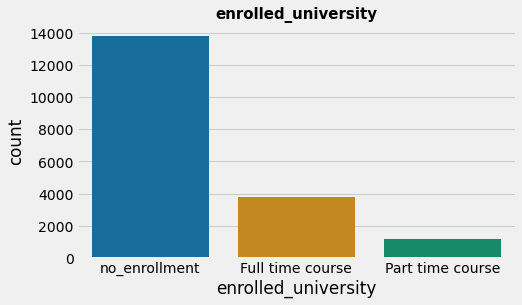

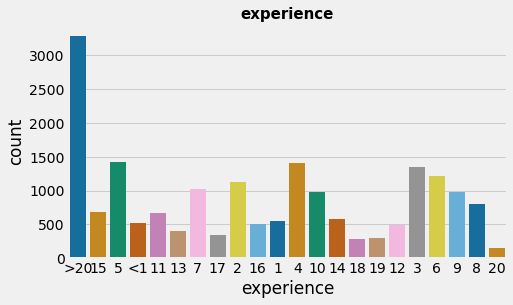

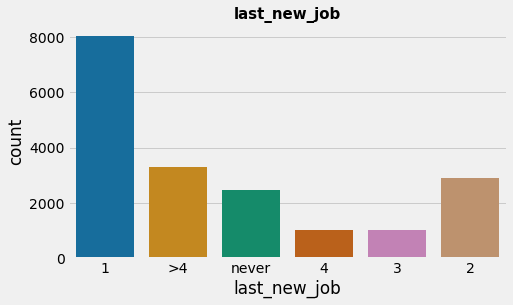

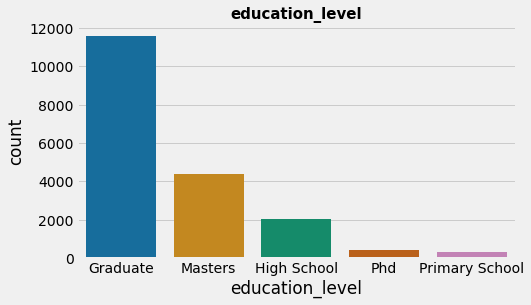

In [30]:
cols_with_nan_data = data[[ 'enrolled_university', 'experience', 'last_new_job',  'education_level']]   
colorblind_palette = sns.color_palette("colorblind")

for i in cols_with_nan_data:
    plt.figure(figsize=(7,4)) 
    plt.title(i, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    sns.countplot(data = data[i], x = cols_with_nan_data[i], palette=colorblind_palette)
    plt.show()

In [31]:

data['enrolled_university'] = data['enrolled_university'].replace(np.nan, 'no_enrollment')
data['education_level'] = data['education_level'].replace(np.nan,'Graduate')

data['experience'] = data['experience'].replace(np.nan,'>20')

data['last_new_job'] = data['last_new_job'].replace(np.nan,'1')

In [32]:
data.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36       1  
1              47       0  
2              83       0  
3              52       1  
4               8       0

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int32  
dtypes: float64(1), int32(1), int64(2), obj

In [34]:
data['gender']=data.gender.fillna('Not Known')

In [35]:
data['major_discipline']=data.major_discipline.fillna('Not Known')

In [36]:
data['company_size']=data.company_size.fillna('Not Known')

In [37]:
data['company_type']=data.company_type.fillna('Not Known')

In [38]:
data.isnull().sum().any()

False

In [39]:
data

enrollee_id      city  city_development_index     gender  \
0             8949  city_103                   0.920       Male   
1            29725   city_40                   0.776       Male   
2            11561   city_21                   0.624  Not Known   
3            33241  city_115                   0.789  Not Known   
4              666  city_162                   0.767       Male   
...            ...       ...                     ...        ...   
19153         7386  city_173                   0.878       Male   
19154        31398  city_103                   0.920       Male   
19155        24576  city_103                   0.920       Male   
19156         5756   city_65                   0.802       Male   
19157        23834   city_67                   0.855  Not Known   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
3       No relevent experience       no_enrollment        Graduate   
4      Has relevent experience       no_enrollment         Masters   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
0                 STEM        >20    Not Known       Not Known            1   
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5    Not Known       Not Known        never   
3      Business Degree         <1    Not Known         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
...                ...        ...          ...             ...          ...   
19153       Humanities         14    Not Known       Not Known            1   
19154             STEM         14    Not Known       Not Known            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156        Not Known         <1      500-999         Pvt Ltd            2   
19157        Not Known          2    Not Known       Not Known            1   

       training_hours  target  
0                  36       1  
1                  47       0  
2                  83       0  
3                  52       1  
4                   8       0  
...               ...     ...  
19153              42       1  
19154              52       1  
19155              44       0  
19156              97       0  
19157             127       0  

[19158 rows x 14 columns]

In [40]:
data_imp=data.copy()

In [41]:
data_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int32  
dtypes: float64(1), int32(1), int64(2), obj

## Data Visualization

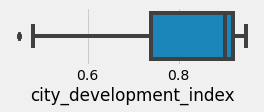

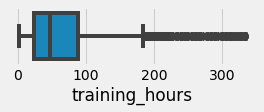

In [42]:
for i in data_numerical:
    plt.figure(figsize=(4,1))
    sns.boxplot(x= i,data=data)

In [43]:
data_numerical

['city_development_index', 'training_hours']

Text(0.5, 0, 'looking for job change')

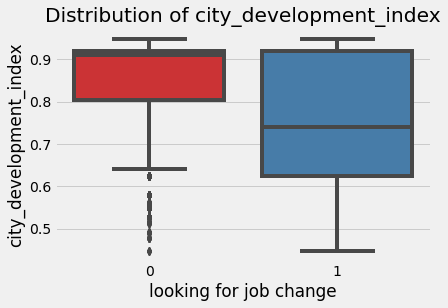

In [44]:
sns.boxplot(x="target",y="city_development_index",data=data,palette="Set1")
plt.title("Distribution of city_development_index")
plt.xlabel("looking for job change")

In [45]:
data[data['target']==0]['city_development_index'].median()

0.91

Text(0.5, 0, 'looking for job change')

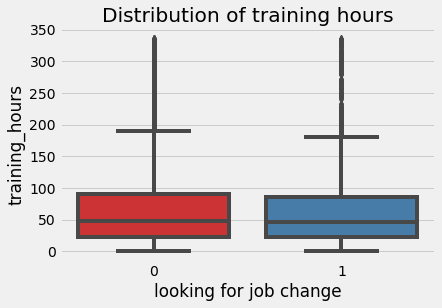

In [46]:
sns.boxplot(x="target",y="training_hours",data=data,palette="Set1")
plt.title("Distribution of training hours")
plt.xlabel("looking for job change")

Average training hours completed is almost same for people who are looking for job and not. It means training hours doesnt have impact here

Text(0.5, 0, 'looking for job change')

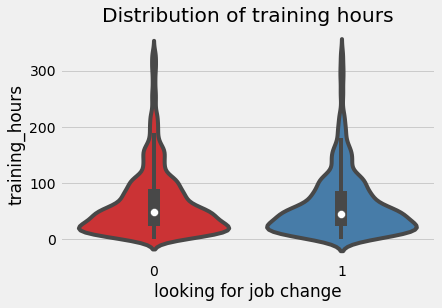

In [47]:
sns.violinplot(x="target",y="training_hours",data=data,palette="Set1")
plt.title("Distribution of training hours")
plt.xlabel("looking for job change")

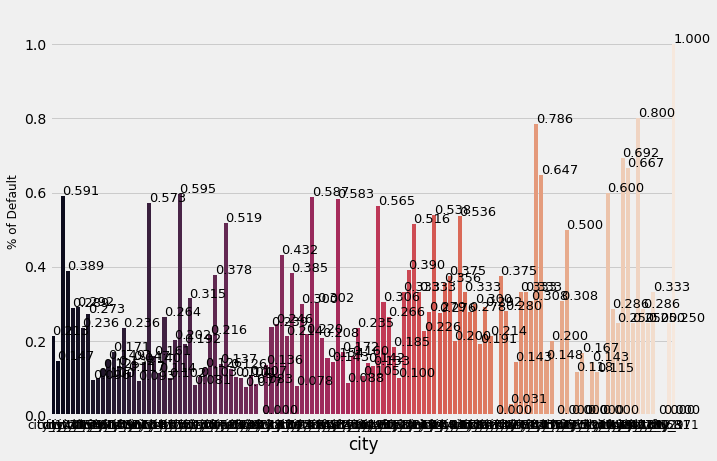

In [48]:
plt.figure(figsize=(10,7))

ax = sns.barplot(x = "city", y = "target", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,1.1)
plt.xticks( fontsize = 12)

for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.3, p.get_height()+0.003),fontsize=13)

plt.show()

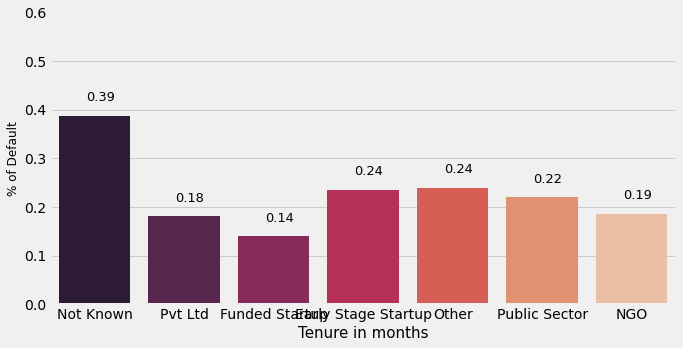

In [49]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x="company_type",y="target", data=data, palette = 'rocket', ci = None)
plt.xlabel('Tenure in months', fontsize= 15)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)
plt.show()

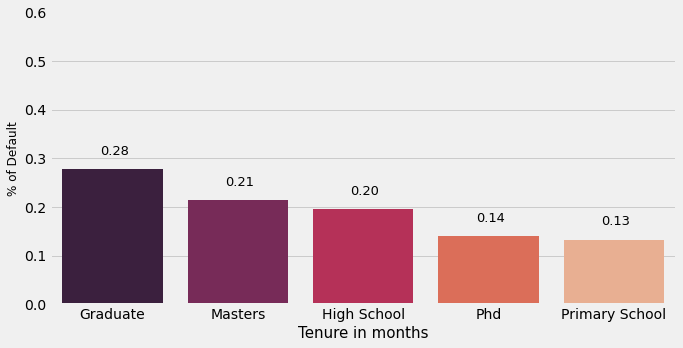

In [50]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x="education_level",y="target", data=data, palette = 'rocket', ci = None)
plt.xlabel('Tenure in months', fontsize= 15)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)
plt.show()

In [51]:
data.experience.value_counts()

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

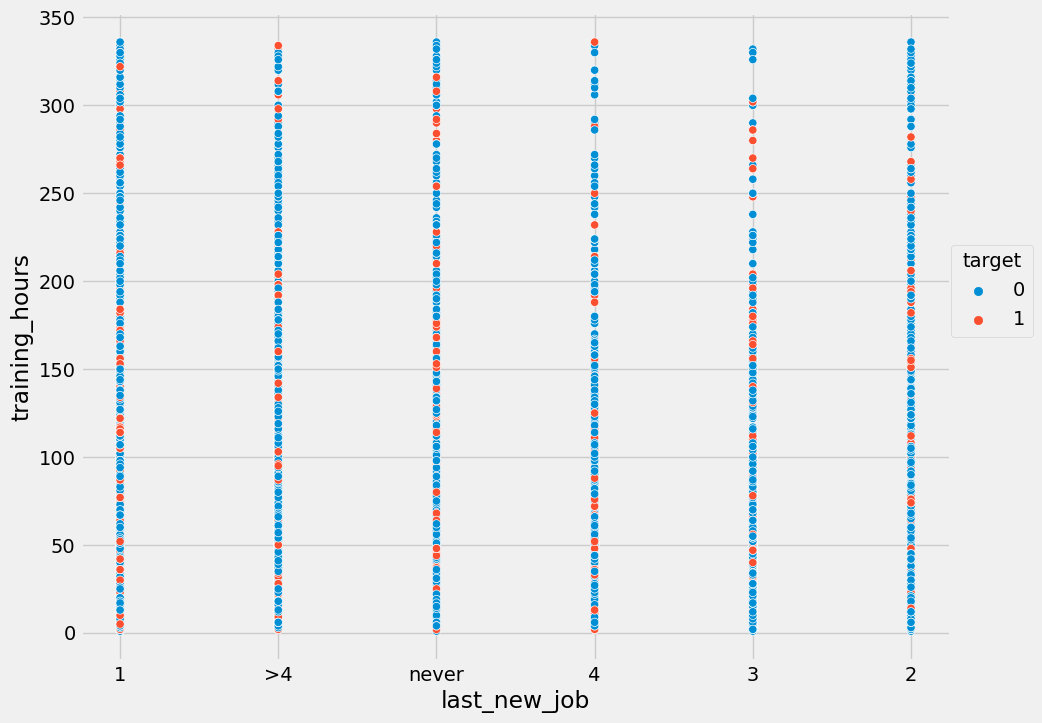

In [52]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(data=data,x='last_new_job',y='training_hours',hue='target')
plt.legend(loc=(1,0.5),title = "target")

In [53]:
data

enrollee_id      city  city_development_index     gender  \
0             8949  city_103                   0.920       Male   
1            29725   city_40                   0.776       Male   
2            11561   city_21                   0.624  Not Known   
3            33241  city_115                   0.789  Not Known   
4              666  city_162                   0.767       Male   
...            ...       ...                     ...        ...   
19153         7386  city_173                   0.878       Male   
19154        31398  city_103                   0.920       Male   
19155        24576  city_103                   0.920       Male   
19156         5756   city_65                   0.802       Male   
19157        23834   city_67                   0.855  Not Known   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
3       No relevent experience       no_enrollment        Graduate   
4      Has relevent experience       no_enrollment         Masters   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
0                 STEM        >20    Not Known       Not Known            1   
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5    Not Known       Not Known        never   
3      Business Degree         <1    Not Known         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
...                ...        ...          ...             ...          ...   
19153       Humanities         14    Not Known       Not Known            1   
19154             STEM         14    Not Known       Not Known            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156        Not Known         <1      500-999         Pvt Ltd            2   
19157        Not Known          2    Not Known       Not Known            1   

       training_hours  target  
0                  36       1  
1                  47       0  
2                  83       0  
3                  52       1  
4                   8       0  
...               ...     ...  
19153              42       1  
19154              52       1  
19155              44       0  
19156              97       0  
19157             127       0  

[19158 rows x 14 columns]

## Univariate Analysis

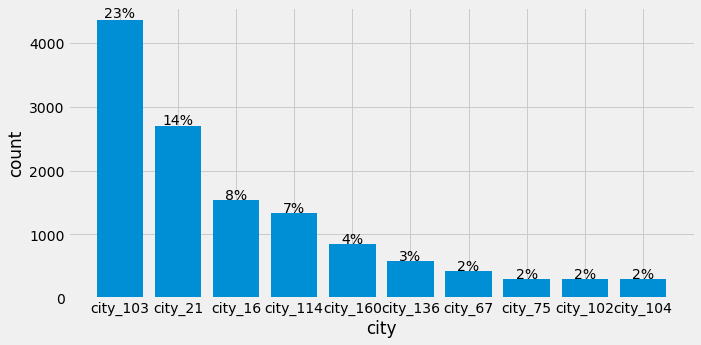

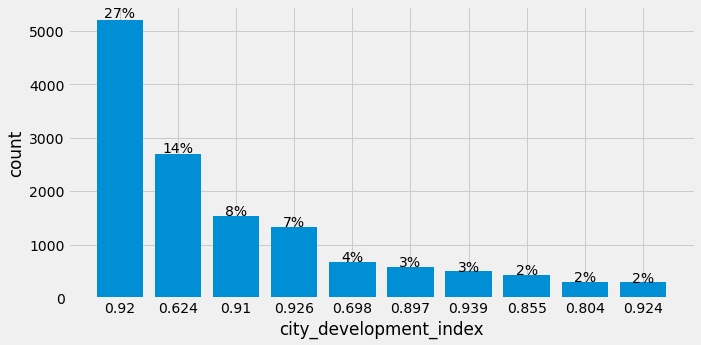

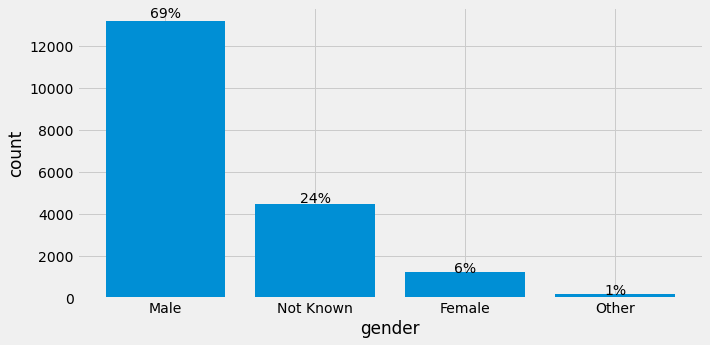

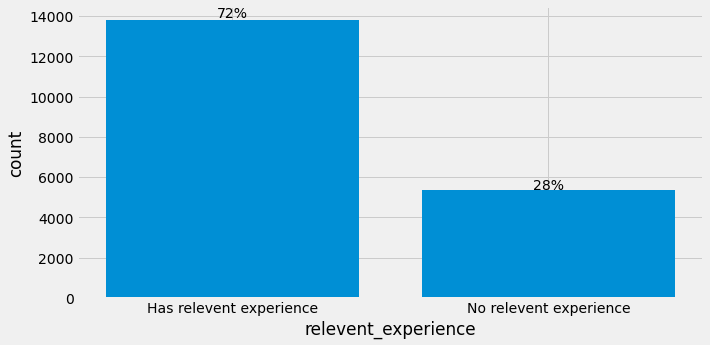

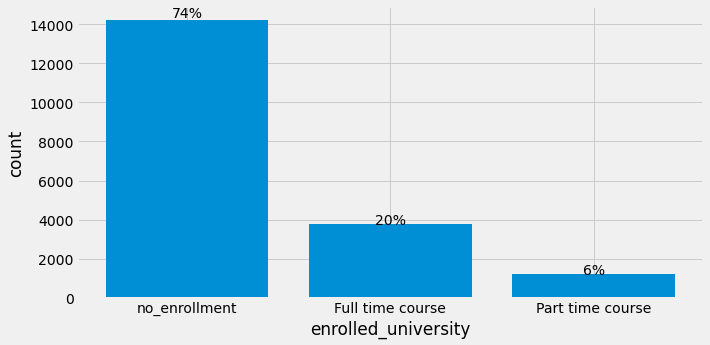

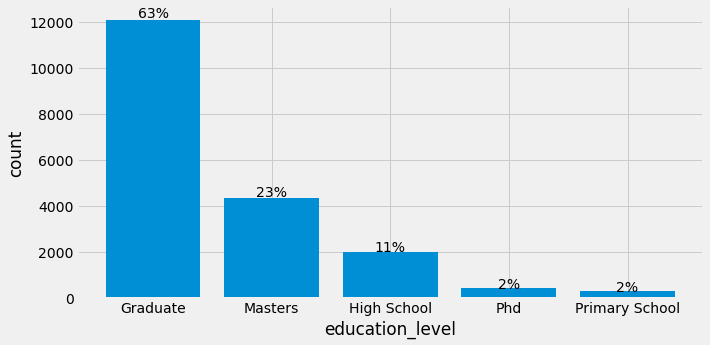

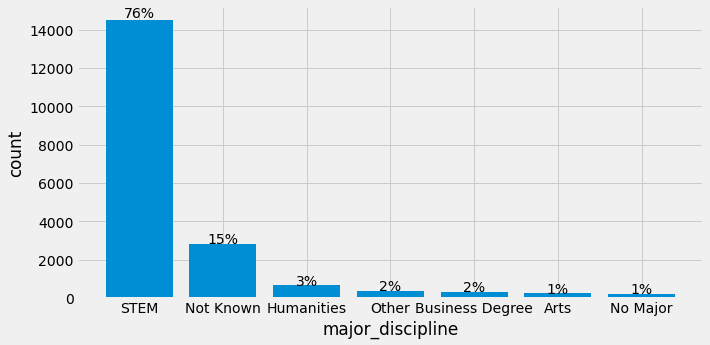

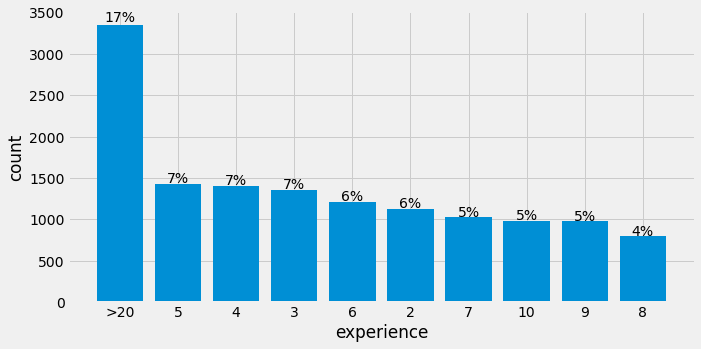

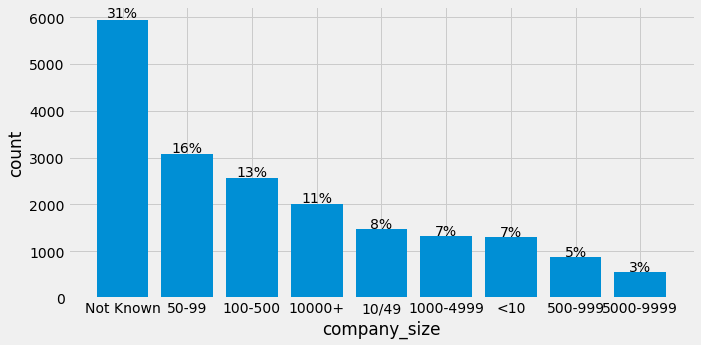

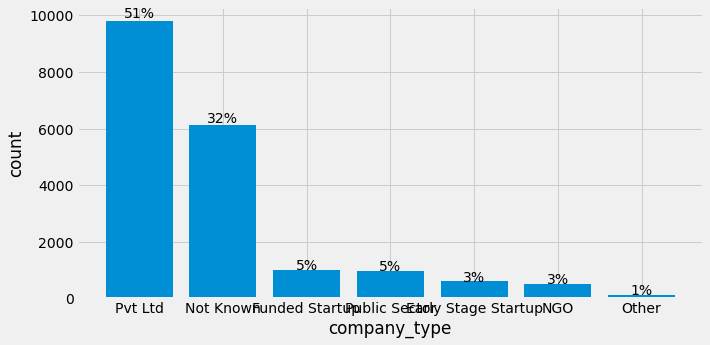

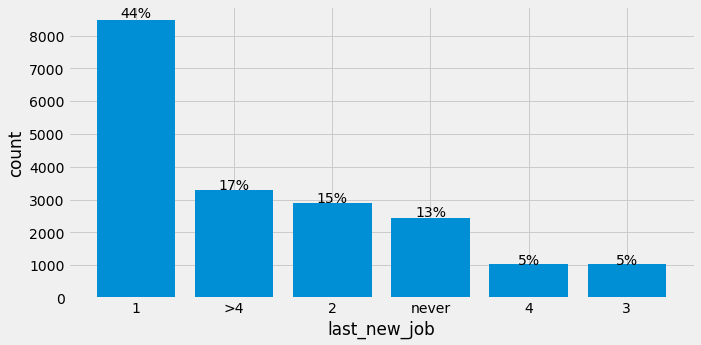

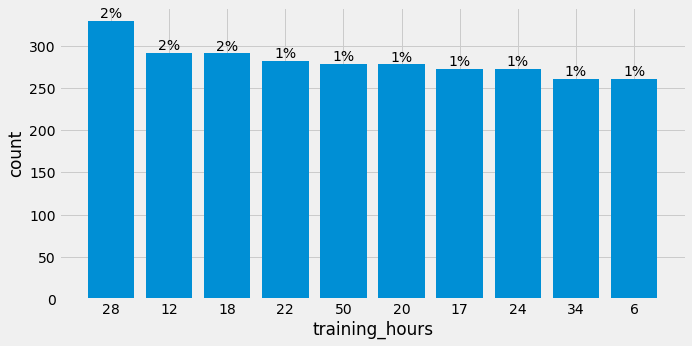

In [54]:
for item in columns_data:
    res = data.groupby(item).count().sort_values('enrollee_id', ascending=False).head(10)['enrollee_id']
    plt.figure(figsize=(10,5))
    graph = plt.bar([str(i) for i in res.keys()], res.values)
    plt.xlabel(item)
    plt.ylabel('count')
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
     
        plt.text(x+width/2,
                 y+height*1.01+1,
                 str(round(100*res.values[i]/data['target'].count()))+'%',
                 ha='center')
        i += 1

- Out of the 123 cities, we can see that the top 4 cities represent over half of the candidates, with city_103 accounting for almost a quarter.
- In this sample, males make up a majority of participants.
- Most of the candidates in the dataset have some level of experience.
- Most of the candidates have not enrolled in any university.
- Most of the candidates are graduates, however we have some other interesting educational levels such as PHD or primary school.
- STEM is the most common discipline and from rest of the groups candidates from humanities are interested more.
- Over 50% of candidates have between 2 and 10 years of work experience.
#Most of the candidates are in small-medium size companies (10-500) and the peak is in company with size 50-99.
- Data scientist are highly required almost exclusively for private companies.
- Most of candidates are in their current position for less than 4 years.

## Multivariate Analysis

In [55]:
data1=data.copy()

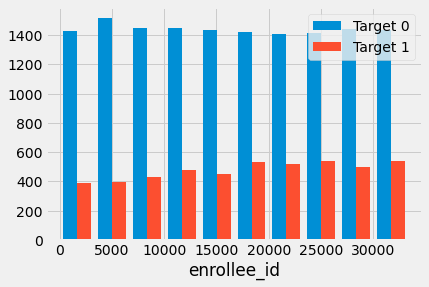

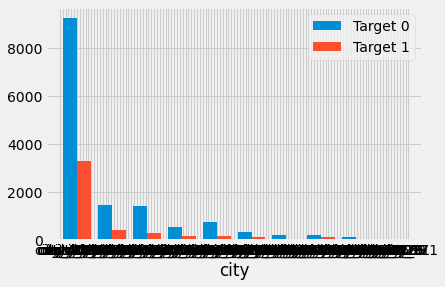

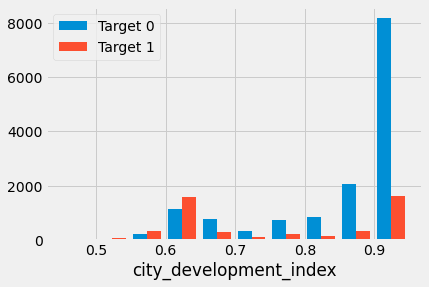

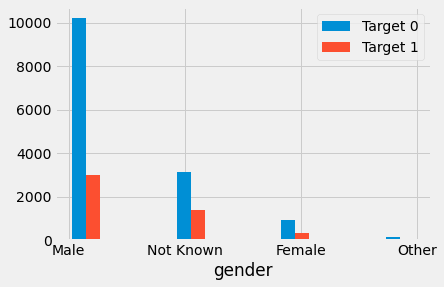

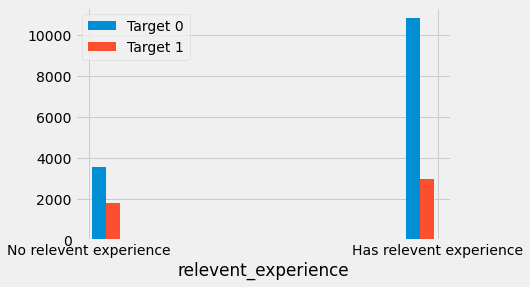

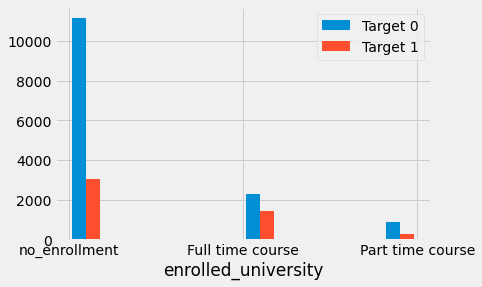

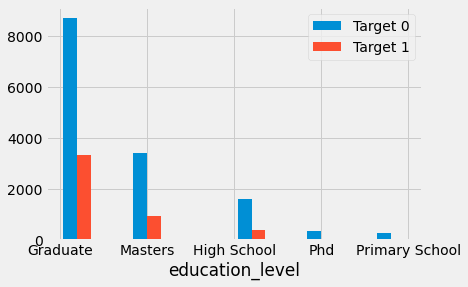

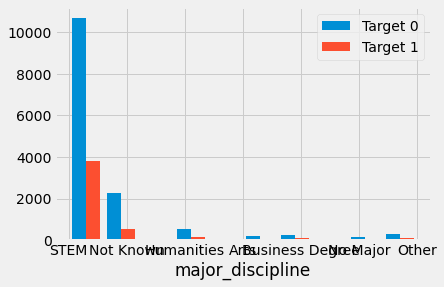

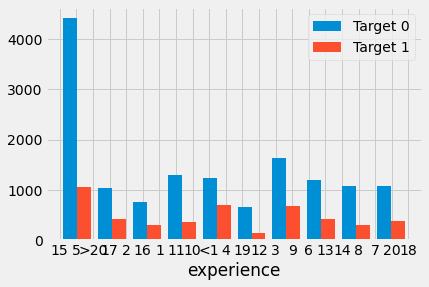

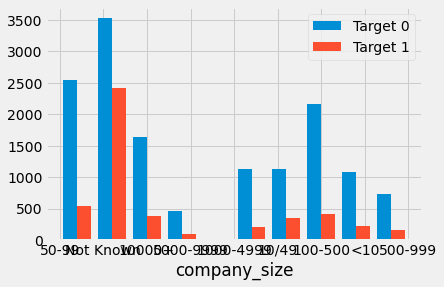

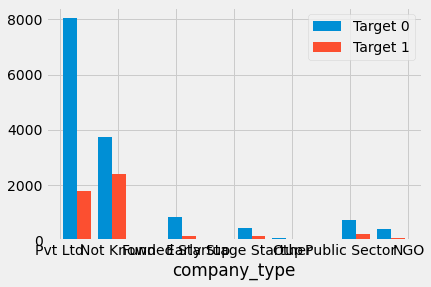

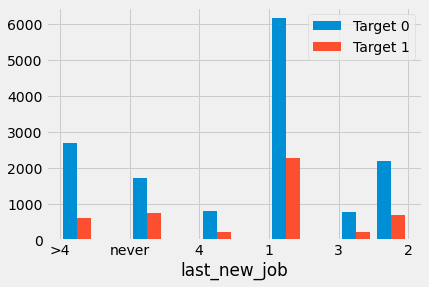

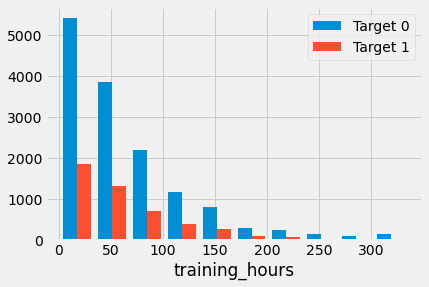

In [56]:
hists = {}
for item in data1.columns:  
    if item == 'target': continue
    hists[item] = plt.hist([data1[data1['target']==0][item],\
              data1[data1['target']==1][item]], label=['Target 0', 'Target 1'])
    plt.xlabel(item)
    plt.legend()
    plt.show()

- In the top 10 cities with the most candidates, the proportion of candidates searching for a new job is lower
- among the employees who want to change the job are having relevant experience
- From the education details system can observe that, a huge number of graduates and a very few PhD holders want to change their job role

In [57]:
x=data_categorical.remove('city')

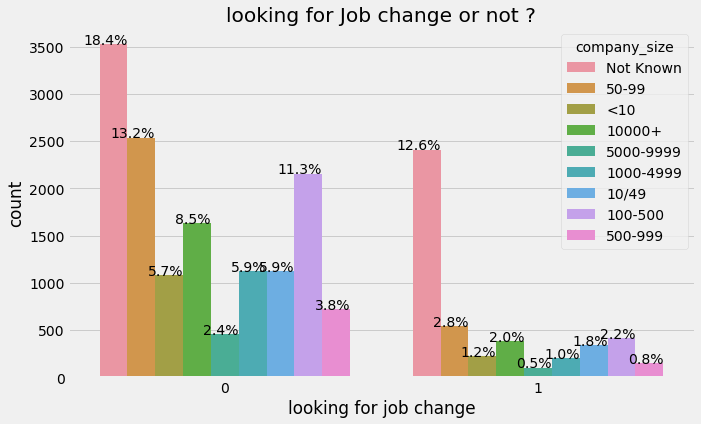

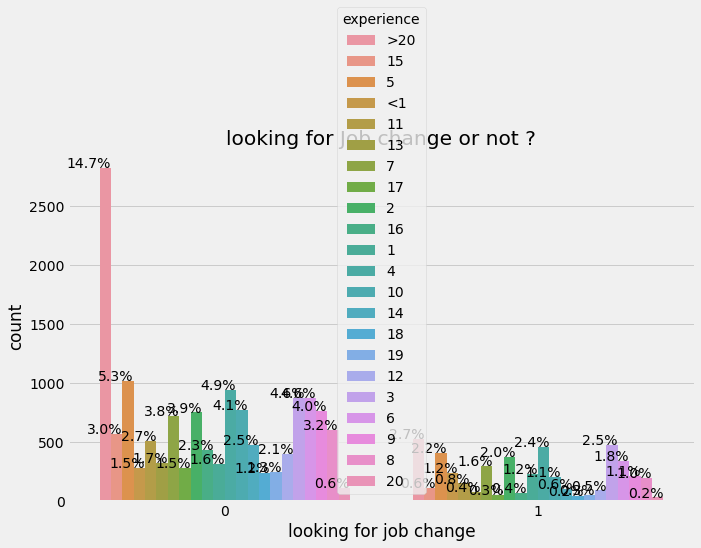

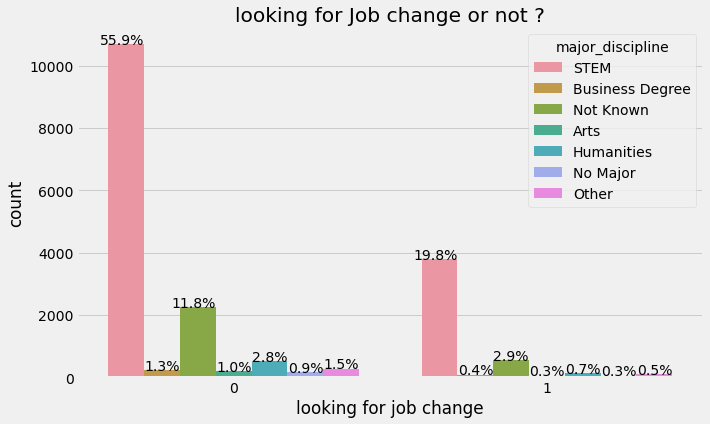

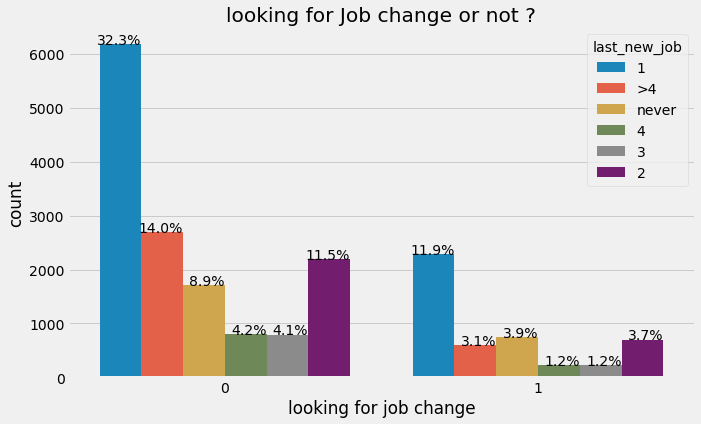

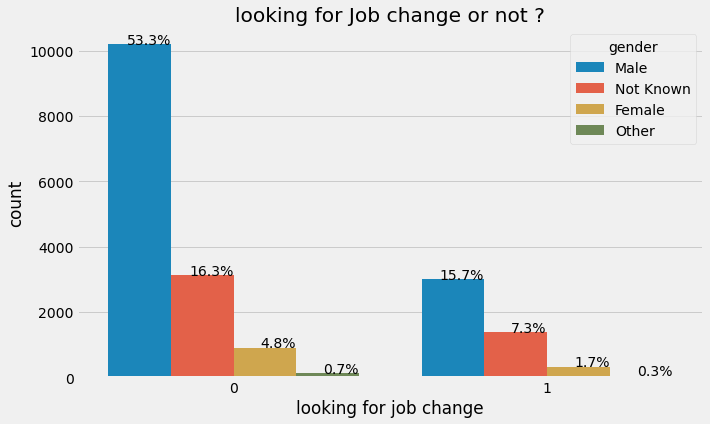

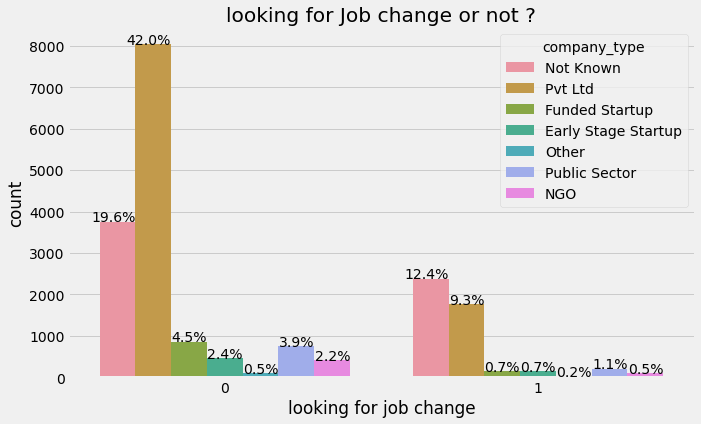

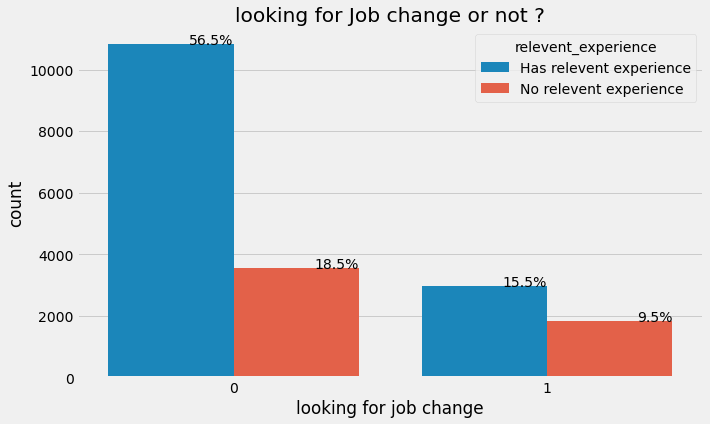

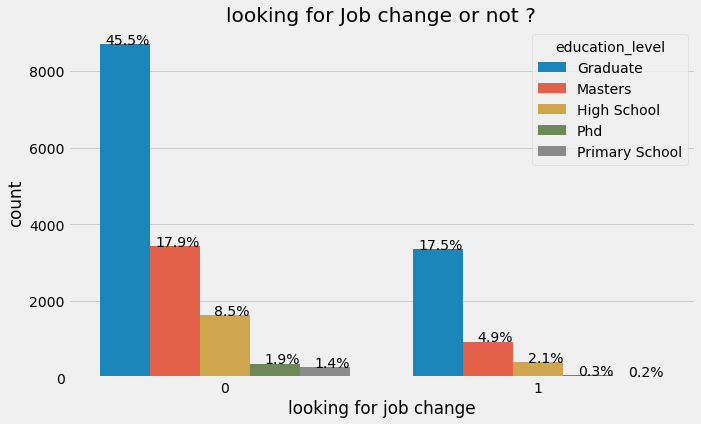

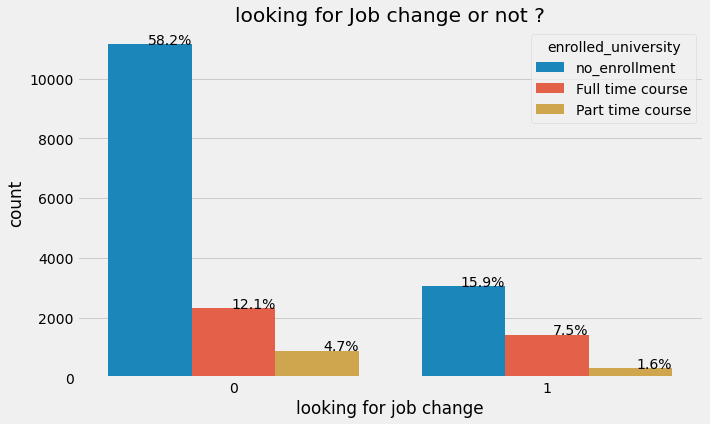

In [58]:
for i in data_categorical:
    plt.figure(figsize=(10,6))
    ax = sns.countplot(x="target",data=data1, hue=i)
    total =float(len(data1))
    plt.title("looking for Job change or not ?")
    plt.xlabel("looking for job change")

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='right')
    plt.show()

##Observation:
- Around 25% people are looking for a job change out of which, 23.0% people are male
- Around 75% people are currently not looking for job change

In [59]:
# plt.figure(figsize=(10,10))
# sns.heatmap(data1.corr(),annot=True)

In [60]:
cut_labels_4 = [0.35,0.4,0.45,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
cut_bins =[0.4,0.45,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
data1['index'] = pd.cut(data1['city_development_index'], bins=cut_labels_4, labels=cut_bins)

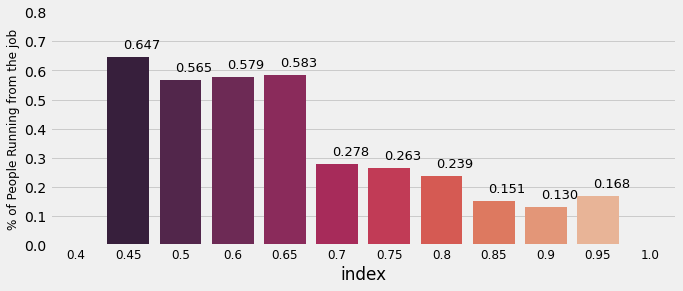

In [61]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "index", y = "target", data = data1, palette = 'rocket', ci = None)

plt.ylabel("% of People Running from the job", fontsize= 12)
plt.ylim(0,0.8)
plt.xticks( fontsize = 12)
for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.3, p.get_height()+0.03),fontsize=13)

plt.show()

####  Findings: The candidates are more likely to leave the job whose city development index of the current job location is in the range of 0.45 to 0.65.

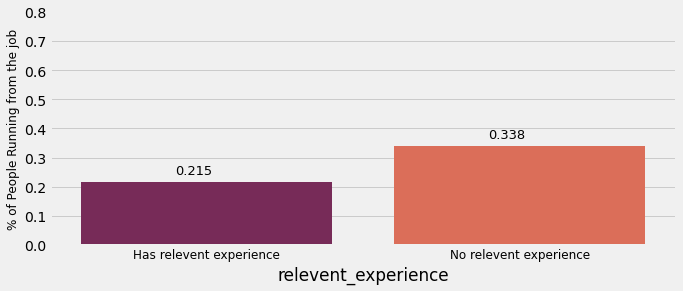

In [62]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "relevent_experience", y = "target", data = data1, palette = 'rocket', ci = None)

plt.ylabel("% of People Running from the job", fontsize= 12)
plt.ylim(0,0.8)
plt.xticks( fontsize = 12)
for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.3, p.get_height()+0.03),fontsize=13)

plt.show()

## Dealing with Outliers

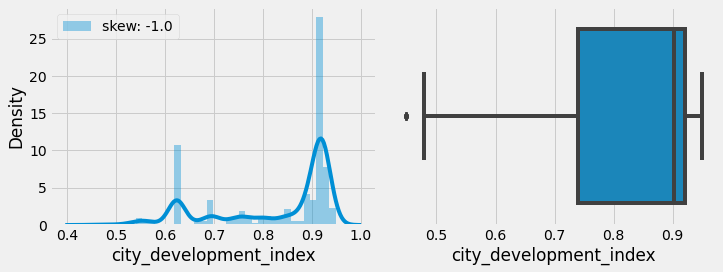

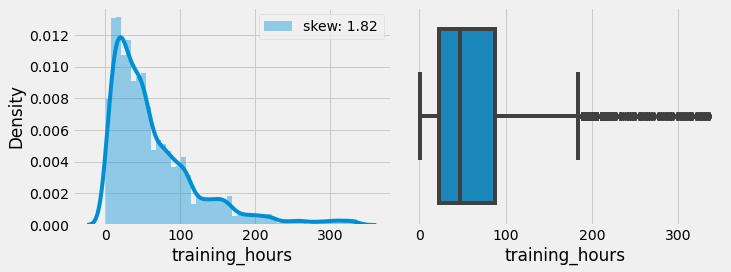

In [63]:
#sns.set_style('dark')
for col in data_numerical:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(data[col])
    plt.tight_layout()
    plt.show()

In [64]:
# data_cap = data.copy()

In [65]:
def iqr_capping(data, cols, factor):
    
    for col in cols:
        
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        data[col] = np.where(data[col]>upper_whisker, upper_whisker,
                 np.where(data[col]<lower_whisker, lower_whisker, data[col]))

In [66]:
iqr_capping(data, data_numerical, 1.5)

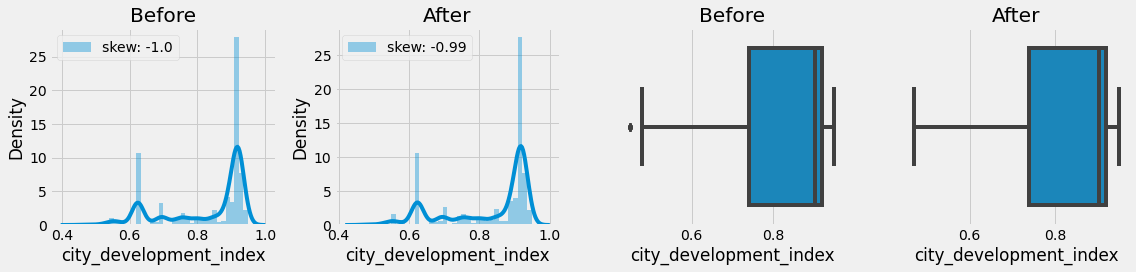

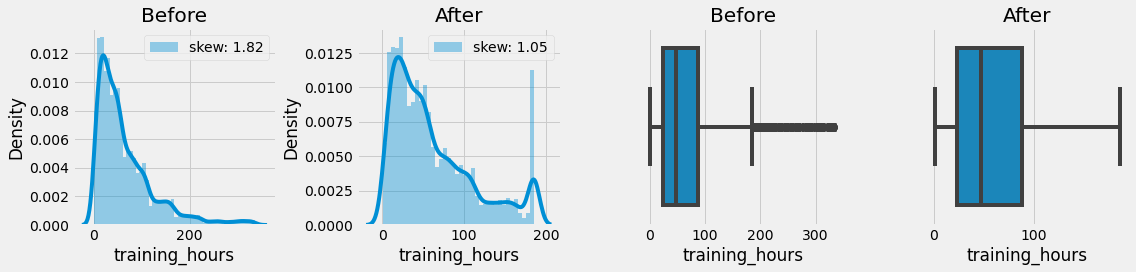

In [67]:
for col in data_numerical:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(data1[col], label="skew: " + str(np.round(data1[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(data1[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(data[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

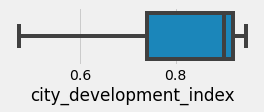

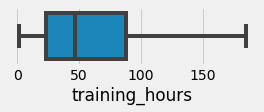

In [68]:
for i in data_numerical:
    plt.figure(figsize=(4,1))
    sns.boxplot(x= i,data=data)

### Encoding for categorical features

Depending on the problem and variable description, you can use label encoding, target encoding as well

In [69]:
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

city
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'city

In [70]:
data['last_new_job'].value_counts()

1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [71]:
data['last_new_job']=data['last_new_job'].replace('never',0)

In [72]:
data['last_new_job']=data['last_new_job'].replace('>4',5)

In [73]:
data["last_new_job"] = pd.to_numeric(data["last_new_job"],errors="coerce")

In [74]:
data['education_level'].value_counts()

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [75]:
data['education_level']=data['education_level'].replace('Primary School',0)
data['education_level']=data['education_level'].replace('High School',1)
data['education_level']=data['education_level'].replace('Graduate',2)
data['education_level']=data['education_level'].replace('Masters',3)
data['education_level']=data['education_level'].replace('Phd',4)

In [76]:
data['experience']=data['experience'].replace('<1',0)
data['experience']=data['experience'].replace('>20',21)

In [77]:
data["experience"] = pd.to_numeric(data["experience"],errors="coerce")

In [78]:
data.experience.value_counts()

21    3351
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
1      549
0      522
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: experience, dtype: int64

In [79]:
stats = data['target'].groupby(data['city']).agg(['count', 'mean'])

In [80]:
# !pip install category_encoders

In [81]:
data[['city','target']]

city  target
0      city_103       1
1       city_40       0
2       city_21       0
3      city_115       1
4      city_162       0
...         ...     ...
19153  city_173       1
19154  city_103       1
19155  city_103       0
19156   city_65       0
19157   city_67       0

[19158 rows x 2 columns]

In [82]:
data['target']

0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int32

In [83]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

In [84]:
data_city=encoder.fit_transform(data['city'],data['target'])
data_city

city
0      0.213088
1      0.147059
2      0.591044
3      0.388889
4      0.289062
...         ...
19153  0.125828
19154  0.213088
19155  0.213088
19156  0.137143
19157  0.132251

[19158 rows x 1 columns]

In [85]:
data['city']=data_city

In [86]:
data_dummy=data

In [87]:
data_numerical = list(set(list(data_dummy.select_dtypes(include=[np.number]).columns.values)) - set(ignore_feat))

In [88]:
dev.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36       1  
1              47       0  
2              83       0  
3              52       1  
4               8       0

In [89]:
data_dummy.head()

enrollee_id      city  city_development_index     gender  \
0         8949  0.213088                   0.920       Male   
1        29725  0.147059                   0.776       Male   
2        11561  0.591044                   0.624  Not Known   
3        33241  0.388889                   0.789  Not Known   
4          666  0.289062                   0.767       Male   

       relevent_experience enrolled_university  education_level  \
0  Has relevent experience       no_enrollment                2   
1   No relevent experience       no_enrollment                2   
2   No relevent experience    Full time course                2   
3   No relevent experience       no_enrollment                2   
4  Has relevent experience       no_enrollment                3   

  major_discipline  experience company_size    company_type  last_new_job  \
0             STEM          21    Not Known       Not Known             1   
1             STEM          15        50-99         Pvt Ltd             5   
2             STEM           5    Not Known       Not Known             0   
3  Business Degree           0    Not Known         Pvt Ltd             0   
4             STEM          21        50-99  Funded Startup             4   

   training_hours  target  
0            36.0       1  
1            47.0       0  
2            83.0       0  
3            52.0       1  
4             8.0       0

In [90]:
data_dummy=pd.get_dummies(data_dummy,drop_first=True)

In [91]:
data_dummy.head()

enrollee_id      city  city_development_index  education_level  experience  \
0         8949  0.213088                   0.920                2          21   
1        29725  0.147059                   0.776                2          15   
2        11561  0.591044                   0.624                2           5   
3        33241  0.388889                   0.789                2           0   
4          666  0.289062                   0.767                3          21   

   last_new_job  training_hours  target  gender_Male  gender_Not Known  \
0             1            36.0       1            1                 0   
1             5            47.0       0            1                 0   
2             0            83.0       0            0                 1   
3             0            52.0       1            0                 1   
4             4             8.0       0            1                 0   

   gender_Other  relevent_experience_No relevent experience  \
0             0                                           0   
1             0                                           1   
2             0                                           1   
3             0                                           1   
4             0                                           0   

   enrolled_university_Part time course  enrolled_university_no_enrollment  \
0                                     0                                  1   
1                                     0                                  1   
2                                     0                                  0   
3                                     0                                  1   
4                                     0                                  1   

   major_discipline_Business Degree  major_discipline_Humanities  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 1                            0   
4                                 0                            0   

   major_discipline_No Major  major_discipline_Not Known  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   major_discipline_Other  major_discipline_STEM  company_size_100-500  \
0                       0                      1                     0   
1                       0                      1                     0   
2                       0                      1                     0   
3                       0                      0                     0   
4                       0                      1                     0   

   company_size_1000-4999  company_size_10000+  company_size_50-99  \
0                       0                    0                   0   
1                       0                    0                   1   
2                       0                    0                   0   
3                       0                    0                   0   
4                       0                    0                   1   

   company_size_500-999  company_size_5000-9999  company_size_<10  \
0                     0                       0                 0   
1                     0                       0                 0   
2                     0                       0                 0   
3                     0                       0                 0   
4                     0                       0                 0   

   company_size_Not Known  company_type_Funded Startup  company_type_NGO  \
0                       1                            0                 0   
1                   

In [92]:
data_dummy.shape

(19158, 34)

#### Normalizing data for numeric features

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler=StandardScaler()
scale = scaler.fit(data_dummy[data_numerical])
data_dummy[data_numerical] = scale.transform(data_dummy[data_numerical])
data_numerical

['experience',
 'city',
 'training_hours',
 'last_new_job',
 'education_level',
 'city_development_index']

In [95]:
data_dummy.head()

enrollee_id      city  city_development_index  education_level  experience  \
0         8949 -0.211889                0.739112        -0.195471    1.598665   
1        29725 -0.597956               -0.428772        -0.195471    0.715659   
2        11561  1.997974               -1.661537        -0.195471   -0.756019   
3        33241  0.815998               -0.323338        -0.195471   -1.491858   
4          666  0.232324               -0.501764         1.269643    1.598665   

   last_new_job  training_hours  target  gender_Male  gender_Not Known  \
0     -0.588135       -0.521332       1            1                 0   
1      1.816493       -0.302258       0            1                 0   
2     -1.189292        0.414711       0            0                 1   
3     -1.189292       -0.202679       1            0                 1   
4      1.215336       -1.078974       0            1                 0   

   gender_Other  relevent_experience_No relevent experience  \
0             0                                           0   
1             0                                           1   
2             0                                           1   
3             0                                           1   
4             0                                           0   

   enrolled_university_Part time course  enrolled_university_no_enrollment  \
0                                     0                                  1   
1                                     0                                  1   
2                                     0                                  0   
3                                     0                                  1   
4                                     0                                  1   

   major_discipline_Business Degree  major_discipline_Humanities  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 1                            0   
4                                 0                            0   

   major_discipline_No Major  major_discipline_Not Known  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   major_discipline_Other  major_discipline_STEM  company_size_100-500  \
0                       0                      1                     0   
1                       0                      1                     0   
2                       0                      1                     0   
3                       0                      0                     0   
4                       0                      1                     0   

   company_size_1000-4999  company_size_10000+  company_size_50-99  \
0                       0                    0                   0   
1                       0                    0                   1   
2                       0                    0                   0   
3                       0                    0                   0   
4                       0                    0                   1   

   company_size_500-999  company_size_5000-9999  company_size_<10  \
0                     0                       0                 0   
1                     0                       0                 0   
2                     0                       0                 0   
3                     0                       0                 0   
4                     0                       0                 0   

   company_size_Not Known  company_type_Funded Startup  company_type_NGO  \
0                       1                            0                 0   
1                   

## Storing Mean, Std, Median of Numerical variables for future use

In [98]:
data_stat = pd.DataFrame(list(zip(data_numerical, list(data[data_numerical].mean()),list(data[data_numerical].std()), list(data[data_numerical].median()))), 
                        columns=['Variable', 'Mean', 'Std', 'Median'])
data_stat.to_csv("Downloads/Development_Statistics.csv", index = False)

## Feature Engineering

### Weight of Evidence and Information Value

In [99]:
print(sc.__file__)

C:\Users\`PRATIBHA\AppData\Roaming\Python\Python39\site-packages\scorecardpy\__init__.py


In [100]:
data_imp.head()

enrollee_id      city  city_development_index     gender  \
0         8949  city_103                   0.920       Male   
1        29725   city_40                   0.776       Male   
2        11561   city_21                   0.624  Not Known   
3        33241  city_115                   0.789  Not Known   
4          666  city_162                   0.767       Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20    Not Known       Not Known            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5    Not Known       Not Known        never   
3  Business Degree         <1    Not Known         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36       1  
1              47       0  
2              83       0  
3              52       1  
4               8       0

In [101]:
# filter variable via missing rate, iv, identical value rate
data_filter = sc.var_filter(data_imp, y="target")

[INFO] filtering variables ...
Variable filtering on 19158 rows and 14 columns in 00:00:10 
2 variables are removed


In [102]:
print("Removed Features: {}".format(list(set(data_imp.columns) - set(data_filter.columns))))

Removed Features: ['major_discipline', 'enrollee_id']


In [103]:
data_filter.head()

company_size experience      city  training_hours last_new_job     gender  \
0    Not Known        >20  city_103              36            1       Male   
1        50-99         15   city_40              47           >4       Male   
2    Not Known          5   city_21              83        never  Not Known   
3    Not Known         <1  city_115              52        never  Not Known   
4        50-99        >20  city_162               8            4       Male   

     company_type      relevent_experience education_level  \
0       Not Known  Has relevent experience        Graduate   
1         Pvt Ltd   No relevent experience        Graduate   
2       Not Known   No relevent experience        Graduate   
3         Pvt Ltd   No relevent experience        Graduate   
4  Funded Startup  Has relevent experience         Masters   

   city_development_index enrolled_university  target  
0                   0.920       no_enrollment       1  
1                   0.776       no_enrollment       0  
2                   0.624    Full time course       0  
3                   0.789       no_enrollment       1  
4                   0.767       no_enrollment       0

In [105]:
bins = sc.woebin(data_filter, y="target")

[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
city
>>> Continue the binning process?
1: yes 
2: no
Selection: 1


In [106]:
# pd.show_versions()

In [107]:
# pip install pandas==1.3.4 --user

{'company_size': <Figure size 432x288 with 2 Axes>,
 'experience': <Figure size 432x288 with 2 Axes>,
 'city': <Figure size 432x288 with 2 Axes>,
 'training_hours': <Figure size 432x288 with 2 Axes>,
 'last_new_job': <Figure size 432x288 with 2 Axes>,
 'gender': <Figure size 432x288 with 2 Axes>,
 'company_type': <Figure size 432x288 with 2 Axes>,
 'relevent_experience': <Figure size 432x288 with 2 Axes>,
 'education_level': <Figure size 432x288 with 2 Axes>,
 'city_development_index': <Figure size 432x288 with 2 Axes>,
 'enrolled_university': <Figure size 432x288 with 2 Axes>}

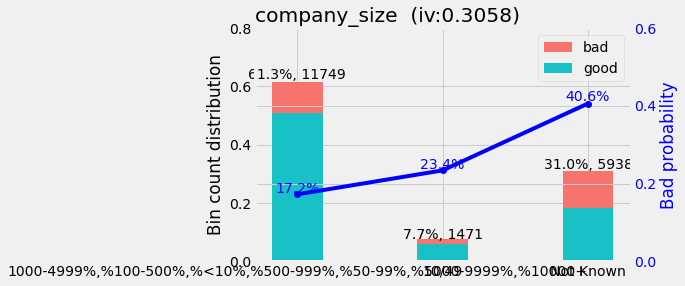

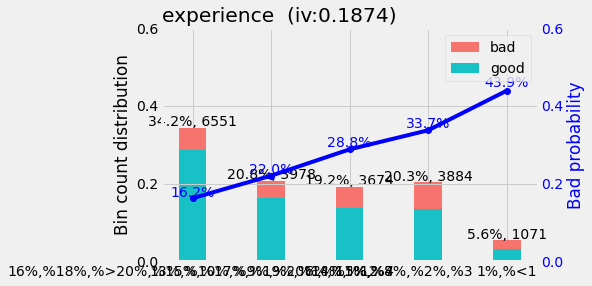

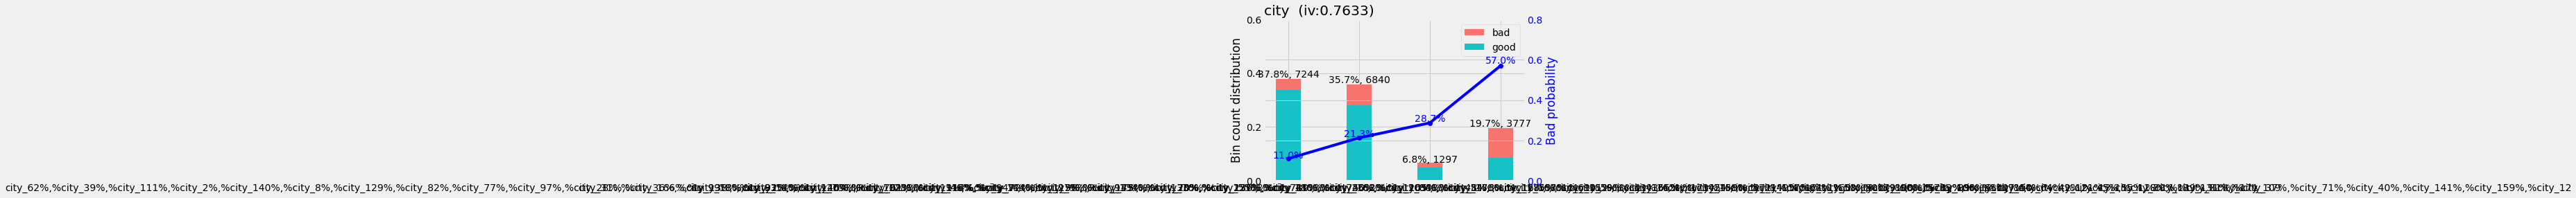

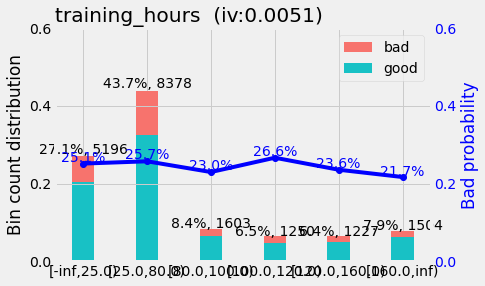

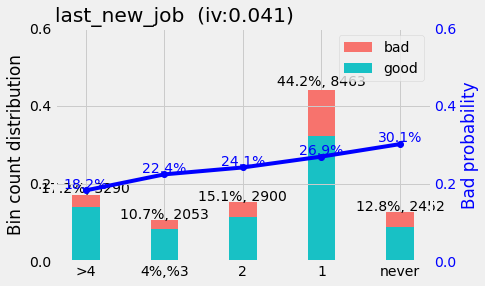

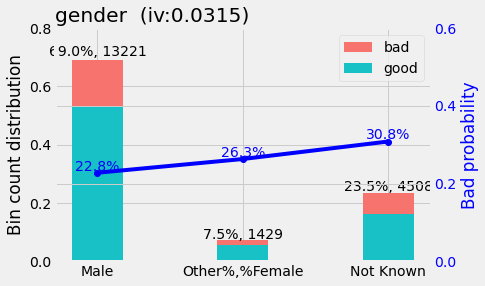

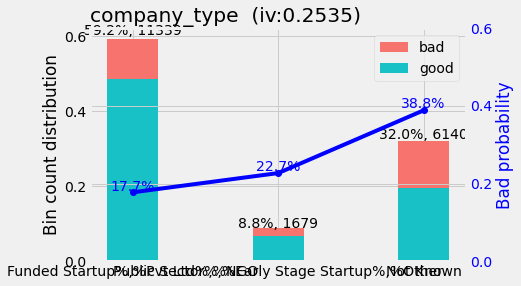

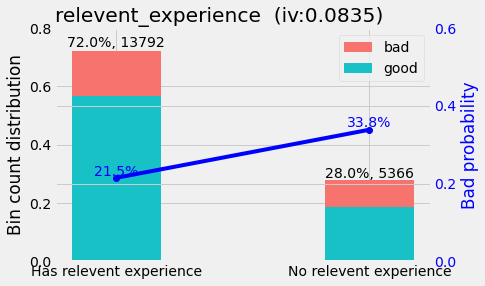

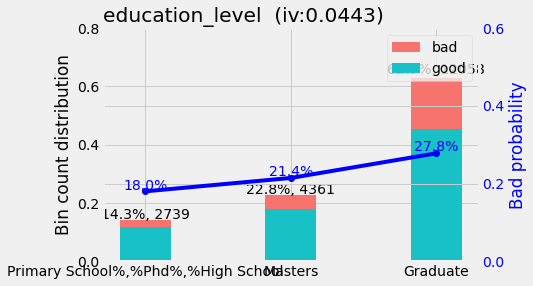

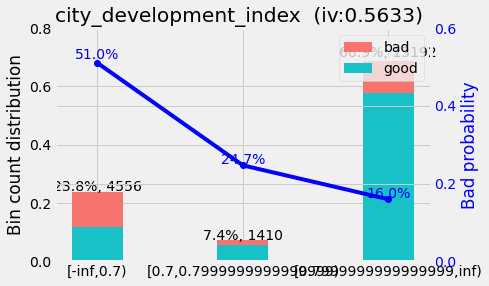

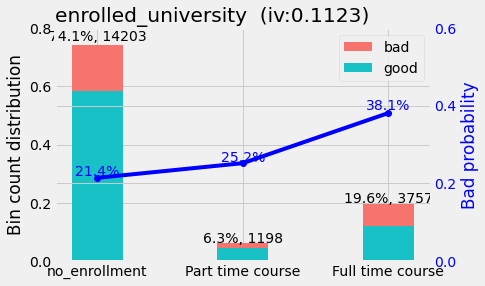

In [108]:
sc.woebin_plot(bins)

In [109]:
bins

{'company_size':        variable                                                bin  count  \
 0  company_size  1000-4999%,%100-500%,%<10%,%500-999%,%50-99%,%...  11749   
 1  company_size                                              10/49   1471   
 2  company_size                                          Not Known   5938   
 
    count_distr  good   bad   badprob       woe    bin_iv  total_iv  \
 0     0.613269  9726  2023  0.172185 -0.468126  0.118352  0.305754   
 1     0.076783  1127   344  0.233855 -0.084578  0.000538  0.305754   
 2     0.309949  3528  2410  0.405861  0.720991  0.186864  0.305754   
 
                                               breaks  is_special_values  
 0  1000-4999%,%100-500%,%<10%,%500-999%,%50-99%,%...              False  
 1                                              10/49              False  
 2                                          Not Known              False  ,
 'experience':      variable                                     bin  count  count_

In [110]:
bins["training_hours"]

variable            bin  count  count_distr  good   bad   badprob  \
0  training_hours    [-inf,25.0)   5196     0.271218  3890  1306  0.251347   
1  training_hours    [25.0,80.0)   8378     0.437311  6223  2155  0.257221   
2  training_hours   [80.0,100.0)   1603     0.083673  1235   368  0.229570   
3  training_hours  [100.0,120.0)   1250     0.065247   917   333  0.266400   
4  training_hours  [120.0,160.0)   1227     0.064046   938   289  0.235534   
5  training_hours    [160.0,inf)   1504     0.078505  1178   326  0.216755   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.010655  0.000031  0.005139   25.0              False  
1  0.041634  0.000766  0.005139   80.0              False  
2 -0.108648  0.000961  0.005139  100.0              False  
3  0.089130  0.000530  0.005139  120.0              False  
4 -0.075228  0.000356  0.005139  160.0              False  
5 -0.182581  0.002496  0.005139    inf              False

In [111]:
bins["city"]

variable                                                bin  count  \
0     city  city_62%,%city_39%,%city_111%,%city_2%,%city_1...   7244   
1     city  city_99%,%city_83%,%city_120%,%city_102%,%city...   6840   
2     city  city_31%,%city_166%,%city_18%,%city_14%,%city_...   1297   
3     city  city_91%,%city_146%,%city_79%,%city_19%,%city_...   3777   

   count_distr  good   bad   badprob       woe    bin_iv  total_iv  \
0     0.378119  6448   796  0.109884 -0.989831  0.278873  0.763276   
1     0.357031  5384  1456  0.212865 -0.205643  0.014311  0.763276   
2     0.067700   925   372  0.286816  0.191195  0.002591  0.763276   
3     0.197150  1624  2153  0.570029  1.384065  0.467502  0.763276   

                                              breaks  is_special_values  
0  city_62%,%city_39%,%city_111%,%city_2%,%city_1...              False  
1  city_99%,%city_83%,%city_120%,%city_102%,%city...              False  
2  city_31%,%city_166%,%city_18%,%city_14%,%city_...              False  
3  city_91%,%city_146%,%city_79%,%city_19%,%city_...              False

In [112]:
bins["company_type"]

variable                                          bin  count  \
0  company_type               Funded Startup%,%Pvt Ltd%,%NGO  11339   
1  company_type  Public Sector%,%Early Stage Startup%,%Other   1679   
2  company_type                                    Not Known   6140   

   count_distr  good   bad   badprob       woe    bin_iv  total_iv  \
0     0.591868  9327  2012  0.177441 -0.431689  0.098157  0.253488   
1     0.087640  1298   381  0.226921 -0.123685  0.001299  0.253488   
2     0.320493  3756  2384  0.388274  0.647520  0.154032  0.253488   

                                        breaks  is_special_values  
0               Funded Startup%,%Pvt Ltd%,%NGO              False  
1  Public Sector%,%Early Stage Startup%,%Other              False  
2                                    Not Known              False

In [113]:
bins["relevent_experience"]

variable                      bin  count  count_distr   good  \
0  relevent_experience  Has relevent experience  13792     0.719908  10831   
1  relevent_experience   No relevent experience   5366     0.280092   3550   

    bad   badprob       woe    bin_iv  total_iv                   breaks  \
0  2961  0.214690 -0.194790  0.025966  0.083523  Has relevent experience   
1  1816  0.338427  0.431784  0.057557  0.083523   No relevent experience   

   is_special_values  
0              False  
1              False

In [114]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [115]:
bins["company_size"]

variable                                                bin  count  \
0  company_size  1000-4999%,%100-500%,%<10%,%500-999%,%50-99%,%...  11749   
1  company_size                                              10/49   1471   
2  company_size                                          Not Known   5938   

   count_distr  good   bad   badprob       woe    bin_iv  total_iv  \
0     0.613269  9726  2023  0.172185 -0.468126  0.118352  0.305754   
1     0.076783  1127   344  0.233855 -0.084578  0.000538  0.305754   
2     0.309949  3528  2410  0.405861  0.720991  0.186864  0.305754   

                                              breaks  is_special_values  
0  1000-4999%,%100-500%,%<10%,%500-999%,%50-99%,%...              False  
1                                              10/49              False  
2                                          Not Known              False

In [116]:
bins["education_level"]

variable                                 bin  count  count_distr  \
0  education_level  Primary School%,%Phd%,%High School   2739     0.142969   
1  education_level                             Masters   4361     0.227633   
2  education_level                            Graduate  12058     0.629398   

   good   bad   badprob       woe    bin_iv  total_iv  \
0  2246   493  0.179993 -0.414302  0.021948  0.044277   
1  3426   935  0.214400 -0.196507  0.008352  0.044277   
2  8709  3349  0.277741  0.146400  0.013978  0.044277   

                               breaks  is_special_values  
0  Primary School%,%Phd%,%High School              False  
1                             Masters              False  
2                            Graduate              False

In [117]:
bins["last_new_job"]

variable    bin  count  count_distr  good   bad   badprob       woe  \
0  last_new_job     >4   3290     0.171730  2690   600  0.182371 -0.398272   
1  last_new_job  4%,%3   2053     0.107161  1594   459  0.223575 -0.142856   
2  last_new_job      2   2900     0.151373  2200   700  0.241379 -0.043037   
3  last_new_job      1   8463     0.441748  6184  2279  0.269290  0.103867   
4  last_new_job  never   2452     0.127988  1713   739  0.301387  0.261392   

     bin_iv  total_iv breaks  is_special_values  
0  0.024474  0.041049     >4              False  
1  0.002108  0.041049  4%,%3              False  
2  0.000277  0.041049      2              False  
3  0.004889  0.041049      1              False  
4  0.009301  0.041049  never              False

In [118]:
bins["enrolled_university"]

variable               bin  count  count_distr   good   bad  \
0  enrolled_university     no_enrollment  14203     0.741361  11159  3044   
1  enrolled_university  Part time course   1198     0.062533    896   302   
2  enrolled_university  Full time course   3757     0.196106   2326  1431   

    badprob       woe    bin_iv  total_iv            breaks  is_special_values  
0  0.214321 -0.196979  0.027328  0.112282     no_enrollment              False  
1  0.252087  0.014582  0.000013  0.112282  Part time course              False  
2  0.380889  0.616319  0.084941  0.112282  Full time course              False

In [119]:
bins["city_development_index"]

variable                       bin  count  count_distr  \
0  city_development_index                [-inf,0.7)   4556     0.237812   
1  city_development_index  [0.7,0.7999999999999999)   1410     0.073598   
2  city_development_index  [0.7999999999999999,inf)  13192     0.688590   

    good   bad   badprob       woe    bin_iv  total_iv              breaks  \
0   2232  2324  0.510097  1.142487  0.378498  0.563266                 0.7   
1   1062   348  0.246809 -0.013612  0.000014  0.563266  0.7999999999999999   
2  11087  2105  0.159566 -0.559363  0.184754  0.563266                 inf   

   is_special_values  
0              False  
1              False  
2              False

In [120]:
horizontal_concat = pd.concat([bins["company_type"], bins["training_hours"],bins["city"],bins["city_development_index"]
                              ,bins["enrolled_university"],bins["last_new_job"],bins["education_level"],bins["education_level"]], axis=0)
horizontal_concat

variable                                                bin  \
0            company_type                     Funded Startup%,%Pvt Ltd%,%NGO   
1            company_type        Public Sector%,%Early Stage Startup%,%Other   
2            company_type                                          Not Known   
0          training_hours                                        [-inf,25.0)   
1          training_hours                                        [25.0,80.0)   
2          training_hours                                       [80.0,100.0)   
3          training_hours                                      [100.0,120.0)   
4          training_hours                                      [120.0,160.0)   
5          training_hours                                        [160.0,inf)   
0                    city  city_62%,%city_39%,%city_111%,%city_2%,%city_1...   
1                    city  city_99%,%city_83%,%city_120%,%city_102%,%city...   
2                    city  city_31%,%city_166%,%city_18%,%city_14%,%city_...   
3                    city  city_91%,%city_146%,%city_79%,%city_19%,%city_...   
0  city_development_index                                         [-inf,0.7)   
1  city_development_index                           [0.7,0.7999999999999999)   
2  city_development_index                           [0.7999999999999999,inf)   
0     enrolled_university                                      no_enrollment   
1     enrolled_university                                   Part time course   
2     enrolled_university                                   Full time course   
0            last_new_job                                                 >4   
1            last_new_job                                              4%,%3   
2            last_new_job                                                  2   
3            last_new_job                                                  1   
4            last_new_job                                              never   
0         education_level                 Primary School%,%Phd%,%High School   
1         education_level                                            Masters   
2         education_level                                           Graduate   
0         education_level                 Primary School%,%Phd%,%High School   
1         education_level                                            Masters   
2         education_level                                           Graduate   

   count  count_distr   good   bad   badprob       woe    bin_iv  total_iv  \
0  11339     0.591868   9327  2012  0.177441 -0.431689  0.098157  0.253488   
1   1679     0.087640   1298   381  0.226921 -0.123685  0.001299  0.253488   
2   6140     0.320493   3756  2384  0.388274  0.647520  0.154032  0.253488   
0   5196     0.271218   3890  1306  0.251347  0.010655  0.000031  0.005139   
1   8378     0.437311   6223  2155  0.257221  0.041634  0.000766  0.005139   
2   1603     0.083673   1235   368  0.229570 -0.108648  0.000961  0.005139   
3   1250     0.065247    917   333  0.266400  0.089130  0.000530  0.005139   
4   1227     0.064046    938   289  0.235534 -0.075228  0.000356  0.005139   
5   1504     0.078505   1178   326  0.216755 -0.182581  0.002496  0.005139   
0   7244     0.378119   6448   796  0.109884 -0.989831  0.278873  0.763276   
1   6840     0.357031   5384  1456  0.212865 -0.205643  0.014311  0.763276   
2   1297     0.067700    925   372  0.286816  0.191195  0.002591  0.763276   
3   3777     0.197150   1624  2153  0.570029  1.384065  0.467502  0.763276   
0   4556     0.237812   2232  2324  0.510097  1.142487  0.378498  0.563266   
1   1410     0.073598   1062   348  0.246809 -0.013612  0.000014  0.563266   
2  13192     0.688590  11087  2105  0.159566 -0.559363  0.184754  0.563266   
0  14203     0.741361  11159  3044  0.214321 -0.196979  0.027328  0.112282   
1   1198     0.062533    896   302  0.252087  0.014582  0.000013  0.112282   
2   3757     0.196106   2326  1431  0.380889  0.616319

In [122]:
horizontal_concat.to_csv("Downloads/WOE_score.csv", index=False)

In [123]:
horizontal_concat.columns

Index(['variable', 'bin', 'count', 'count_distr', 'good', 'bad', 'badprob',
       'woe', 'bin_iv', 'total_iv', 'breaks', 'is_special_values'],
      dtype='object')

In [124]:
dat=horizontal_concat[['variable','total_iv']]

In [125]:
dat

variable  total_iv
0            company_type  0.253488
1            company_type  0.253488
2            company_type  0.253488
0          training_hours  0.005139
1          training_hours  0.005139
2          training_hours  0.005139
3          training_hours  0.005139
4          training_hours  0.005139
5          training_hours  0.005139
0                    city  0.763276
1                    city  0.763276
2                    city  0.763276
3                    city  0.763276
0  city_development_index  0.563266
1  city_development_index  0.563266
2  city_development_index  0.563266
0     enrolled_university  0.112282
1     enrolled_university  0.112282
2     enrolled_university  0.112282
0            last_new_job  0.041049
1            last_new_job  0.041049
2            last_new_job  0.041049
3            last_new_job  0.041049
4            last_new_job  0.041049
0         education_level  0.044277
1         education_level  0.044277
2         education_level  0.044277
0         education_level  0.044277
1         education_level  0.044277
2         education_level  0.044277

In [126]:
dat1 = dat[dat.index==0]

In [127]:
dat1.reset_index(drop=True)

variable  total_iv
0            company_type  0.253488
1          training_hours  0.005139
2                    city  0.763276
3  city_development_index  0.563266
4     enrolled_university  0.112282
5            last_new_job  0.041049
6         education_level  0.044277
7         education_level  0.044277

In [128]:
dat1.to_csv("Downloads/woe_total_iv.csv", index=False)

In [129]:
# For each raw variable in development sample, Convert each value with corresponding BIN woe
data_woe = sc.woebin_ply(data_imp, bins)

[INFO] converting into woe values ...


In [130]:
data_imp.head()

enrollee_id      city  city_development_index     gender  \
0         8949  city_103                   0.920       Male   
1        29725   city_40                   0.776       Male   
2        11561   city_21                   0.624  Not Known   
3        33241  city_115                   0.789  Not Known   
4          666  city_162                   0.767       Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20    Not Known       Not Known            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5    Not Known       Not Known        never   
3  Business Degree         <1    Not Known         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36       1  
1              47       0  
2              83       0  
3              52       1  
4               8       0

In [131]:
data_woe.head()

major_discipline  target  enrollee_id  company_size_woe  experience_woe  \
0             STEM       1         8949          0.720991       -0.538251   
1             STEM       0        29725         -0.468126       -0.538251   
2             STEM       0        11561          0.720991        0.196829   
3  Business Degree       1        33241          0.720991        0.856233   
4             STEM       0          666         -0.468126       -0.538251   

   city_woe  training_hours_woe  last_new_job_woe  gender_woe  \
0 -0.205643            0.041634          0.103867   -0.118570   
1 -0.989831            0.041634         -0.398272   -0.118570   
2  1.384065           -0.108648          0.261392    0.293167   
3  1.384065            0.041634          0.261392    0.293167   
4  0.191195            0.010655         -0.142856   -0.118570   

   company_type_woe  relevent_experience_woe  education_level_woe  \
0          0.647520                -0.194790             0.146400   
1         -0.431689                 0.431784             0.146400   
2          0.647520                 0.431784             0.146400   
3         -0.431689                 0.431784             0.146400   
4         -0.431689                -0.194790            -0.196507   

   city_development_index_woe  enrolled_university_woe  
0                   -0.559363                -0.196979  
1                   -0.013612                -0.196979  
2                    1.142487                 0.616319  
3                   -0.013612                -0.196979  
4                   -0.013612                -0.196979

In [132]:
woe_feat_data = [i for i in data_woe.columns if i.endswith('_woe') or i in (['enrollee_id'])]

In [133]:
woe_feat_data

['enrollee_id',
 'company_size_woe',
 'experience_woe',
 'city_woe',
 'training_hours_woe',
 'last_new_job_woe',
 'gender_woe',
 'company_type_woe',
 'relevent_experience_woe',
 'education_level_woe',
 'city_development_index_woe',
 'enrolled_university_woe']

In [315]:
dev_wo = bins['company_type'].append(bins['company_size']).append(bins['experience']).append(bins['education_level']).append(
    bins['enrolled_university'])
dev_wo.to_csv("Development_WOE_3.csv", index=False)

### Create User Derived Features
- Convert each **Insight** obtained from EDA into a Binary Flag variable
- Use a prefix on each derived feature like "new" in order to quickly filter feature names

In [134]:
data['new']=np.where(data['city_development_index'] > 0.91, 1, 0)

In [135]:
data['new2']=np.where(data['last_new_job'] >= 1, 0, 1)

In [136]:
data['new3']=np.where((data['education_level'] == 'Graduate') &  (data['company_type']=='Not Known'), 0, 1)

In [137]:
# plt.figure(figsize=(10,5))
# ax=sns.barplot(x="new3",y="target", data=data, palette = 'rocket', ci = None)
# plt.xlabel('Tenure in months', fontsize= 15)
# plt.ylabel("% of Default", fontsize= 12)
# plt.ylim(0,0.6)

# for p in ax.patches:
#     ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)
# plt.show()

In [138]:
data['new4']=np.where((data['experience']<9), 0, 1)

In [139]:
data['new5']=np.where((data['city_development_index'] >0.91) & (data['education_level']=='Graduate'), 1, 0)

In [140]:
data['new6'] = np.where((data['city_development_index'] > 0.90) & (data['training_hours']>65), 1, 0)

In [141]:
derived_feat = [i for i in data.columns if i.startswith('new') or i in (['enrollee_id'])]

## 4. Bringing everything together

Merge all data and create the final feature list

In [142]:
data_final = pd.merge(pd.merge(data_dummy, data_woe[woe_feat_data], on='enrollee_id', how='left'), 
                     data[derived_feat], on='enrollee_id', how='left')

In [143]:
data_final.head()

enrollee_id      city  city_development_index  education_level  experience  \
0         8949 -0.211889                0.739112        -0.195471    1.598665   
1        29725 -0.597956               -0.428772        -0.195471    0.715659   
2        11561  1.997974               -1.661537        -0.195471   -0.756019   
3        33241  0.815998               -0.323338        -0.195471   -1.491858   
4          666  0.232324               -0.501764         1.269643    1.598665   

   last_new_job  training_hours  target  gender_Male  gender_Not Known  \
0     -0.588135       -0.521332       1            1                 0   
1      1.816493       -0.302258       0            1                 0   
2     -1.189292        0.414711       0            0                 1   
3     -1.189292       -0.202679       1            0                 1   
4      1.215336       -1.078974       0            1                 0   

   gender_Other  relevent_experience_No relevent experience  \
0             0                                           0   
1             0                                           1   
2             0                                           1   
3             0                                           1   
4             0                                           0   

   enrolled_university_Part time course  enrolled_university_no_enrollment  \
0                                     0                                  1   
1                                     0                                  1   
2                                     0                                  0   
3                                     0                                  1   
4                                     0                                  1   

   major_discipline_Business Degree  major_discipline_Humanities  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 1                            0   
4                                 0                            0   

   major_discipline_No Major  major_discipline_Not Known  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   major_discipline_Other  major_discipline_STEM  company_size_100-500  \
0                       0                      1                     0   
1                       0                      1                     0   
2                       0                      1                     0   
3                       0                      0                     0   
4                       0                      1                     0   

   company_size_1000-4999  company_size_10000+  company_size_50-99  \
0                       0                    0                   0   
1                       0                    0                   1   
2                       0                    0                   0   
3                       0                    0                   0   
4                       0                    0                   1   

   company_size_500-999  company_size_5000-9999  company_size_<10  \
0                     0                       0                 0   
1                     0                       0                 0   
2                     0                       0                 0   
3                     0                       0                 0   
4                     0                       0                 0   

   company_size_Not Known  company_type_Funded Startup  company_type_NGO  \
0                       1                            0                 0   
1                   

In [144]:
data_final.shape

(19158, 51)

In [145]:
model_feat = [i for i in data_final.columns if i not in (['enrollee_id', 'target'])]

## <center> End of Step 2
**[Click here to go back to Content](#Notebook-Description:)**

***

# Step 3: Feature Selection

### This step will identify the important features that explains maximum variability of the model

- Select a small representive sample from the prepared data in last step
- Get feature importance score/ set of top N features using different techniques like:
  - RFE
  - Random Forest Feature importance score
<br>


### Output of this step is the list of top features to be used in the model

### From Random Forest

In [146]:
# Select a small sample to select important features
from sklearn.model_selection import train_test_split
selection_sample, sample_2 = train_test_split(data_final, test_size = 0.8, stratify=data_final['target'])

In [147]:
print(data_final.shape)
print(selection_sample.shape)
print(sample_2.shape)

(19158, 51)
(3831, 51)
(15327, 51)


In [148]:
model_feat

['city',
 'city_development_index',
 'education_level',
 'experience',
 'last_new_job',
 'training_hours',
 'gender_Male',
 'gender_Not Known',
 'gender_Other',
 'relevent_experience_No relevent experience',
 'enrolled_university_Part time course',
 'enrolled_university_no_enrollment',
 'major_discipline_Business Degree',
 'major_discipline_Humanities',
 'major_discipline_No Major',
 'major_discipline_Not Known',
 'major_discipline_Other',
 'major_discipline_STEM',
 'company_size_100-500',
 'company_size_1000-4999',
 'company_size_10000+',
 'company_size_50-99',
 'company_size_500-999',
 'company_size_5000-9999',
 'company_size_<10',
 'company_size_Not Known',
 'company_type_Funded Startup',
 'company_type_NGO',
 'company_type_Not Known',
 'company_type_Other',
 'company_type_Public Sector',
 'company_type_Pvt Ltd',
 'company_size_woe',
 'experience_woe',
 'city_woe',
 'training_hours_woe',
 'last_new_job_woe',
 'gender_woe',
 'company_type_woe',
 'relevent_experience_woe',
 'education

In [149]:
selection_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3831 entries, 7790 to 10843
Data columns (total 51 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   enrollee_id                                 3831 non-null   int64  
 1   city                                        3831 non-null   float64
 2   city_development_index                      3831 non-null   float64
 3   education_level                             3831 non-null   float64
 4   experience                                  3831 non-null   float64
 5   last_new_job                                3831 non-null   float64
 6   training_hours                              3831 non-null   float64
 7   target                                      3831 non-null   int32  
 8   gender_Male                                 3831 non-null   uint8  
 9   gender_Not Known                            3831 non-null   uint8  
 10  gender_O

In [150]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

In [151]:
rf = RandomForestClassifier(class_weight = 'balanced',max_depth=3)
rf.fit(selection_sample[model_feat],selection_sample['target'])

RandomForestClassifier(class_weight='balanced', max_depth=3)

In [152]:
feat_scored = pd.DataFrame(rf.feature_importances_, index=model_feat, columns=['Importance']).sort_values(by=['Importance'],ascending=False).reset_index().rename(columns = {'index':'Variable'})

In [153]:
feat_scored['Cumulative_Score'] = feat_scored.Importance.cumsum()

In [154]:
pd.set_option('display.max_rows', 200)
feat_scored

Variable  Importance  Cumulative_Score
0                                         city    0.231184          0.231184
1                                     city_woe    0.119691          0.350875
2                       city_development_index    0.116106          0.466981
3                   city_development_index_woe    0.098017          0.564998
4                       company_type_Not Known    0.074263          0.639262
5                             company_type_woe    0.071251          0.710513
6                             company_size_woe    0.069995          0.780507
7                       company_size_Not Known    0.063757          0.844264
8                         company_type_Pvt Ltd    0.024453          0.868717
9                                   experience    0.018576          0.887293
10                                         new    0.017223          0.904517
11                         education_level_woe    0.010896          0.915413
12                              experience_woe    0.010319          0.925731
13                  major_discipline_Not Known    0.008836          0.934567
14                     relevent_experience_woe    0.008210          0.942777
15                                        new4    0.007696          0.950473
16                             education_level    0.006465          0.956938
17                     enrolled_university_woe    0.006079          0.963018
18  relevent_experience_No relevent experience    0.005267          0.968285
19                 company_type_Funded Startup    0.003940          0.972225
20                              training_hours    0.003937          0.976162
21                                        new6    0.003922          0.980084
22                        company_size_100-500    0.003655          0.983739
23           enrolled_university_no_enrollment    0.002313          0.986052
24                  company_type_Public Sector    0.001668          0.987720
25                          company_size_50-99    0.001527          0.989247
26                            last_new_job_woe    0.001434          0.990681
27                            company_size_<10    0.001232          0.991913
28                          training_hours_woe    0.001190          0.993103
29                                last_new_job    0.001089          0.994191
30                                        new2    0.000908          0.995099
31                      company_size_1000-4999    0.000825          0.995924
32                       major_discipline_STEM    0.000728          0.996652
33                            gender_Not Known    0.000592          0.997243
34                                 gender_Male    0.000493          0.997737
35                                  gender_woe    0.000434          0.998170
36        enrolled_university_Part time course    0.000428          0.998599
37                      major_discipline_Other    0.000347          0.998945
38                        company_size_500-999    0.000231          0.999176
39                 major_discipline_Humanities    0.000214          0.999390
40                      company_size_5000-9999    0.000205          0.999595
41            major_discipline_Business Degree    0.000184          0.999779
42                            company_type_NGO    0.000168          0.999948
43                         company_size_10000+    0.000042          0.999989
44                   major_discipline_No Major    0.000011          1.000000
45                                gender_Other    0.000000          1.000000
46                                        new3    0.000000          1.000000
47                                        new5    0.000000          1.000000
48                          company_type_Other    0.000000          1.000000

In [156]:
feat_scored.to_csv("Downloads/Feature_Importance_Score_randomforest.csv", index=False)

In [157]:
# Change the threshold and test model performance
Top_Feat = list(feat_scored[feat_scored['Cumulative_Score'] <= 0.95].Variable)

In [158]:
print(Top_Feat)
print("----------------------------------------------------")
print("Total Number of Selected Features: {}".format(len(Top_Feat)))

['city', 'city_woe', 'city_development_index', 'city_development_index_woe', 'company_type_Not Known', 'company_type_woe', 'company_size_woe', 'company_size_Not Known', 'company_type_Pvt Ltd', 'experience', 'new', 'education_level_woe', 'experience_woe', 'major_discipline_Not Known', 'relevent_experience_woe']
----------------------------------------------------
Total Number of Selected Features: 15


## From CatBoost

In [159]:
# !pip install catboost
from catboost import CatBoostClassifier

In [160]:
cb = CatBoostClassifier(class_weights = [0.5,0.5])
cb.fit(selection_sample[model_feat],selection_sample['target'])

Learning rate set to 0.018281
0:	learn: 0.6817073	total: 154ms	remaining: 2m 33s
1:	learn: 0.6706743	total: 157ms	remaining: 1m 18s
2:	learn: 0.6608405	total: 161ms	remaining: 53.4s
3:	learn: 0.6512322	total: 164ms	remaining: 40.9s
4:	learn: 0.6421385	total: 167ms	remaining: 33.3s
5:	learn: 0.6335873	total: 170ms	remaining: 28.2s
6:	learn: 0.6252513	total: 174ms	remaining: 24.6s
7:	learn: 0.6169918	total: 177ms	remaining: 21.9s
8:	learn: 0.6094186	total: 179ms	remaining: 19.8s
9:	learn: 0.6022020	total: 182ms	remaining: 18.1s
10:	learn: 0.5948860	total: 185ms	remaining: 16.7s
11:	learn: 0.5884246	total: 188ms	remaining: 15.5s
12:	learn: 0.5816247	total: 191ms	remaining: 14.5s
13:	learn: 0.5753274	total: 194ms	remaining: 13.7s
14:	learn: 0.5693300	total: 203ms	remaining: 13.3s
15:	learn: 0.5633763	total: 206ms	remaining: 12.7s
16:	learn: 0.5574590	total: 209ms	remaining: 12.1s
17:	learn: 0.5525233	total: 211ms	remaining: 11.5s
18:	learn: 0.5474551	total: 214ms	remaining: 11s
19:	learn: 

In [161]:
feat_scored_cb = pd.DataFrame(cb.feature_importances_, index=model_feat, columns=['Importance']).sort_values(by=['Importance'],ascending=False).reset_index().rename(columns = {'index':'Variable'})

In [162]:
feat_scored_cb['Cumulative_Score'] = feat_scored.Importance.cumsum()

In [163]:
pd.set_option('display.max_rows', 200)
feat_scored_cb

Variable  Importance  Cumulative_Score
0                                         city   10.547579          0.231184
1                               training_hours   10.533674          0.350875
2                       city_development_index    7.730900          0.466981
3                                   experience    6.791914          0.564998
4                             company_size_woe    5.410208          0.639262
5                          education_level_woe    3.997468          0.710513
6                                     city_woe    3.935641          0.780507
7                             company_type_woe    3.583047          0.844264
8                       company_size_Not Known    3.450502          0.868717
9                           training_hours_woe    3.384247          0.887293
10                            last_new_job_woe    3.309770          0.904517
11                                last_new_job    3.189408          0.915413
12                             education_level    3.048158          0.925731
13                     enrolled_university_woe    3.033614          0.934567
14                              experience_woe    2.553451          0.942777
15                                  gender_woe    2.405967          0.950473
16                        company_size_100-500    1.789041          0.956938
17                     relevent_experience_woe    1.233568          0.963018
18                      company_type_Not Known    1.228816          0.968285
19                                        new6    1.220985          0.972225
20                                         new    1.180510          0.976162
21                      company_size_1000-4999    1.167129          0.980084
22                  major_discipline_Not Known    1.078877          0.983739
23  relevent_experience_No relevent experience    1.051191          0.986052
24                  city_development_index_woe    0.970050          0.987720
25                       major_discipline_STEM    0.868130          0.989247
26        enrolled_university_Part time course    0.818445          0.990681
27                  company_type_Public Sector    0.809807          0.991913
28                            company_size_<10    0.803068          0.993103
29                 company_type_Funded Startup    0.774357          0.994191
30                            gender_Not Known    0.669388          0.995099
31                 major_discipline_Humanities    0.650508          0.995924
32                        company_size_500-999    0.633696          0.996652
33                          company_size_50-99    0.588523          0.997243
34                                 gender_Male    0.577120          0.997737
35                                        new2    0.570328          0.998170
36           enrolled_university_no_enrollment    0.569340          0.998599
37            major_discipline_Business Degree    0.524912          0.998945
38                         company_size_10000+    0.487631          0.999176
39                        company_type_Pvt Ltd    0.440314          0.999390
40                      company_size_5000-9999    0.426907          0.999595
41                      major_discipline_Other    0.392152          0.999779
42                                gender_Other    0.378997          0.999948
43                            company_type_NGO    0.374004          0.999989
44                                        new4    0.372845          1.000000
45                   major_discipline_No Major    0.224549          1.000000
46                          company_type_Other    0.219267          1.000000
47                                        new3    0.000000          1.000000
48                                        new5    0.000000          1.000000

In [165]:
feat_scored_cb.to_csv("Downloads/Feature_Importance_Score_cb.csv", index=False)

In [166]:
# Change the threshold and test model performance
Top_Features_catboost = list(feat_scored_cb[feat_scored_cb['Cumulative_Score'] <= 0.90].Variable)

In [167]:
print(Top_Features_catboost)
print("----------------------------------------------------")
print("Total Number of Selected Features: {}".format(len(Top_Features_catboost)))

['city', 'training_hours', 'city_development_index', 'experience', 'company_size_woe', 'education_level_woe', 'city_woe', 'company_type_woe', 'company_size_Not Known', 'training_hours_woe']
----------------------------------------------------
Total Number of Selected Features: 10


## Wrapper Method

**The main idea behind a wrapper method is to select which set of features works best for a machine learning model.
It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion.
The evaluation criterion is simply the performance measure which depends on the type of problem, for e.g. For regression evaluation criterion can be MSE,MAE,MAPE,R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score, etc. It selects the combination of features that gives the optimal results for the specified machine learning algorithm.**
### 1. Forward Selection

**Forward selection is an iterative method in each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.**

### 2. Backward Selection

**In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.**

### 3. Exhaustive Feature Selection

**This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.**

### Forward Feature Selection
**In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models.**

**Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models.**

**Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a higest arruracy for classificartion and minimum MSE/MAPE/MAE for regression models of individual features.**

In [168]:
# Lets use the built in function in Python
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [169]:
feature_names=tuple(data_final[model_feat].columns)
feature_names

('city',
 'city_development_index',
 'education_level',
 'experience',
 'last_new_job',
 'training_hours',
 'gender_Male',
 'gender_Not Known',
 'gender_Other',
 'relevent_experience_No relevent experience',
 'enrolled_university_Part time course',
 'enrolled_university_no_enrollment',
 'major_discipline_Business Degree',
 'major_discipline_Humanities',
 'major_discipline_No Major',
 'major_discipline_Not Known',
 'major_discipline_Other',
 'major_discipline_STEM',
 'company_size_100-500',
 'company_size_1000-4999',
 'company_size_10000+',
 'company_size_50-99',
 'company_size_500-999',
 'company_size_5000-9999',
 'company_size_<10',
 'company_size_Not Known',
 'company_type_Funded Startup',
 'company_type_NGO',
 'company_type_Not Known',
 'company_type_Other',
 'company_type_Public Sector',
 'company_type_Pvt Ltd',
 'company_size_woe',
 'experience_woe',
 'city_woe',
 'training_hours_woe',
 'last_new_job_woe',
 'gender_woe',
 'company_type_woe',
 'relevent_experience_woe',
 'education

In [170]:
selection_sample2, sample_3 = train_test_split(data_final, test_size = 0.95, stratify=data_final['target'])

In [171]:
sfs1 = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=1000),
           k_features=18, 
           forward=True, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=0)

sfs1 = sfs1.fit(selection_sample2[model_feat],selection_sample2['target'],custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.0s finished

[2022-07-20 19:43:52] Features: 1/18 -- score: 0.7690700104493208[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished

[2022-07-20 19:43:52] Features: 2/18 -- score: 0.7732497387669801[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.0s finished

[2022-07-20 19:43:52] Features: 3/18 -- score: 0.780564263322884[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [172]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.76907001]),
  'avg_score': 0.7690700104493208,
  'feature_names': ('city',)},
 2: {'feature_idx': (0, 33),
  'cv_scores': array([0.77324974]),
  'avg_score': 0.7732497387669801,
  'feature_names': ('city', 'experience_woe')},
 3: {'feature_idx': (0, 5, 33),
  'cv_scores': array([0.78056426]),
  'avg_score': 0.780564263322884,
  'feature_names': ('city', 'training_hours', 'experience_woe')},
 4: {'feature_idx': (0, 3, 5, 33),
  'cv_scores': array([0.78056426]),
  'avg_score': 0.780564263322884,
  'feature_names': ('city', 'experience', 'training_hours', 'experience_woe')},
 5: {'feature_idx': (0, 3, 5, 15, 33),
  'cv_scores': array([0.78474399]),
  'avg_score': 0.7847439916405433,
  'feature_names': ('city',
   'experience',
   'training_hours',
   'major_discipline_Not Known',
   'experience_woe')},
 6: {'feature_idx': (0, 3, 5, 12, 15, 33),
  'cv_scores': array([0.78578892]),
  'avg_score': 0.7857889237199582,
  'feature_names': ('city

In [173]:
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.76907001]),
  'avg_score': 0.7690700104493208,
  'feature_names': ('city',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (0, 33),
  'cv_scores': array([0.77324974]),
  'avg_score': 0.7732497387669801,
  'feature_names': ('city', 'experience_woe'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 5, 33),
  'cv_scores': array([0.78056426]),
  'avg_score': 0.780564263322884,
  'feature_names': ('city', 'training_hours', 'experience_woe'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 3, 5, 33),
  'cv_scores': array([0.78056426]),
  'avg_score': 0.780564263322884,
  'feature_names': ('city', 'experience', 'training_hours', 'experience_woe'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 3, 5, 15, 33),
  'cv_scores': array([0.78474399]),
  'avg_score': 0.7847439916405433,
  'feature_names': ('city',
   'experienc

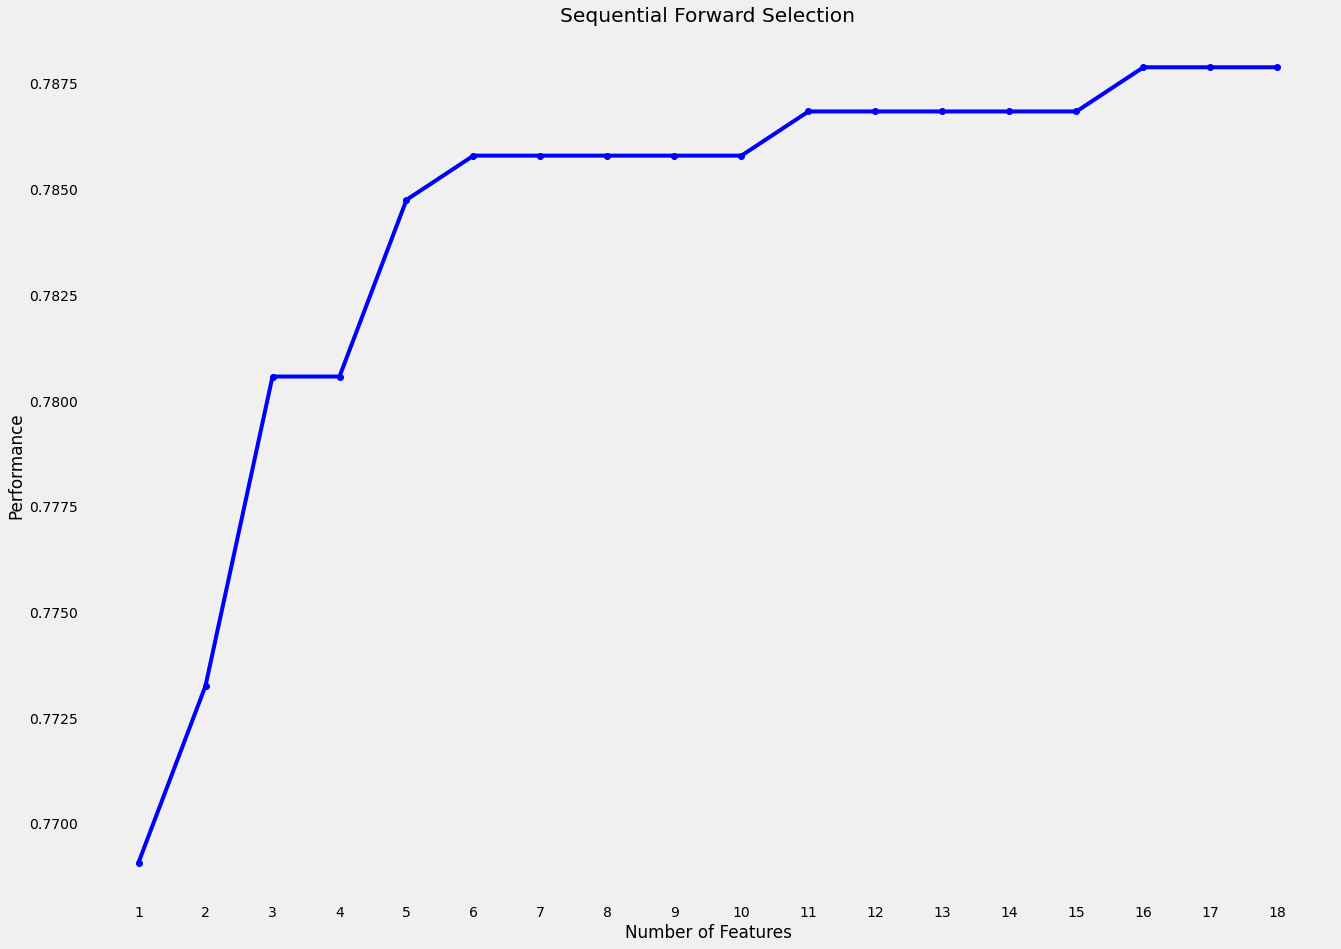

In [174]:

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err',figsize=(20, 15))

plt.title('Sequential Forward Selection')
plt.grid()

plt.show()


In [175]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [176]:
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
df[["feature_idx","feature_names","avg_score"]]


feature_idx                                      feature_names avg_score
1                                                (0,)                                            (city,)   0.76907
2                                             (0, 33)                             (city, experience_woe)   0.77325
3                                          (0, 5, 33)             (city, training_hours, experience_woe)  0.780564
4                                       (0, 3, 5, 33)  (city, experience, training_hours, experience_...  0.780564
5                                   (0, 3, 5, 15, 33)  (city, experience, training_hours, major_disci...  0.784744
6                               (0, 3, 5, 12, 15, 33)  (city, experience, training_hours, major_disci...  0.785789
7                            (0, 3, 5, 7, 12, 15, 33)  (city, experience, training_hours, gender_Not ...  0.785789
8                         (0, 3, 5, 7, 8, 12, 15, 33)  (city, experience, training_hours, gender_Not ...  0.785789
9                     (0, 3, 5, 7, 8, 12, 15, 23, 33)  (city, experience, training_hours, gender_Not ...  0.785789
10                (0, 3, 5, 7, 8, 12, 14, 15, 23, 33)  (city, experience, training_hours, gender_Not ...  0.785789
11            (0, 3, 5, 7, 8, 12, 14, 15, 23, 27, 33)  (city, experience, training_hours, gender_Not ...  0.786834
12        (0, 3, 5, 7, 8, 12, 13, 14, 15, 23, 27, 33)  (city, experience, training_hours, gender_Not ...  0.786834
13    (0, 3, 5, 7, 8, 12, 13, 14, 15, 16, 23, 27, 33)  (city, experience, training_hours, gender_Not ...  0.786834
14  (0, 3, 5, 7, 8, 12, 13, 14, 15, 16, 23, 27, 29...  (city, experience, training_hours, gender_Not ...  0.786834
15  (0, 3, 4, 5, 7, 8, 12, 13, 14, 15, 16, 23, 27,...  (city, experience, last_new_job, training_hour...  0.786834
16  (0, 3, 4, 5, 7, 8, 12, 13, 14, 15, 16, 23, 27,...  (city, experience, last_new_job, training_hour...  0.787879
17  (0, 3, 4, 5, 7, 8, 12, 13, 14, 15, 16, 23, 27,...  (city, experience, last_new_job, training_hour...  0.787879
18  (0, 3, 4, 5, 7, 8, 12, 13, 14, 15, 16, 23, 27,...  (city, experience, last_new_job, training_hour...  0.787879

In [177]:
# Lets access the indices of the best features directly via the k_feature_idx_ attribute:
sfs1.k_feature_names_, sfs1.k_feature_idx_

(('city',
  'experience',
  'last_new_job',
  'training_hours',
  'gender_Not Known',
  'gender_Other',
  'major_discipline_Business Degree',
  'major_discipline_Humanities',
  'major_discipline_No Major',
  'major_discipline_Not Known',
  'major_discipline_Other',
  'company_size_5000-9999',
  'company_type_NGO',
  'company_type_Other',
  'experience_woe',
  'last_new_job_woe',
  'new3',
  'new5'),
 (0, 3, 4, 5, 7, 8, 12, 13, 14, 15, 16, 23, 27, 29, 33, 36, 45, 47))

In [179]:
df.to_csv("Downloads/Forward.csv", index=False)

In [180]:
selected_feat= selection_sample2[model_feat].columns[list(sfs1.k_feature_idx_)]

print(selected_feat)
print("----------------------------------------------------")
print("Total Number of Selected Features: {}".format(len(selected_feat)))

Index(['city', 'experience', 'last_new_job', 'training_hours', 'gender_Not Known', 'gender_Other', 'major_discipline_Business Degree', 'major_discipline_Humanities', 'major_discipline_No Major', 'major_discipline_Not Known', 'major_discipline_Other', 'company_size_5000-9999', 'company_type_NGO', 'company_type_Other', 'experience_woe', 'last_new_job_woe', 'new3', 'new5'], dtype='object')
----------------------------------------------------
Total Number of Selected Features: 18


### Backward Selection

In [181]:
sfs2 = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=1000),
           k_features=21, 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=0)

sfs2 = sfs2.fit(selection_sample2[model_feat],selection_sample2['target'],custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.4s finished

[2022-07-20 19:44:13] Features: 48/21 -- score: 0.7878787878787878[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.3s finished

[2022-07-20 19:44:14] Features: 47/21 -- score: 0.7899686520376176[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.3s finished

[2022-07-20 19:44:15] Features: 46/21 -- score: 0.7931034482758621[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [182]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs2.subsets_

{49: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48),
  'cv_scores': array([0.78578892]),
  'avg_score': 0.7857889237199582,
  'feature_names': ('city',
   'city_development_index',
   'education_level',
   'experience',
   'last_new_job',
   'training_hours',
   'gender_Male',
   'gender_Not Known',
   'gender_Other',
   'relevent_experience_No relevent experience',
   'enrolled_university_Part time course',
   'enrolled_university_no_enrollment',
   'major_discipline_Business Degree',
   'major_discipline_Humanities',
   'major_discipline_No Major',
   'major_discipline_Not Known',
   'major_discipline_Other',
   'major_discipline_STEM',
   'company_size_100-500',
   'company_size_1000-4999

In [183]:
sfs2.get_metric_dict()

{49: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48),
  'cv_scores': array([0.78578892]),
  'avg_score': 0.7857889237199582,
  'feature_names': ('city',
   'city_development_index',
   'education_level',
   'experience',
   'last_new_job',
   'training_hours',
   'gender_Male',
   'gender_Not Known',
   'gender_Other',
   'relevent_experience_No relevent experience',
   'enrolled_university_Part time course',
   'enrolled_university_no_enrollment',
   'major_discipline_Business Degree',
   'major_discipline_Humanities',
   'major_discipline_No Major',
   'major_discipline_Not Known',
   'major_discipline_Other',
   'major_discipline_STEM',
   'company_size_100-500',
   'company_size_1000-4999

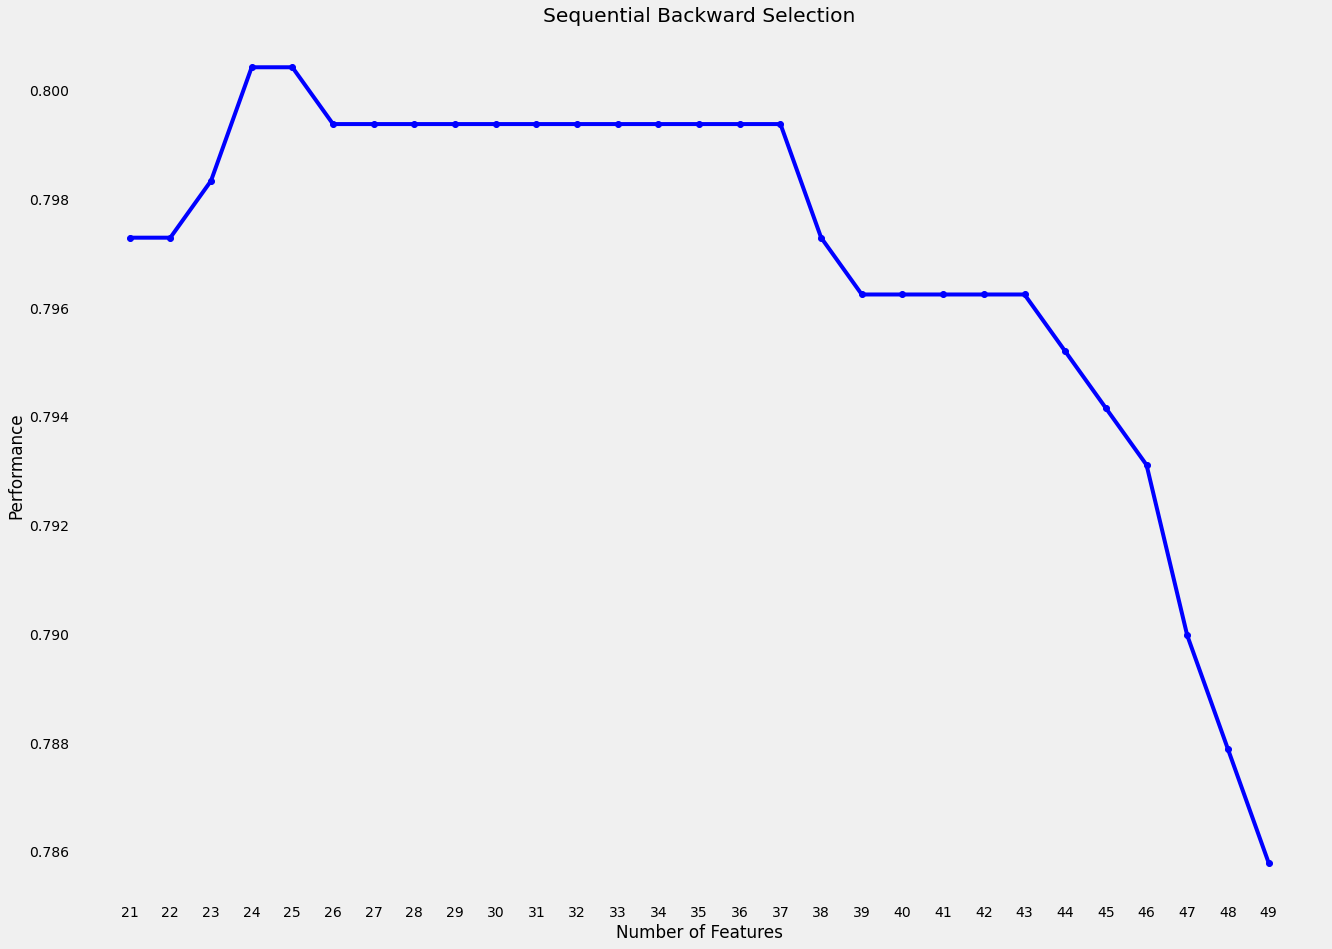

In [184]:

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs2.get_metric_dict(confidence_interval=0.95), kind='std_err',figsize=(20, 15))

plt.title('Sequential Backward Selection')
plt.grid()

plt.show()


In [185]:
df = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
df[["feature_idx","feature_names","avg_score"]]


feature_idx                                      feature_names avg_score
49  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  (city, city_development_index, education_level...  0.785789
48  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  (city, city_development_index, education_level...  0.787879
47  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  (city, city_development_index, education_level...  0.789969
46  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  (city, city_development_index, education_level...  0.793103
45  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  (city, city_development_index, education_level...  0.794148
44  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  (city, city_development_index, education_level...  0.795193
43  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  (city, city_development_index, education_level...  0.796238
42  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  (city, city_development_index, education_level...  0.796238
41  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  (city, city_development_index, education_level...  0.796238
40  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  (city, city_development_index, education_level...  0.796238
39  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  (city, city_development_index, education_level...  0.796238
38  (0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...  (city, city_development_index, education_level...  0.797283
37  (0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...  (city, city_development_index, education_level...  0.799373
36  (0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...  (city, city_development_index, education_level...  0.799373
35  (0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...  (city, city_development_index, education_level...  0.799373
34  (0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...  (city, city_development_index, education_level...  0.799373
33  (0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...  (city, city_development_index, education_level...  0.799373
32  (0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...  (city, city_development_index, education_level...  0.799373
31  (0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...  (city, city_development_index, education_level...  0.799373
30  (0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...  (city, city_development_index, education_level...  0.799373
29  (0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 1...  (city, city_development_index, education_level...  0.799373
28  (0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16, 1...  (city, city_development_index, education_level...  0.799373
27  (0, 1, 2, 4, 5, 6, 7, 8, 10, 13, 15, 16, 17, 1...  (city, city_development_index, education_level...  0.799373
26  (0, 1, 2, 4, 5, 6, 7, 8, 10, 13, 15, 16, 17, 1...  (city, city_development_index, education_level...  0.799373
25  (0, 1, 4, 5, 6, 7, 8, 10, 13, 15, 16, 17, 18, ...  (city, city_development_index, last_new_job, t...  0.800418
24  (0, 1, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 19,...  (city, city_development_index, last_new_job, t...  0.800418
23  (0, 1, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 19,...  (city, city_development_index, last_new_job, t...  0.798328
22  (0, 1, 4, 5, 6, 7, 10, 13, 16, 17, 18, 19, 21,...  (city, city_development_index, last_new_job, t...  0.797283
21  (0, 1, 4, 5, 6, 7, 10, 13, 16, 17, 18, 19, 22,...  (city, city_development_index, last_new_job, t...  0.797283

In [190]:
df.to_csv("Downloads/Backward.csv", index=False)

In [191]:
selected_feat_b= selection_sample2[model_feat].columns[list(sfs2.k_feature_idx_)]
print(selected_feat_b)
print("----------------------------------------------------")
print("Total Number of Selected Features: {}".format(len(selected_feat_b)))

Index(['city', 'city_development_index', 'last_new_job', 'training_hours', 'gender_Male', 'gender_Not Known', 'enrolled_university_Part time course', 'major_discipline_Humanities', 'major_discipline_Other', 'major_discipline_STEM', 'company_size_100-500', 'company_size_1000-4999', 'company_size_500-999', 'company_size_<10', 'company_type_NGO', 'company_type_Not Known', 'company_size_woe', 'experience_woe', 'new', 'new2', 'new4'], dtype='object')
----------------------------------------------------
Total Number of Selected Features: 21


## Embedded Method

**Wrapper methods provide better results in terms of performance, but they’ll also cost us a lot of computation time/resources.so if we could include the feature selection process in ML model training itself? That could lead us to even better features for that model, in a shorter amount of time. This is where embedded methods come into play.**

**Embedded methods,they perform feature selection during the model training, which is why we call them embedded methods.**

### Embedded Methods: Advantages

**The embedded method solves both issues we encountered with the filter and wrapper methods by combining their advantages. Here’s how:**

**They take into consideration the interaction of features like wrapper methods do.**
<BR>**They are faster like filter methods.**
<BR>**They are more accurate than filter methods.**
<BR>**They find the feature subset for the algorithm being trained.**
<BR>**They are much less prone to overfitting.**

### Feature Selection using Regularization
**As model complexity increases, the bias of the model decreases and variance increases (and vice-versa). By using various regularization techniques, we can try to achieve low training and testing error so that we’re able to trade-off bias and variance perfectly.**

**Regularization in machine learning adds a penalty to the different parameters of a model to reduce its freedom(avoid overfitting). This penalty is applied to the coefficient that multiplies each of the features in the linear model, and is done to avoid overfitting, make the model robust to noise, and to improve its generalization.**

**There are three main types of regularization for linear models:**

<BR> **lasso regression or L1 regularization**
<BR> **ridge regression or L2 regularization**
<BR> **elastic nets or L1/L2 regularization**

### Lasso Regression L1 Regularisation
**Lasso is exactly same as Ridge, in the sense that it also adds penalty. But instead of the squared slope/coefficient/weight, it adds the absolute value of the slope/weight as the penalty to Sum squared Error loss function.**



**If we take various values of penalty parameter Lambda or Alpha and try to get output with both Lasso and Ridge regression regularizations in the linear regression line eguation where we have multiple variables then you will notice that ,Lasso quickly made the coefficient of X to Zero whereas Ridge could reduce it to near zero with large values of Lambda. But Ridge was unable to make it zero even with Lambda as 100 or even 1000. So in this way we can say that Lasso can reduce the no of unrequired features very quickly.**

**A tuning parameter, λ controls the strength of the L1. λ is basically the amount of shrinkage:**

**When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.
As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).
As λ increases, bias increases.
As λ decreases, variance increases.**

**If an intercept is included in the model, it is usually left unchanged.**

### L2 regularization
**It doesn’t set the coefficient to zero, but only approaching zero—that’s why we use only L1 in feature selection.**

### L1/L2 regularization or Elastic Nets
**It is a combination of the L1 and L2. It incorporates their penalties, and therefore we can end up with features with zero as a coefficient—similar to L1.**

In [194]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR,Lasso
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

In [195]:
X = data_final[model_feat]
y = data_final["target"]

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size =0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15326, 49)
(3832, 49)
(15326,)
(3832,)


In [197]:
# Lets apply the Lasso Model -- in Linear Dataset
lasso = Lasso(alpha=0.001,random_state=23)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [198]:
coeff = lasso.coef_
coeff

array([ 0.16389454,  0.00546709,  0.0036123 , -0.00279447,  0.00525058,
       -0.00774599, -0.00574149,  0.        ,  0.        ,  0.02600856,
       -0.        , -0.03672233,  0.        ,  0.        , -0.        ,
       -0.1038462 , -0.        ,  0.00654825, -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.0068599 , -0.02367435,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.14425258,  0.03977096, -0.        ,
        0.        , -0.        ,  0.        ,  0.05206618,  0.        ,
        0.012772  , -0.        ,  0.00364551,  0.00240534, -0.07748927,
        0.        ,  0.        ,  0.        ,  0.        ])

In [199]:
features = X.columns
features

Index(['city', 'city_development_index', 'education_level', 'experience', 'last_new_job', 'training_hours', 'gender_Male', 'gender_Not Known', 'gender_Other', 'relevent_experience_No relevent experience', 'enrolled_university_Part time course', 'enrolled_university_no_enrollment', 'major_discipline_Business Degree', 'major_discipline_Humanities', 'major_discipline_No Major', 'major_discipline_Not Known', 'major_discipline_Other', 'major_discipline_STEM', 'company_size_100-500', 'company_size_1000-4999', 'company_size_10000+', 'company_size_50-99', 'company_size_500-999', 'company_size_5000-9999', 'company_size_<10', 'company_size_Not Known', 'company_type_Funded Startup', 'company_type_NGO', 'company_type_Not Known', 'company_type_Other', 'company_type_Public Sector', 'company_type_Pvt Ltd', 'company_size_woe', 'experience_woe', 'city_woe', 'training_hours_woe', 'last_new_job_woe', 'gender_woe', 'company_type_woe', 'relevent_experience_woe', 'education_level_woe',
       'city_developm

In [200]:
df_coeff = pd.DataFrame({"features":features,"coeff":coeff})
df_coeff.sort_values("coeff")

features     coeff
15                  major_discipline_Not Known -0.103846
44                                        new2 -0.077489
11           enrolled_university_no_enrollment -0.036722
26                 company_type_Funded Startup -0.023674
5                               training_hours -0.007746
6                                  gender_Male -0.005741
3                                   experience -0.002794
27                            company_type_NGO  0.000000
28                      company_type_Not Known  0.000000
29                          company_type_Other  0.000000
30                  company_type_Public Sector  0.000000
31                        company_type_Pvt Ltd -0.000000
34                                    city_woe -0.000000
24                            company_size_<10  0.000000
47                                        new5  0.000000
36                            last_new_job_woe -0.000000
37                                  gender_woe  0.000000
39                     relevent_experience_woe  0.000000
41                  city_development_index_woe -0.000000
45                                        new3  0.000000
46                                        new4  0.000000
35                          training_hours_woe  0.000000
23                      company_size_5000-9999  0.000000
48                                        new6  0.000000
21                          company_size_50-99 -0.000000
7                             gender_Not Known  0.000000
8                                 gender_Other  0.000000
22                        company_size_500-999 -0.000000
12            major_discipline_Business Degree  0.000000
13                 major_discipline_Humanities  0.000000
14                   major_discipline_No Major -0.000000
10        enrolled_university_Part time course -0.000000
18                        company_size_100-500 -0.000000
19                      company_size_1000-4999  0.000000
20                         company_size_10000+  0.000000
16                      major_discipline_Other -0.000000
43                                         new  0.002405
2                              education_level  0.003612
42                     enrolled_university_woe  0.003646
4                                 last_new_job  0.005251
1                       city_development_index  0.005467
17                       major_discipline_STEM  0.006548
25                      company_size_Not Known  0.006860
40                         education_level_woe  0.012772
9   relevent_experience_No relevent experience  0.026009
33                              experience_woe  0.039771
38                            company_type_woe  0.052066
32                            company_size_woe  0.144253
0                                         city  0.163895

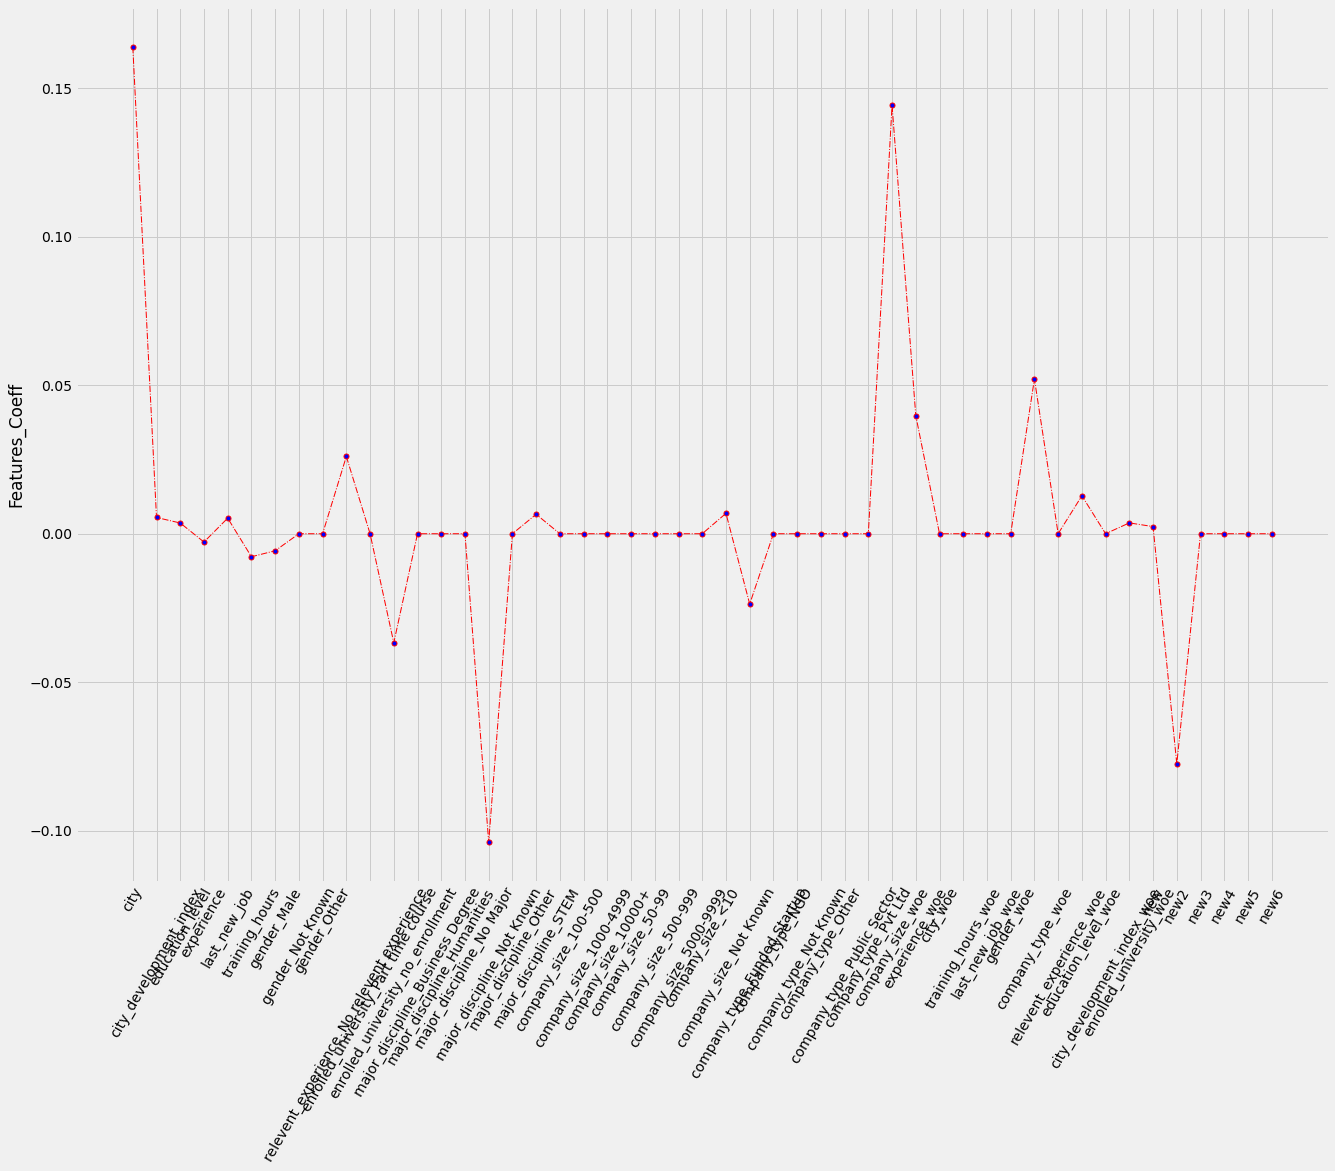

<Figure size 2160x3600 with 0 Axes>

In [201]:
# Lets plot the coeff with features
plt.figure(figsize=(20,15))
plt.plot(range(len(features)),coeff, color='red', linestyle='dashdot', linewidth = 1,marker='o', 
         markerfacecolor='blue', markersize=5)
plt.xticks(range(len(features)),features,rotation=60)
plt.ylabel("Features_Coeff")
plt.figure(figsize=(30,50))
plt.show()

<AxesSubplot:xlabel='features', ylabel='coeff'>

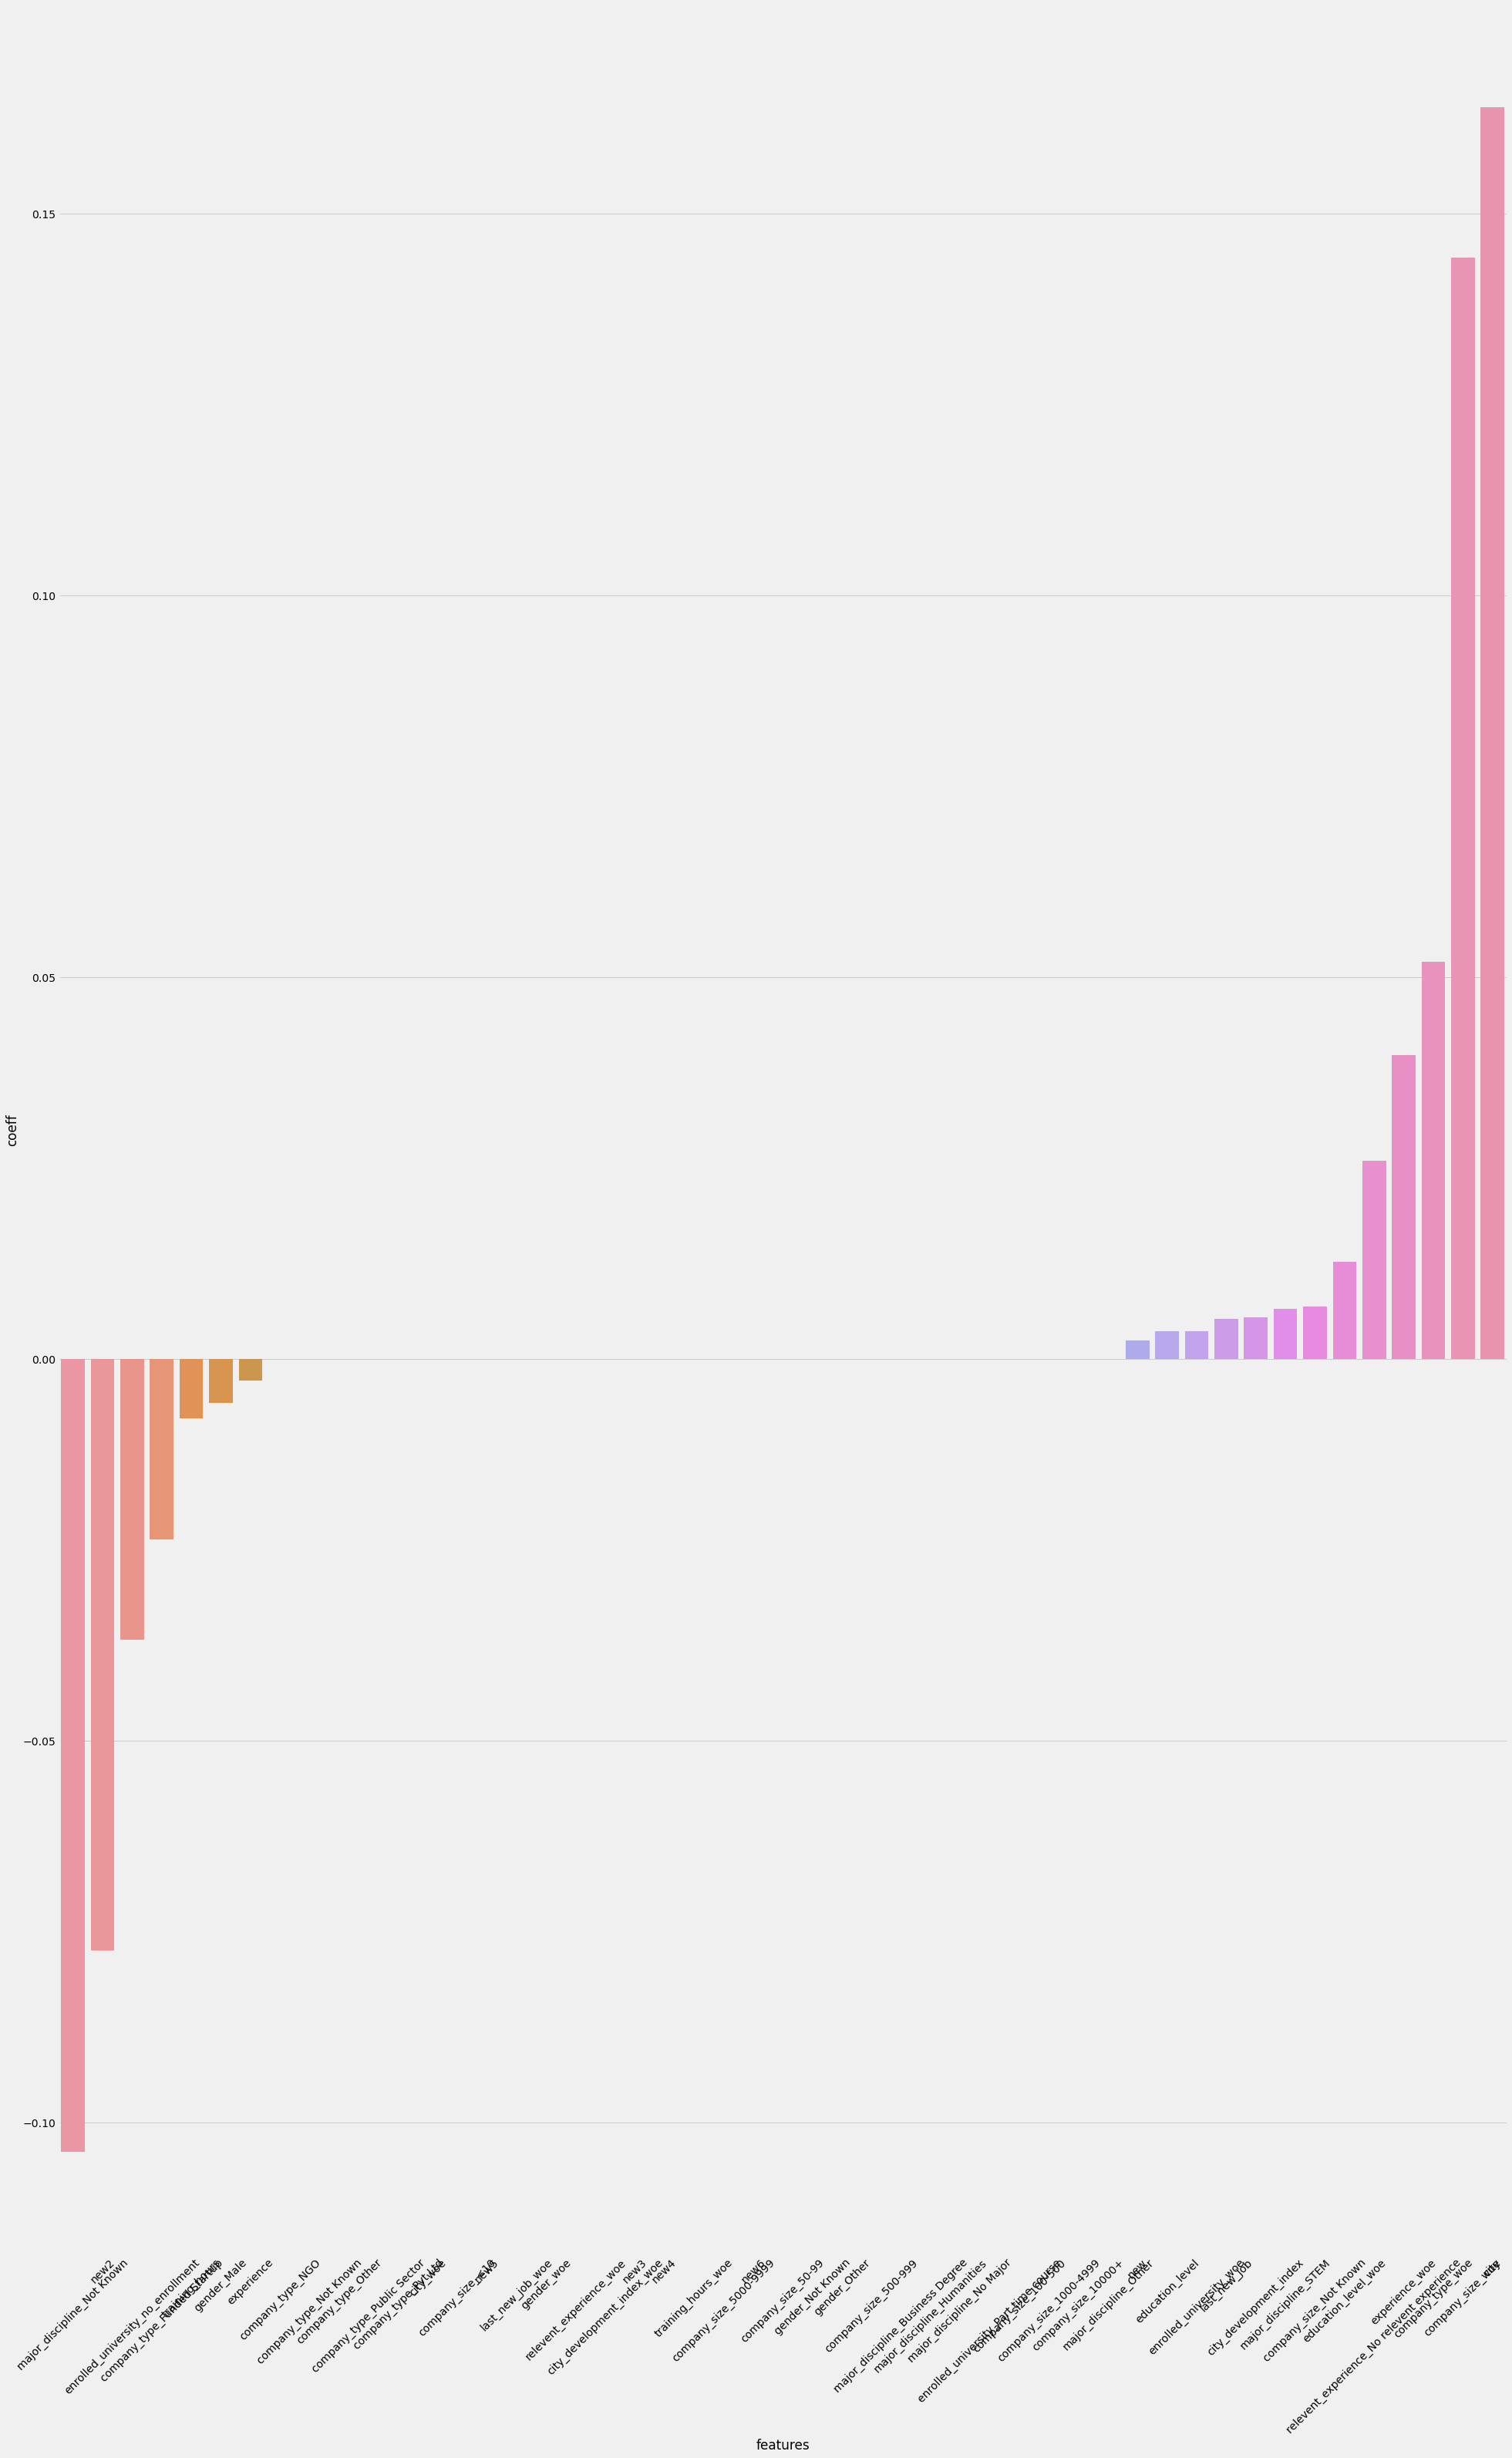

In [202]:
# Use Bar chart to show coeff
df_coeff.set_index('coeff')
# sort in ascending order to better visualization.
df_coeff = df_coeff.sort_values('coeff')
# plot the feature coeff in bars.
plt.figure(figsize=(30,50))
plt.xticks(rotation=45)
sns.barplot(x="features",y= "coeff", data=df_coeff)

In [203]:

df_coeff=df_coeff[(df_coeff['coeff'] > 0) | (df_coeff['coeff'] < 0)]
df_coeff

features     coeff
15                  major_discipline_Not Known -0.103846
44                                        new2 -0.077489
11           enrolled_university_no_enrollment -0.036722
26                 company_type_Funded Startup -0.023674
5                               training_hours -0.007746
6                                  gender_Male -0.005741
3                                   experience -0.002794
43                                         new  0.002405
2                              education_level  0.003612
42                     enrolled_university_woe  0.003646
4                                 last_new_job  0.005251
1                       city_development_index  0.005467
17                       major_discipline_STEM  0.006548
25                      company_size_Not Known  0.006860
40                         education_level_woe  0.012772
9   relevent_experience_No relevent experience  0.026009
33                              experience_woe  0.039771
38                            company_type_woe  0.052066
32                            company_size_woe  0.144253
0                                         city  0.163895

In [204]:
df_coeff.to_csv("Downloads/Feature_Importance_Lasso.csv", index=False)

In [205]:
lasso = df_coeff['features'].tolist()

In [206]:
print(lasso)
print("----------------------------------------------------")
print("Total Number of Selected Features: {}".format(len(lasso)))

['major_discipline_Not Known', 'new2', 'enrolled_university_no_enrollment', 'company_type_Funded Startup', 'training_hours', 'gender_Male', 'experience', 'new', 'education_level', 'enrolled_university_woe', 'last_new_job', 'city_development_index', 'major_discipline_STEM', 'company_size_Not Known', 'education_level_woe', 'relevent_experience_No relevent experience', 'experience_woe', 'company_type_woe', 'company_size_woe', 'city']
----------------------------------------------------
Total Number of Selected Features: 20


In [267]:
lasso=['major_discipline_Not Known', 'new2', 'enrolled_university_no_enrollment', 'company_type_Funded Startup', 'training_hours', 'gender_Male', 'experience', 'new', 'education_level', 'enrolled_university_woe', 'last_new_job', 'city_development_index', 'major_discipline_STEM', 'company_size_Not Known', 'education_level_woe', 'relevent_experience_No relevent experience', 'experience_woe', 'company_type_woe', 'company_size_woe', 'city']

## Checking for best features out of all these above methods of featutre selection

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## For Random Tree Features

In [208]:
X_train, X_test, y_train, y_test = train_test_split(data_final[Top_Feat], data_final['target'], 
                                                    test_size = 0.2, stratify = data_final['target'],random_state=20)

In [209]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred_logistic=logmodel.predict(X_test)

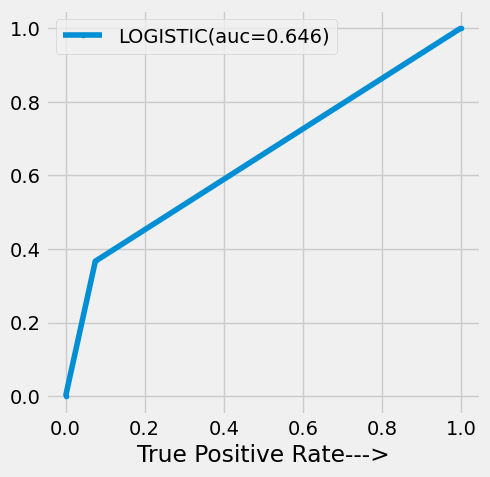

In [210]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()

## From CatBoost

In [211]:
X_train, X_test, y_train, y_test = train_test_split(data_final[Top_Features_catboost], data_final['target'], 
                                                    test_size = 0.2, stratify = data_final['target'],random_state=20)

In [212]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred_logistic=logmodel.predict(X_test)

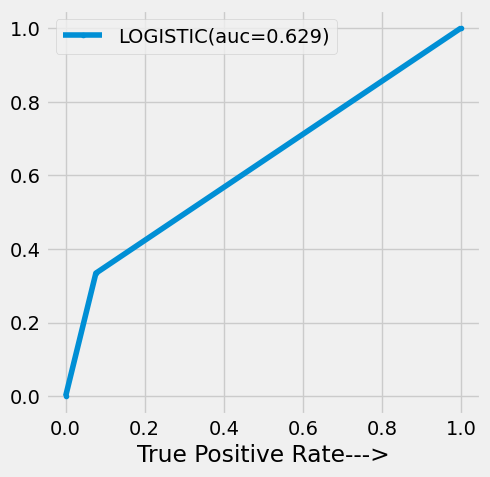

In [213]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()

## From Forward Selection

In [214]:
X_train, X_test, y_train, y_test = train_test_split(data_final[selected_feat], data_final['target'], 
                                                    test_size = 0.2, stratify = data_final['target'],random_state=20)

In [215]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred_logistic=logmodel.predict(X_test)

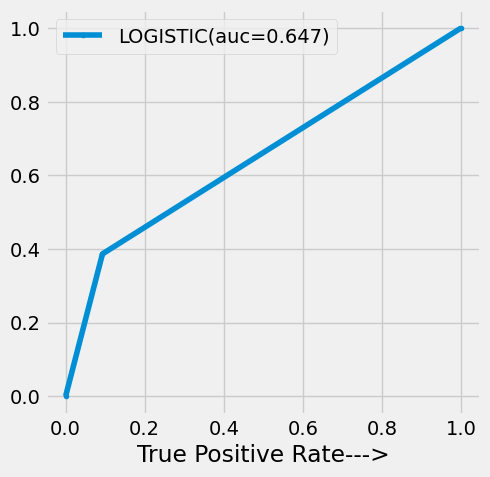

In [216]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()

## From Backward Selection`

In [217]:
X_train, X_test, y_train, y_test = train_test_split(data_final[selected_feat_b], data_final['target'], 
                                                    test_size = 0.2, stratify = data_final['target'],random_state=20)

In [218]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred_logistic=logmodel.predict(X_test)

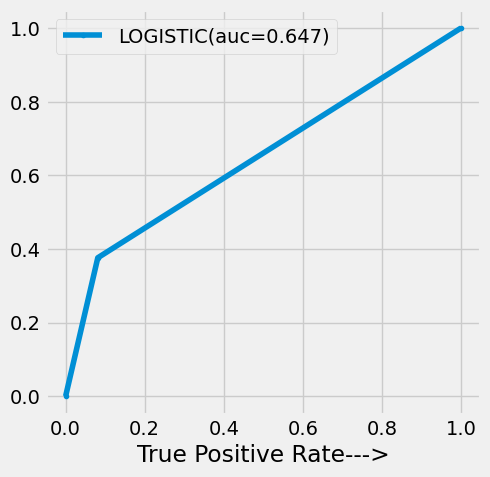

In [219]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()

## From Lasso

In [220]:
X_train, X_test, y_train, y_test = train_test_split(data_final[lasso], data_final['target'], 
                                                    test_size = 0.2, stratify = data_final['target'],random_state=20)

In [221]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred_logistic=logmodel.predict(X_test)

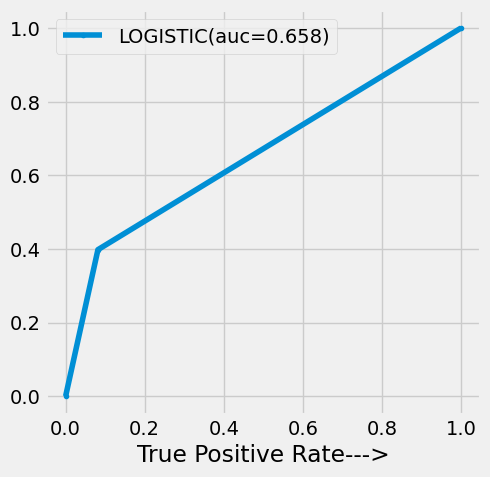

In [222]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()

#### Final Model Input Data using selected features

In [223]:
model_input = data_final[['enrollee_id', 'target'] + lasso]

In [224]:
model_input.shape

(19158, 22)

In [225]:
model_input.head()

enrollee_id  target  major_discipline_Not Known  new2  enrolled_university_no_enrollment  company_type_Funded Startup  training_hours  gender_Male  experience  new  education_level  enrolled_university_woe  last_new_job  city_development_index  major_discipline_STEM  company_size_Not Known  education_level_woe  relevent_experience_No relevent experience  experience_woe  company_type_woe  company_size_woe      city
0         8949       1                           0     0                                  1                            0       -0.521332            1    1.598665    1        -0.195471                -0.196979     -0.588135                0.739112                      1                       1             0.146400                                           0       -0.538251          0.647520          0.720991 -0.211889
1        29725       0                           0     0                                  1                            0       -0.302258            1    0.715659    0        -0.195471                -0.196979      1.816493               -0.428772                      1                       0             0.146400                                           1       -0.538251         -0.431689         -0.468126 -0.597956
2        11561       0                           0     1                                  0                            0        0.414711            0   -0.756019    0        -0.195471                 0.616319     -1.189292               -1.661537                      1                       1             0.146400                                           1        0.196829          0.647520          0.720991  1.997974
3        33241       1                           0     1                                  1                            0       -0.202679            0   -1.491858    0        -0.195471                -0.196979     -1.189292               -0.323338                      0                       1             0.146400                                           1        0.856233         -0.431689          0.720991  0.815998
4          666       0                           0     0                                  1                            1       -1.078974            1    1.598665    0         1.269643                -0.196979      1.215336               -0.501764                      1                       0            -0.196507                                           0       -0.538251         -0.431689         -0.468126  0.232324

## <center> End of Step 3
**[Click here to go back to Content](#Notebook-Description:)**

***

# Step 4: Model Training and Hyperparameter Tuning

#### In this step we will prepare the final model using top features selected from previous step

- Train different ML Algorithms with default parameters and compare performance KPIs - AUC, Accuracy, Precision, Recall
- Bias-Variance Trade-off (Compare Train-Test KPIs)
- Select best model and perform hyper-parameter tuning
- Select optimal set of parameters and finalize model

### Output of this step is final model pkl file

### Some General Facts
- In case of class imbalance problem, in most of the algorithms, there is a parameter named "class_weight" - Set it to 'balanced'
- Alternatively you can use Over sampling, Under Sampling, SMOTE method to introduce synthetic data to make the data more balanced
- Always read the documentation of any new algorithm and try to understand each parameters - use them according to the problem at hand
- For classification problem AUC is more robust metric
- Use Cross Validation to remove/ detect bias

In [226]:
# Dividing the model input data into train test

X_train, X_test, y_train, y_test = train_test_split(model_input[lasso], model_input['target'], 
                                                    test_size = 0.3, stratify = model_input['target'],random_state=22)

In [227]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13410, 20)
(13410,)
(5748, 20)
(5748,)


## Logistic Regression

In [228]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

========================== Logistic Regression - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.776
Test Accuracy: 0.772
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.805
Fold - 2
CV Score = 0.789
Fold - 3
CV Score = 0.811
Fold - 4
CV Score = 0.803
Fold - 5
CV Score = 0.799
Average 5-Fold CV Score: 0.802
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[3340  975]
 [ 337 1096]]
Train Confusion Matrix: 
[[7889 2177]
 [ 830 2514]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      4315
           1       0.53      0.76      0.63      1433

    accuracy                           0.77      5748
   macro avg       0.72      0.77      0.73      5748
weighted avg       0.81      0.77      0.78      5748

Train Classification Report: 


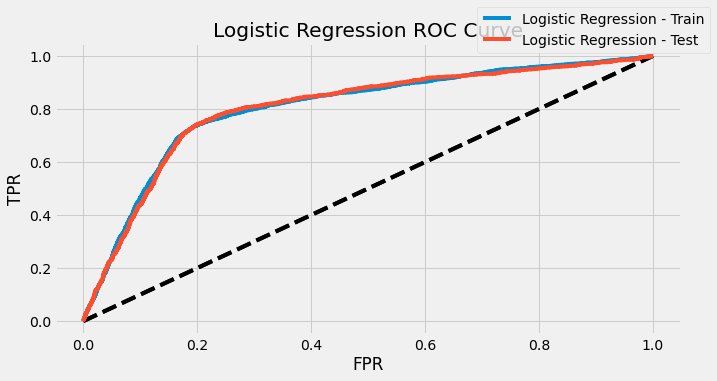

In [229]:
lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print("========================== Logistic Regression - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(lr.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(lr.score(X_test, y_test)))
print("=====================================================")
# Cross validation
from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_lr)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_lr[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_lr)))
print("=====================================================")

# Performance Metrices
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = lr.predict_proba(X_test)[:,1]
y_train_pred_prob = lr.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Logistic Regression ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Logistic Regression - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier

========================== Random Forest - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.762
Test Accuracy: 0.756
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.805
Fold - 2
CV Score = 0.780
Fold - 3
CV Score = 0.811
Fold - 4
CV Score = 0.801
Fold - 5
CV Score = 0.803
Average 5-Fold CV Score: 0.800
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[3241 1074]
 [ 327 1106]]
Train Confusion Matrix: 
[[7671 2395]
 [ 799 2545]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      4315
           1       0.51      0.77      0.61      1433

    accuracy                           0.76      5748
   macro avg       0.71      0.76      0.72      5748
weighted avg       0.81      0.76      0.77      5748

Train Classification Report: 
      

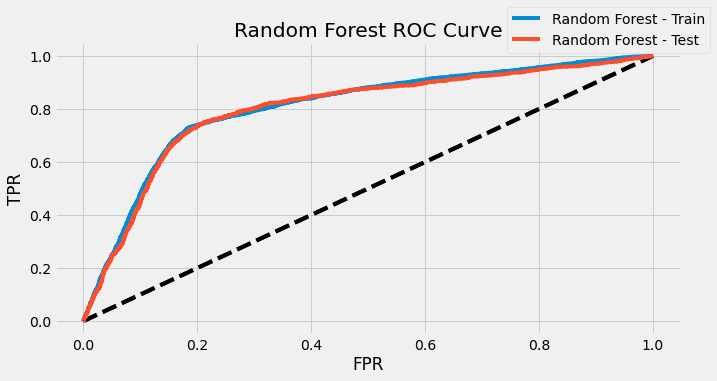

In [231]:
rf = RandomForestClassifier(class_weight='balanced',max_depth=4)

rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

print("========================== Random Forest - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(rf.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(rf.score(X_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_rf)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_rf[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_rf)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = rf.predict_proba(X_test)[:,1]
y_train_pred_prob = rf.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Random Forest ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Random Forest - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## Light GBM

In [232]:
from lightgbm import LGBMClassifier

========================== Light GBM - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.816
Test Accuracy: 0.780
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.804
Fold - 2
CV Score = 0.793
Fold - 3
CV Score = 0.816
Fold - 4
CV Score = 0.801
Fold - 5
CV Score = 0.801
Average 5-Fold CV Score: 0.803
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[3436  879]
 [ 386 1047]]
Train Confusion Matrix: 
[[8249 1817]
 [ 649 2695]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      4315
           1       0.54      0.73      0.62      1433

    accuracy                           0.78      5748
   macro avg       0.72      0.76      0.73      5748
weighted avg       0.81      0.78      0.79      5748

Train Classification Report: 
          

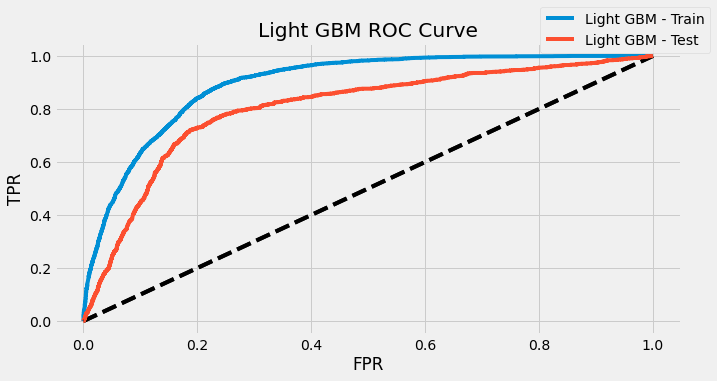

In [233]:
lgbm = LGBMClassifier(class_weight='balanced')

lgbm.fit(X_train, y_train)

y_test_pred = lgbm.predict(X_test)
y_train_pred = lgbm.predict(X_train)

print("========================== Light GBM - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(lgbm.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(lgbm.score(X_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_lgbm = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_lgbm)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_lgbm[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_lgbm)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = lgbm.predict_proba(X_test)[:,1]
y_train_pred_prob = lgbm.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Light GBM ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Light GBM - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Light GBM - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

### XGBOOST

In [234]:
from xgboost import XGBClassifier

[19:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
========================== XGBOOST - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.889
Test Accuracy: 0.784
===================== Cross Validation Scores ===========================
[19:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoo

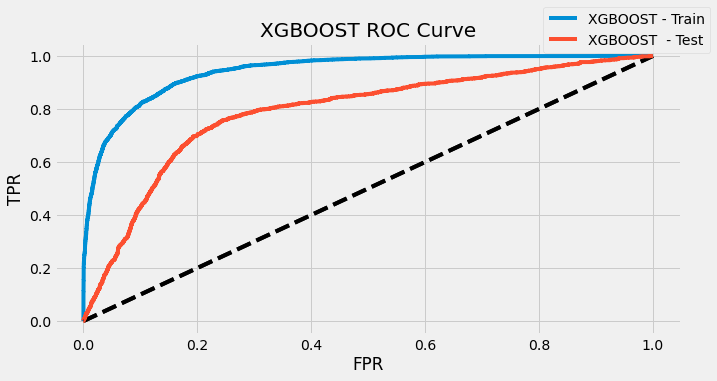

In [235]:
xg = XGBClassifier()

xg.fit(X_train, y_train)

y_test_pred = xg.predict(X_test)
y_train_pred = xg.predict(X_train)

print("========================== XGBOOST - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(xg.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(xg.score(X_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_xg = cross_val_score(xg, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_xg)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_xg[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_xg)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = xg.predict_proba(X_test)[:,1]
y_train_pred_prob = xg.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('XGBOOST ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='XGBOOST - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='XGBOOST  - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

 ### ADABOOST

In [236]:
from sklearn.ensemble import AdaBoostClassifier

========================== Ada Boost - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.781
Test Accuracy: 0.776
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.802
Fold - 2
CV Score = 0.785
Fold - 3
CV Score = 0.810
Fold - 4
CV Score = 0.799
Fold - 5
CV Score = 0.793
Average 5-Fold CV Score: 0.798
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[4007  308]
 [ 977  456]]
Train Confusion Matrix: 
[[9359  707]
 [2233 1111]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4315
           1       0.60      0.32      0.42      1433

    accuracy                           0.78      5748
   macro avg       0.70      0.62      0.64      5748
weighted avg       0.75      0.78      0.75      5748

Train Classification Report: 
          

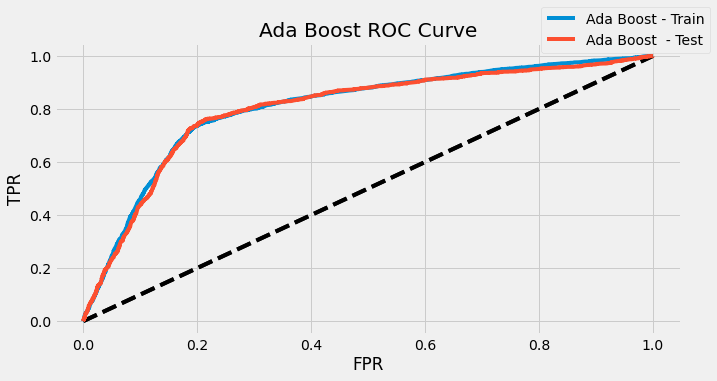

In [237]:
ab= AdaBoostClassifier()

ab.fit(X_train, y_train)

y_test_pred = ab.predict(X_test)
y_train_pred = ab.predict(X_train)

print("========================== Ada Boost - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(ab.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(ab.score(X_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_ab = cross_val_score(ab, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_ab)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_ab[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_ab)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = ab.predict_proba(X_test)[:,1]
y_train_pred_prob = ab.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Ada Boost ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Ada Boost - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Ada Boost  - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

### Bias-Variance Trade-off

#### For Random Forest

In [238]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1, 100, 25):
    vals.append(k)
    rf = RandomForestClassifier(n_estimators=k, class_weight='balanced',random_state=42)
    rf.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
    test_score.append(te_score)

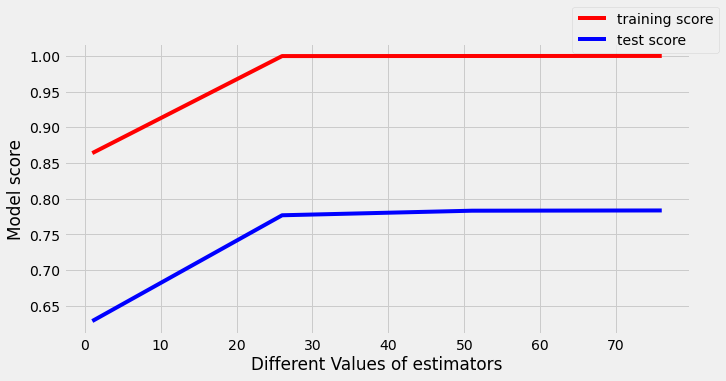

In [239]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of estimators')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [240]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1, 20, 5):
    vals.append(k)
    rf = RandomForestClassifier(max_depth=k, class_weight='balanced')
    rf.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
    test_score.append(te_score)

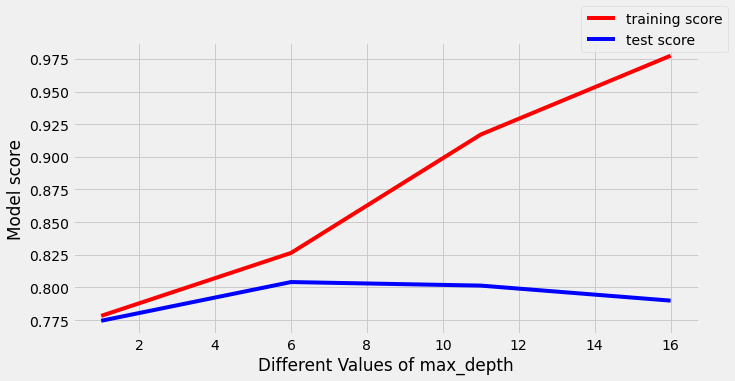

In [241]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [242]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(2, 10, 2):
    vals.append(k)
    rf = RandomForestClassifier(max_leaf_nodes=k, class_weight='balanced')
    rf.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
    test_score.append(te_score)

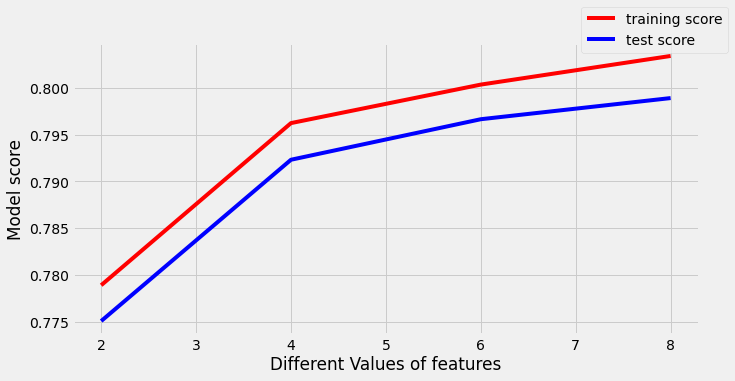

In [243]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of features')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

========================== Random Forest - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.749
Test Accuracy: 0.741
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.786
Fold - 2
CV Score = 0.727
Fold - 3
CV Score = 0.787
Fold - 4
CV Score = 0.756
Fold - 5
CV Score = 0.778
Average 5-Fold CV Score: 0.767
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[3346  969]
 [ 520  913]]
Train Confusion Matrix: 
[[7931 2135]
 [1231 2113]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4315
           1       0.49      0.64      0.55      1433

    accuracy                           0.74      5748
   macro avg       0.68      0.71      0.68      5748
weighted avg       0.77      0.74      0.75      5748

Train Classification Report: 
      

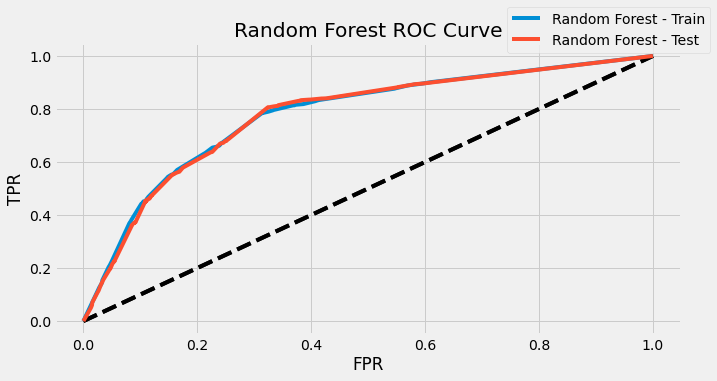

In [244]:
rf = RandomForestClassifier(class_weight='balanced',  n_estimators=25,max_depth=2 ,max_leaf_nodes=2)

rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

print("========================== Random Forest - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(rf.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(rf.score(X_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_rf)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_rf[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_rf)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = rf.predict_proba(X_test)[:,1]
y_train_pred_prob = rf.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Random Forest ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Random Forest - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

### LGBM

In [245]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1, 5, 1):
    vals.append(k)
    lgbm = LGBMClassifier(class_weight='balanced',max_depth=k,random_state=42)
    lgbm.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, lgbm.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])
    test_score.append(te_score)

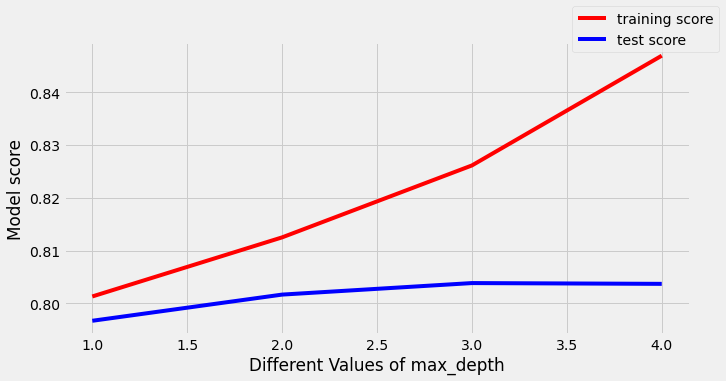

In [246]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [247]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1, 40, 5):
    vals.append(k)
    lgbm = LGBMClassifier(class_weight='balanced',n_estimators=k,random_state=42, max_depth=2)
    lgbm.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, lgbm.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])
    test_score.append(te_score)

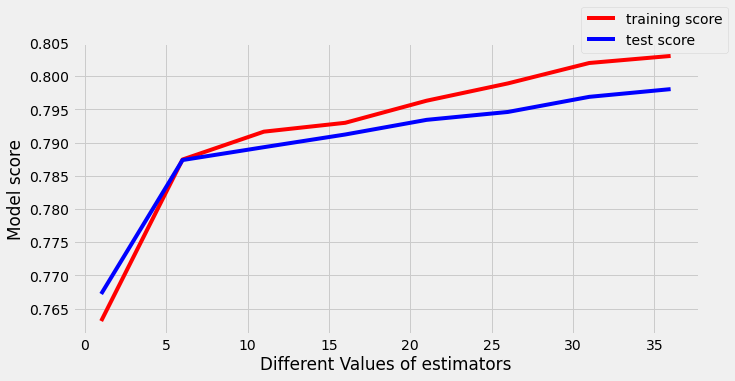

In [248]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of estimators')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

========================== Light GBM - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.730
Test Accuracy: 0.724
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.789
Fold - 2
CV Score = 0.771
Fold - 3
CV Score = 0.796
Fold - 4
CV Score = 0.793
Fold - 5
CV Score = 0.788
Average 5-Fold CV Score: 0.788
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[3033 1282]
 [ 306 1127]]
Train Confusion Matrix: 
[[7199 2867]
 [ 756 2588]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      4315
           1       0.47      0.79      0.59      1433

    accuracy                           0.72      5748
   macro avg       0.69      0.74      0.69      5748
weighted avg       0.80      0.72      0.74      5748

Train Classification Report: 
          

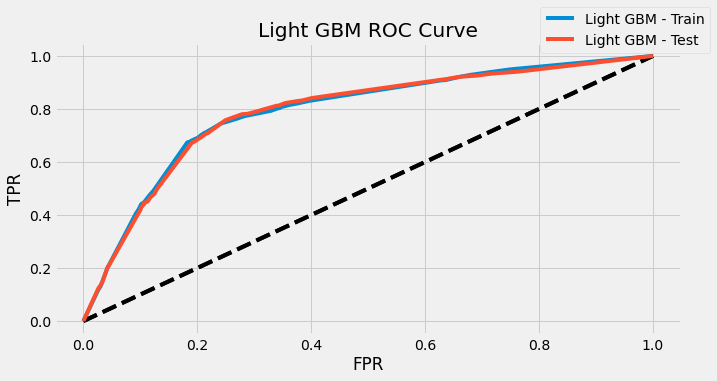

In [249]:
lgbm = LGBMClassifier(class_weight='balanced',max_depth=2,n_estimators=10)

lgbm.fit(X_train, y_train)

y_test_pred = lgbm.predict(X_test)
y_train_pred = lgbm.predict(X_train)

print("========================== Light GBM - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(lgbm.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(lgbm.score(X_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_lgbm = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_lgbm)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_lgbm[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_lgbm)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = lgbm.predict_proba(X_test)[:,1]
y_train_pred_prob = lgbm.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Light GBM ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Light GBM - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Light GBM - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

### XGBOOST

In [250]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1, 20, 5):
    vals.append(k)
    xg = XGBClassifier(n_estimators=k,max_depth=2,random_state=42)
    xg.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, xg.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xg.predict_proba(X_test)[:,1])
    test_score.append(te_score)

[19:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

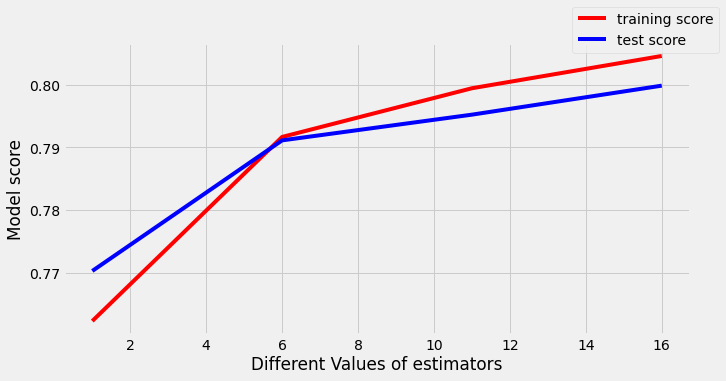

In [251]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of estimators')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [252]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1, 10, 2):
    vals.append(k)
    xg = XGBClassifier(max_depth=k,random_state=42)
    xg.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, xg.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xg.predict_proba(X_test)[:,1])
    test_score.append(te_score)

[19:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

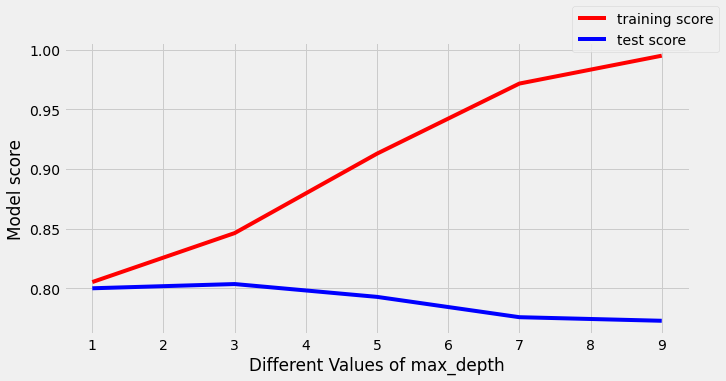

In [253]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

[19:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
========================== XGBOOST - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.786
Test Accuracy: 0.782
===================== Cross Validation Scores ===========================
[19:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoo

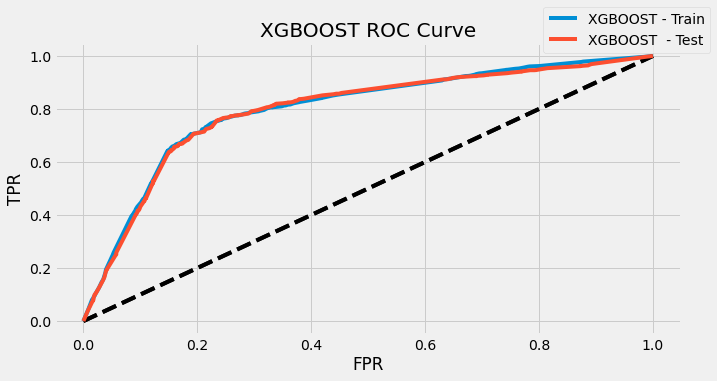

In [254]:
xg = XGBClassifier(max_depth=2,n_estimators=10)

xg.fit(X_train, y_train)

y_test_pred = xg.predict(X_test)
y_train_pred = xg.predict(X_train)

print("========================== XGBOOST - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(xg.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(xg.score(X_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_xg = cross_val_score(xg, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_xg)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_xg[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_xg)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = xg.predict_proba(X_test)[:,1]
y_train_pred_prob = xg.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('XGBOOST ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='XGBOOST - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='XGBOOST  - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## Hyperparameter Tuning
- Identify the model with more stable performance - in the abobe case it is Light GBM
- Understand the difference between parameter and hyperparameter
- Define a dictionary of hyperparameters
- Perform GridSearch/ RandomizedSearch Cross Validation and identify the best hyperparameter combination

In [255]:
from sklearn.model_selection import GridSearchCV

In [256]:
xg.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 10,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [257]:
params_xg = {'max_depth': [1,2,3],
               'learning_rate':[0.02,0.05],
               'min_child_weight':[0.5,0.9,1,1.2],
               'n_estimators':[5,10,15]
              }

In [258]:
grid_xg = GridSearchCV(estimator  = xg,
                         param_grid = params_xg,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [259]:
grid_xg.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[19:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=2,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()', n_estimators=10,
                                     n_jobs=8, num_parallel_tree=1,
                                     predictor='auto', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
            

In [260]:
print("Best Hyperparameters: \n", grid_xg.best_params_)
print("Best AUC Score: \n", grid_xg.best_score_)

Best Hyperparameters: 
 {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 0.5, 'n_estimators': 15}
Best AUC Score: 
 0.793374389134143


In [261]:
# Save the best combination of parameters as best model
best_model = grid_xg.best_estimator_

========================== XG BOOST Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.785
Test Accuracy: 0.781
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[3855  460]
 [ 799  634]]
Train Confusion Matrix: 
[[9057 1009]
 [1878 1466]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4315
           1       0.58      0.44      0.50      1433

    accuracy                           0.78      5748
   macro avg       0.70      0.67      0.68      5748
weighted avg       0.77      0.78      0.77      5748

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     10066
           1       0.59      0.44      0.50      3344

    accuracy                           0.78     13410
   macro avg       0.7

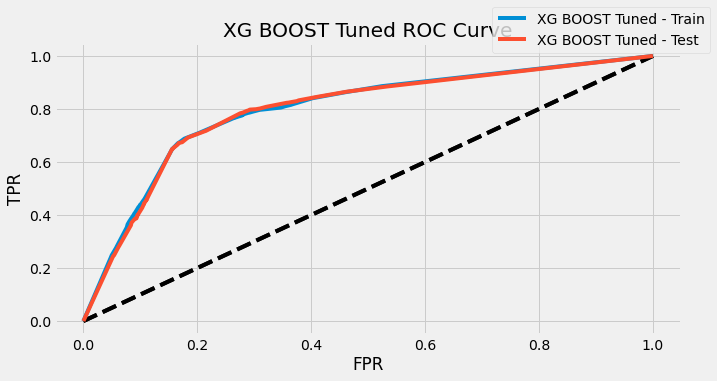

In [262]:
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)


print("========================== XG BOOST Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(best_model.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(best_model.score(X_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model.predict_proba(X_test)[:,1]
y_train_pred_prob = best_model.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('XG BOOST Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='XG BOOST Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='XG BOOST Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

### Saving the best model

In [263]:
import pickle

In [264]:
with open('xg_pkl_1', 'wb') as files:
    pickle.dump(best_model, files)

In [265]:
# load saved model
with open('xg_pkl_1' , 'rb') as f:
    xg = pickle.load(f)

## Recreating the same results with same data

========================== XG BOOST Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.785
Test Accuracy: 0.781
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[3855  460]
 [ 799  634]]
Train Confusion Matrix: 
[[9057 1009]
 [1878 1466]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4315
           1       0.58      0.44      0.50      1433

    accuracy                           0.78      5748
   macro avg       0.70      0.67      0.68      5748
weighted avg       0.77      0.78      0.77      5748

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     10066
           1       0.59      0.44      0.50      3344

    accuracy                           0.78     13410
   macro avg       0.7

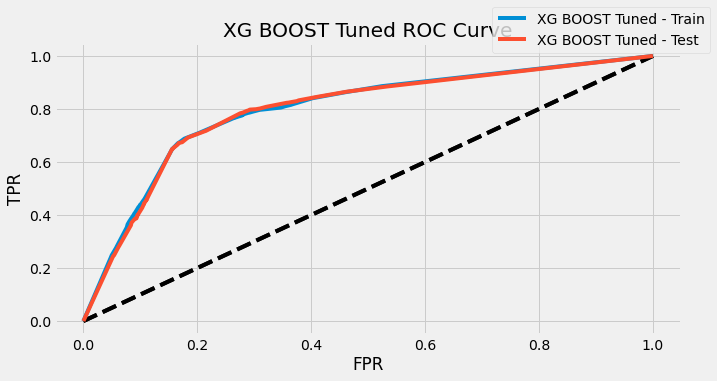

In [266]:
y_test_pred = xg.predict(X_test)
y_train_pred = xg.predict(X_train)


print("========================== XG BOOST Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(xg.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(xg.score(X_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = xg.predict_proba(X_test)[:,1]
y_train_pred_prob = xg.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('XG BOOST Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='XG BOOST Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='XG BOOST Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## <center> End of Step 4
**[Click here to go back to Content](#Notebook-Description:)**

***

# Step 5: Model Scoring & Business KPIs
### We will score the model with Validation Data
- Get the Validation data and create only those features that were used in the model (Top_Feat)
- Perform all the pre-processing steps like imputation, scaling etc using numbers from development sample
- Score the model and report the Performance KPIs

### Individual steps for easy step by step understanding

In [464]:
# Keeping only raw features
val_score = val[['enrollee_id', 'target','major_discipline','last_new_job','enrolled_university','company_type','training_hours',
                'gender','city_development_index','experience','company_size','education_level','relevent_experience','city']]

In [465]:
val_score

enrollee_id  target major_discipline last_new_job enrolled_university   company_type  training_hours  gender  city_development_index experience company_size education_level      relevent_experience      city
0           32403       1             STEM            1    Full time course            NaN              21    Male                   0.827          9          <10        Graduate  Has relevent experience   city_41
1            9858       0             STEM            1       no_enrollment        Pvt Ltd              98  Female                   0.920          5          NaN        Graduate  Has relevent experience  city_103
2           31806       1              NaN        never       no_enrollment        Pvt Ltd              15    Male                   0.624         <1          NaN     High School   No relevent experience   city_21
3           27385       0             STEM            1       no_enrollment        Pvt Ltd              39    Male                   0.827         11        10/49         Masters  Has relevent experience   city_13
4           27724       1             STEM           >4       no_enrollment        Pvt Ltd              72    Male                   0.920        >20       10000+        Graduate  Has relevent experience  city_103
...           ...     ...              ...          ...                 ...            ...             ...     ...                     ...        ...          ...             ...                      ...       ...
2124         1289       0       Humanities            4       no_enrollment  Public Sector              15    Male                   0.920         16          NaN        Graduate   No relevent experience  city_103
2125          195       1             STEM            2       no_enrollment            NaN              30    Male                   0.897         18          NaN         Masters  Has relevent experience  city_136
2126        31762       0              NaN        never       no_enrollment        Pvt Ltd              18    Male                   0.887          3          NaN  Primary School   No relevent experience  city_100
2127         7873       0              NaN            1    Full time course  Public Sector              84    Male                   0.804          7      100-500     High School  Has relevent experience  city_102
2128        12215       0             STEM            2       no_enrollment        Pvt Ltd              11    Male                   0.804         15       10000+         Masters  Has relevent experience  city_102

[2129 rows x 14 columns]

In [466]:
dev_stat = pd.read_csv("Downloads/Development_Statistics.csv")
num_feat = list(dev_stat['Variable'])
num_feat

['experience',
 'city',
 'training_hours',
 'last_new_job',
 'education_level',
 'city_development_index']

In [467]:
dev_w= pd.read_csv("Development_WOE_3.csv")

In [468]:
dev_w.shape

(17, 12)

In [469]:
val_score_woe = sc.woebin_ply(val_score, dev_w)

[INFO] converting into woe values ...


In [470]:
val_score_woe

city  training_hours major_discipline last_new_job  gender  enrollee_id      relevent_experience  target  city_development_index  company_size_woe  experience_woe  company_type_woe  education_level_woe  enrolled_university_woe
0      city_41              21             STEM            1    Male        32403  Has relevent experience       1                   0.827         -0.468126       -0.162341               NaN             0.146400                 0.616319
1     city_103              98             STEM            1  Female         9858  Has relevent experience       0                   0.920               NaN        0.196829         -0.431689             0.146400                -0.196979
2      city_21              15              NaN        never    Male        31806   No relevent experience       1                   0.624               NaN        0.856233         -0.431689            -0.414302                -0.196979
3      city_13              39             STEM            1    Male        27385  Has relevent experience       0                   0.827         -0.084578       -0.162341         -0.431689            -0.196507                -0.196979
4     city_103              72             STEM           >4    Male        27724  Has relevent experience       1                   0.920         -0.468126       -0.538251         -0.431689             0.146400                -0.196979
...        ...             ...              ...          ...     ...          ...                      ...     ...                     ...               ...             ...               ...                  ...                      ...
2124  city_103              15       Humanities            4    Male         1289   No relevent experience       0                   0.920               NaN       -0.538251         -0.123685             0.146400                -0.196979
2125  city_136              30             STEM            2    Male          195  Has relevent experience       1                   0.897               NaN       -0.538251               NaN            -0.196507                -0.196979
2126  city_100              18              NaN        never    Male        31762   No relevent experience       0                   0.887               NaN        0.425509         -0.431689            -0.414302                -0.196979
2127  city_102              84              NaN            1    Male         7873  Has relevent experience       0                   0.804         -0.468126        0.196829         -0.123685            -0.414302                 0.616319
2128  city_102              11             STEM            2    Male        12215  Has relevent experience       0                   0.804         -0.468126       -0.538251         -0.431689            -0.196507                -0.196979

[2129 rows x 14 columns]

In [471]:
woe_feat_val = [i for i in val_score_woe.columns if i.endswith('_woe') or i in (['enrollee_id'])]

In [472]:
val_score_woe[woe_feat_val]

enrollee_id  company_size_woe  experience_woe  company_type_woe  education_level_woe  enrolled_university_woe
0           32403         -0.468126       -0.162341               NaN             0.146400                 0.616319
1            9858               NaN        0.196829         -0.431689             0.146400                -0.196979
2           31806               NaN        0.856233         -0.431689            -0.414302                -0.196979
3           27385         -0.084578       -0.162341         -0.431689            -0.196507                -0.196979
4           27724         -0.468126       -0.538251         -0.431689             0.146400                -0.196979
...           ...               ...             ...               ...                  ...                      ...
2124         1289               NaN       -0.538251         -0.123685             0.146400                -0.196979
2125          195               NaN       -0.538251               NaN            -0.196507                -0.196979
2126        31762               NaN        0.425509         -0.431689            -0.414302                -0.196979
2127         7873         -0.468126        0.196829         -0.123685            -0.414302                 0.616319
2128        12215         -0.468126       -0.538251         -0.431689            -0.196507                -0.196979

[2129 rows x 6 columns]

In [473]:
data_dummy

enrollee_id      city  city_development_index  education_level  experience  last_new_job  training_hours  target  gender_Male  gender_Not Known  gender_Other  relevent_experience_No relevent experience  enrolled_university_Part time course  enrolled_university_no_enrollment  major_discipline_Business Degree  major_discipline_Humanities  major_discipline_No Major  major_discipline_Not Known  major_discipline_Other  major_discipline_STEM  company_size_100-500  company_size_1000-4999  company_size_10000+  company_size_50-99  company_size_500-999  company_size_5000-9999  company_size_<10  company_size_Not Known  company_type_Funded Startup  company_type_NGO  company_type_Not Known  company_type_Other  company_type_Public Sector  company_type_Pvt Ltd
0             8949 -0.211889                0.739112        -0.195471    1.598665     -0.588135       -0.521332       1            1                 0             0                                           0                                     0                                  1                                 0                            0                          0                           0                       0                      1                     0                       0                    0                   0                     0                       0                 0                       1                            0                 0                       1                   0                           0                     0
1            29725 -0.597956               -0.428772        -0.195471    0.715659      1.816493       -0.302258       0            1                 0             0                                           1                                     0                                  1                                 0                            0                          0                           0                       0                      1                     0                       0                    0                   1                     0                       0                 0                       0                            0                 0                       0                   0                           0                     1
2            11561  1.997974               -1.661537        -0.195471   -0.756019     -1.189292        0.414711       0            0                 1             0                                           1                                     0                                  0                                 0                            0                          0                           0                       0                      1                     0                       0                    0                   0                     0                       0                 0                       1                            0                 0                       1                   0                           0                     0
3            33241  0.815998               -0.323338        -0.195471   -1.491858     -1.189292       -0.202679       1            0                 1             0                                           1                                     0                                  1                                 1                            0                          0                           0                       0                      0                     0                       0                    0                   0                     0                       0                 0                       1                            0                 0                       0                   0                           0                     1
4              666  0.232324               -0.501764         1.269643    1.598665      1.215336       -1.078974       0            1                 0             0                            

In [474]:
val_score['education_level']=val_score['education_level'].replace('Primary School',0)
val_score['education_level']=val_score['education_level'].replace('High School',1)
val_score['education_level']=val_score['education_level'].replace('Graduate',2)
val_score['education_level']=val_score['education_level'].replace('Masters',3)
val_score['education_level']=val_score['education_level'].replace('Phd',4)

In [475]:
val_score['experience']=val_score['experience'].replace('<1',0)
val_score['experience']=val_score['experience'].replace('>20',21)

val_score["experience"] = pd.to_numeric(data["experience"],errors="coerce")

In [476]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

data_city=encoder.fit_transform(val_score['city'],val_score['target'])


val_score['city']=data_city

In [477]:
val_score['new']=np.where(val_score['city_development_index'] > 0.91, 1, 0)

In [478]:
val_score

enrollee_id  target major_discipline last_new_job enrolled_university   company_type  training_hours  gender  city_development_index  experience company_size  education_level      relevent_experience      city  new
0           32403       1             STEM            1    Full time course            NaN              21    Male                   0.827          21          <10              2.0  Has relevent experience  0.111165    0
1            9858       0             STEM            1       no_enrollment        Pvt Ltd              98  Female                   0.920          15          NaN              2.0  Has relevent experience  0.221987    1
2           31806       1              NaN        never       no_enrollment        Pvt Ltd              15    Male                   0.624           5          NaN              1.0   No relevent experience  0.641509    0
3           27385       0             STEM            1       no_enrollment        Pvt Ltd              39    Male                   0.827           0        10/49              3.0  Has relevent experience  0.399984    0
4           27724       1             STEM           >4       no_enrollment        Pvt Ltd              72    Male                   0.920          21       10000+              2.0  Has relevent experience  0.221987    1
...           ...     ...              ...          ...                 ...            ...             ...     ...                     ...         ...          ...              ...                      ...       ...  ...
2124         1289       0       Humanities            4       no_enrollment  Public Sector              15    Male                   0.920           3          NaN              2.0   No relevent experience  0.221987    1
2125          195       1             STEM            2       no_enrollment            NaN              30    Male                   0.897           8          NaN              3.0  Has relevent experience  0.166667    0
2126        31762       0              NaN        never       no_enrollment        Pvt Ltd              18    Male                   0.887           0          NaN              0.0   No relevent experience  0.190476    0
2127         7873       0              NaN            1    Full time course  Public Sector              84    Male                   0.804          11      100-500              1.0  Has relevent experience  0.166667    0
2128        12215       0             STEM            2       no_enrollment        Pvt Ltd              11    Male                   0.804          15       10000+              3.0  Has relevent experience  0.166667    0

[2129 rows x 15 columns]

In [479]:
val_score['relevent_experience_No relevent experience']=np.where(val_score['relevent_experience']=='No relevent experience', 1, 0)

In [480]:


val_score['last_new_job']=val_score['last_new_job'].replace('never',0)

val_score['last_new_job']=val_score['last_new_job'].replace('>4',5)

val_score["last_new_job"] = pd.to_numeric(val_score["last_new_job"],errors="coerce")

In [481]:
val_score['new2']=np.where(val_score['last_new_job'] >= 1, 0, 1)

In [482]:
val_score['major_discipline_Not Known']=np.where(val_score['major_discipline']=='Not Known', 1, 0)

In [483]:
val_score['gender_Male']=np.where(val_score['gender']=='Male', 1, 0)

In [484]:
val_score['company_size_Not Known']=np.where(val_score['company_size']=='Not Known', 1, 0)

In [485]:
val_score['major_discipline_STEM']=np.where(val_score['major_discipline']=='STEM', 1, 0)

In [486]:
val_score['company_type_Funded Startup']=np.where(val_score['company_type']=='Funded Startup', 1, 0)

In [487]:
val_score['enrolled_university_no_enrollment']=np.where(val_score['enrolled_university']=='no_enrollment', 1, 0)

In [500]:
score_data = pd.merge(val_score[['enrollee_id','target','major_discipline_Not Known','new2','enrolled_university_no_enrollment','company_type_Funded Startup','training_hours','gender_Male','experience','new','education_level','last_new_job','city_development_index','major_discipline_STEM','company_size_Not Known','relevent_experience_No relevent experience','city']], val_score_woe[woe_feat_val],  on='enrollee_id', how='left')

In [501]:
score_data.columns

Index(['enrollee_id', 'target', 'major_discipline_Not Known', 'new2', 'enrolled_university_no_enrollment', 'company_type_Funded Startup', 'training_hours', 'gender_Male', 'experience', 'new', 'education_level', 'last_new_job', 'city_development_index', 'major_discipline_STEM', 'company_size_Not Known', 'relevent_experience_No relevent experience', 'city', 'company_size_woe', 'experience_woe', 'company_type_woe', 'education_level_woe', 'enrolled_university_woe'], dtype='object')

In [502]:
score_feat=[ 'major_discipline_Not Known', 'new2', 'enrolled_university_no_enrollment', 'company_type_Funded Startup', 'training_hours', 'gender_Male', 'experience', 'new', 'education_level', 'last_new_job', 'city_development_index', 'major_discipline_STEM', 'company_size_Not Known', 'relevent_experience_No relevent experience', 'city', 'company_size_woe', 'experience_woe', 'company_type_woe', 'education_level_woe', 'enrolled_university_woe']

In [503]:
score_data.isnull().sum()

enrollee_id                                     0
target                                          0
major_discipline_Not Known                      0
new2                                            0
enrolled_university_no_enrollment               0
company_type_Funded Startup                     0
training_hours                                  0
gender_Male                                     0
experience                                      0
new                                             0
education_level                                52
last_new_job                                   40
city_development_index                          0
major_discipline_STEM                           0
company_size_Not Known                          0
relevent_experience_No relevent experience      0
city                                            0
company_size_woe                              622
experience_woe                                  5
company_type_woe                              634


In [504]:
#score_data=score_data.drop(['enrollee_id'],axis=1)

In [505]:
score_data=score_data.dropna(axis=0)

In [523]:
score_data.isnull().sum()

enrollee_id                                   0
target                                        0
major_discipline_Not Known                    0
new2                                          0
enrolled_university_no_enrollment             0
company_type_Funded Startup                   0
training_hours                                0
gender_Male                                   0
experience                                    0
new                                           0
education_level                               0
last_new_job                                  0
city_development_index                        0
major_discipline_STEM                         0
company_size_Not Known                        0
relevent_experience_No relevent experience    0
city                                          0
company_size_woe                              0
experience_woe                                0
company_type_woe                              0
education_level_woe                     

## loop

In [524]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

import scorecardpy as sc
import pickle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# # load saved model

In [529]:
def scoring(val_score, dev_w):
    
    val_score_woe = sc.woebin_ply(val_score, dev_w)
    woe_feat_val = [i for i in val_score_woe.columns if i.endswith('_woe') or i in (['enrollee_id'])]
    val_score['education_level']=val_score['education_level'].replace('Primary School',0)
    val_score['education_level']=val_score['education_level'].replace('High School',1)
    val_score['education_level']=val_score['education_level'].replace('Graduate',2)
    val_score['education_level']=val_score['education_level'].replace('Masters',3)
    val_score['education_level']=val_score['education_level'].replace('Phd',4)
    val_score['experience']=val_score['experience'].replace('<1',0)
    val_score['experience']=val_score['experience'].replace('>20',21)

    val_score["experience"] = pd.to_numeric(data["experience"],errors="coerce")
    from category_encoders import TargetEncoder
    encoder = TargetEncoder()

    data_city=encoder.fit_transform(val_score['city'],val_score['target'])


    val_score['city']=data_city   
    val_score['last_new_job']=val_score['last_new_job'].replace('never',0)

    val_score['last_new_job']=val_score['last_new_job'].replace('>4',5)

    val_score["last_new_job"] = pd.to_numeric(val_score["last_new_job"],errors="coerce")
    val_score['relevent_experience_No relevent experience']=np.where(val_score['relevent_experience']=='No relevent experience', 1, 0)

    val_score['new']=np.where(val_score['city_development_index'] > 0.91, 1, 0)

    val_score['last_new_job']=val_score['last_new_job'].replace('never',0)

    val_score['last_new_job']=val_score['last_new_job'].replace('>4',5)

    val_score["last_new_job"] = pd.to_numeric(val_score["last_new_job"],errors="coerce")

    val_score['new2']=np.where(val_score['last_new_job'] >= 1, 0, 1)

    val_score['major_discipline_Not Known']=np.where(val_score['major_discipline']=='Not Known', 1, 0)

    val_score['gender_Male']=np.where(val_score['gender']=='Male', 1, 0)

    val_score['company_size_Not Known']=np.where(val_score['company_size']=='Not Known', 1, 0)

    val_score['major_discipline_STEM']=np.where(val_score['major_discipline']=='STEM', 1, 0)

    val_score['company_type_Funded Startup']=np.where(val_score['company_type']=='Funded Startup', 1, 0)
  
    val_score['enrolled_university_no_enrollment']=np.where(val_score['enrolled_university']=='no_enrollment', 1, 0)
    
    
    score_feat=['enrollee_id', 'major_discipline_Not Known', 'new2', 'enrolled_university_no_enrollment', 'company_type_Funded Startup', 'training_hours', 'gender_Male', 'experience', 'new', 'education_level', 'last_new_job', 'city_development_index', 'major_discipline_STEM', 'company_size_Not Known', 'relevent_experience_No relevent experience', 'city', 'company_size_woe', 'experience_woe', 'company_type_woe', 'education_level_woe', 'enrolled_university_woe']
    score_data = pd.merge(val_score[['enrollee_id','major_discipline_Not Known','new2','enrolled_university_no_enrollment','company_type_Funded Startup','training_hours','gender_Male','experience','new','education_level','last_new_job','city_development_index','major_discipline_STEM','company_size_Not Known','relevent_experience_No relevent experience','city']], val_score_woe[woe_feat_val],  on='enrollee_id', how='left')
    score_data_l=score_data.dropna(axis=0)
    return(score_data_l)

In [530]:
score_data_1 = scoring(val_score, dev_w)

[INFO] converting into woe values ...


In [531]:
score_data_1

Empty DataFrame
Columns: [enrollee_id, major_discipline_Not Known, new2, enrolled_university_no_enrollment, company_type_Funded Startup, training_hours, gender_Male, experience, new, education_level, last_new_job, city_development_index, major_discipline_STEM, company_size_Not Known, relevent_experience_No relevent experience, city, company_size_woe, experience_woe, company_type_woe, education_level_woe, enrolled_university_woe]
Index: []

========================== Model Validation Report =========================
================================= Accuracy =================================
Validation Accuracy: 0.803
===================== Model Validation Pexgormance Metrices ================
Validation Confusion Matrix: 
[[1102    0]
 [ 271    0]]
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1102
           1       0.00      0.00      0.00       271

    accuracy                           0.80      1373
   macro avg       0.40      0.50      0.45      1373
weighted avg       0.64      0.80      0.71      1373

===================== Model Validation AUC Scores ==========================
Validation AUC Score: 0.546
===================== Model Validation AUC Curve ===========================


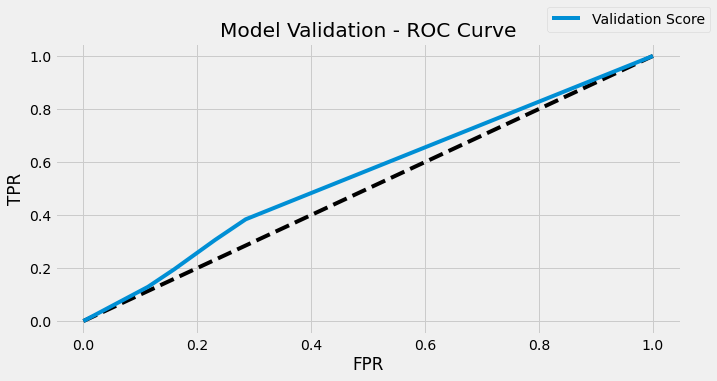

In [512]:
y_val_pred = xg.predict(score_data[score_feat])
y_val_pred_prob = xg.predict_proba(score_data[score_feat])[:,1]

val_accuracy = xg.score(score_data[score_feat], score_data['target'])
auc_score = roc_auc_score(score_data['target'], y_val_pred_prob)


print("========================== Model Validation Report =========================")

print("================================= Accuracy =================================")
print("Validation Accuracy: %0.3f"%val_accuracy)
print("============================================================================")

# Pexgormance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Validation Pexgormance Metrices ================")
print("Validation Confusion Matrix: ")
print(confusion_matrix(score_data['target'], y_val_pred))
print("============================================================================")

print("Validation Classification Report: ")
print(classification_report(score_data['target'], y_val_pred))
print("============================================================================")


print("===================== Model Validation AUC Scores ==========================")
print("Validation AUC Score: %0.3f"%auc_score)
print("============================================================================")

print("===================== Model Validation AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(score_data['target'], y_val_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Model Validation - ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Validation Score')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.show()



